## <font color='SeaGreen'>__Human Resources Analysis - Predict Attrition__</font><br>

Group composed by:
> __André Oliveira, nº20222156__ <p>
> __Diogo Fernandes, nº20220507__ <p>
> __Diogo Ribeiro Santos, nº20222152__ <p>
> __Gonçalo Matos, nº20221194__ <p>

### <font color='SeaGreen'>__Challenge__</font><br> 

> * __Predict the probability of an employee with certain characteristics stay or quit his/her current job in the company__ <p>
> * __Build a model to use by the company’s Human Resource team warning them about employees that potentially will quit__ <p>

### <font color='SeaGreen'>__What the company wants__</font><br>

> * __Correlate the distance from home with the attrition rate__ <p>
> * __Understand effects of variables on attrition__ <p>
> * __What makes an employee keep working on the company__

### <font color='SeaGreen'>__Goals__</font><br>

> * <font color='SeaGreen'>__Descriptive Analytics:__</font> Find correlations between the different variables, possibility of clustering analysis, build nice visualizations that may help to get better insights for the analysis, check feature’s cardinality and analyze possible highly correlation features that may be removed and still achieve good results <p>
> * <font color='SeaGreen'>__Predictive Analytics:__</font> Build a classification model to predict Attrition

# <font color='SeaGreen'>__Table of Contents__</font>

[1. Imports](#1st-bullet)<br>
- [1.1. Data import and indexing](#2nd-bullet)<br>

[2. Exploratory Data Analysis](#3rd-bullet)<br>
- [2.1. Data Exploration](#4th-bullet)<br>
    - [2.1.1. Quantitative & Categorical Variables Division](#5th-bullet)<br>
- [2.2. Statistical Description](#6th-bullet)<br>
    - [2.2.1. Take Aways](#7th-bullet)<br>
    - [2.2.2. Coefficient of Variation](#8th-bullet)<br>
        - [2.2.2.1. Take Aways](#9th-bullet)<br>
- [2.3. Data types and Target Variable](#10th-bullet)<br>
- [2.4. Notes from preliminary exploration](#11th-bullet)<br>
- [2.5. Visualization of the variables individually grouped by Attrition](#12th-bullet)<br>
- [2.6. Variable's distribution](#13th-bullet)<br>
    - [2.6.1. Outliers](#14th-bullet)<br>
        - [2.6.1.1. IQR method](#15th-bullet)<br>
        - [2.6.1.2. Z-Scores](#16th-bullet)<br>
        - [2.6.1.3. Isolation Forest](#17th-bullet)<br>
    - [2.6.2. Yeo-Johson Transformation](#18th-bullet)<br>
    - [2.6.3. Outliers after Yeo-Johnson transformation](#19th-bullet)<br>
        - [2.6.3.1. IQR after Yeo-Johnson transformation](#20th-bullet)<br>
        - [2.6.3.2. Z-Score after Yeo-Johnson transformation](#21th-bullet)<br>
        - [2.6.3.3. Isolation Forest afer Yeo-Johnson transformation](#22th-bullet)<br>
- [2.7. Scaling, Dummy and Encoding Functions](#23th-bullet)<br>
- [2.8. Multivariate Analysis](#24th-bullet)<br>
    - [2.8.1. Assumptions](#25th-bullet)<br>
        - [2.8.1.1. Bartlett's Test and KMO](#26th-bullet)<br>
    - [2.8.2. Principal Components Analysis](#27th-bullet)<br>
        - [2.8.2.1. Multiple Correspondence Analysis](#28th-bullet)<br>
- [2.9. Correlations/Associations](#29th-bullet)<br>
    - [2.9.1. Quantitative](#30th-bullet)<br>
    - [2.9.2. Cramér's V for Categorical](#31th-bullet)<br>

[3. Feature Selection](#32th-bullet)<br>
- [3.1. Categorical Features](#33th-bullet)<br>
    - [3.1.1. Chi-Square](#34th-bullet)<br>
- [3.2. Numerical Features](#35th-bullet)<br>
    - [3.2.1. Variance](#36th-bullet)<br>
    - [3.2.2. Spearman Correlation](#37th-bullet)<br>
    - [3.2.3. Decision Tree](#38th-bullet)<br>
    - [3.2.4. Recursive Feature Elimination](#39th-bullet)<br>
    - [3.2.5. Lasso](#40th-bullet)<br>
- [3.3. Final Table](#41th-bullet)<br>

[4. Modeling](#42th-bullet)<br>
- [4.1. Data Preparation](#43th-bullet)<br>
- [4.2. Data Split](#44th-bullet)<br>
- [4.3. Model Selection](#45th-bullet)<br>
    - [4.3.1. Hyperparameter tunning](#46th-bullet)<br>
    - [4.3.2. Threshold Estimation](#47th-bullet)<br>
    - [4.3.3. Final Model](#48th-bullet)<br>
    - [4.3.4. Odds Ratio](#49th-bullet)<br>
    - [4.3.5. Marginal Effect](#50th-bullet)<br>
    - [4.3.6. Roc Curve](#51th-bullet)<br>

[5.0. Clustering](#52th-bullet)<br>
- [5.1. Kmeans](#53th-bullet)<br>
    - [5.1.1. Visualisations : Radar Charts](#54th-bullet)<br>
    
[6.0. Statistical Tests](#55th-bullet)<br>
- [6.1.0. Chi-Square Overtime](#56th-bullet)<br>
- [6.2.0. 6.2.0. T-test Overtime](#57th-bullet)<br>
- [6.3.0. Chi-Square binned DistanceFromHome](#58th-bullet)<br>
- [6.4.0. Anova & Tukey NUmCompaniesWorked](#59th-bullet)<br>


<a class="anchor" id="1st-bullet">

# 1. Imports

</a>

In [348]:
import numpy as np
from numpy import median
from scipy import stats
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import random as rn
from functools import reduce 
import hvplot.pandas
from sklearn import preprocessing
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from matplotlib.patches import Circle
from adjustText import adjust_text
import prince
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
import matplotlib.ticker as mtick
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE 
from sklearn.linear_model import LassoCV 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    precision_recall_curve
)
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<a class="anchor" id="2nd-bullet">

## 1.1. Data import and indexing

</a>

In [349]:
df = pd.read_csv("./Dataset/HR_DS.csv")

In [350]:
# To display all columns of the dataset and to reduce rounding to 2 decimal places

pd.set_option("display.float_format", "{:.2f}".format)
pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)

In [351]:
# Using the column EmployeeNumber as index. We have to isolate the 'EmployeeNumber' variable to set it as index in the DFs we will create ahead.
employee_number_isolated = df["EmployeeNumber"]

df_1 = df.copy()

df.set_index("EmployeeNumber", inplace=True)
df_1.set_index("EmployeeNumber", inplace=True)

<a class="anchor" id="3rd-bullet">

# 2. Exploratory Data Analysis

</a>

<a class="anchor" id="4th-bullet">

## 2.1. Data Exploration

</a>

In [352]:
df.head()

Age Attrition     BusinessTravel  DailyRate  \
EmployeeNumber                                                
1                41       Yes      Travel_Rarely       1102   
2                49        No  Travel_Frequently        279   
4                37       Yes      Travel_Rarely       1373   
5                33        No  Travel_Frequently       1392   
7                27        No      Travel_Rarely        591   

                            Department  DistanceFromHome  Education  \
EmployeeNumber                                                        
1                                Sales                 1          2   
2               Research & Development                 8          1   
4               Research & Development                 2          2   
5               Research & Development                 3          4   
7               Research & Development                 2          1   

               EducationField  EmployeeCount  EnvironmentSatisfaction  Gender  \
EmployeeNumber                                                                  
1               Life Sciences              1                        2  Female   
2               Life Sciences              1                        3    Male   
4                       Other              1                        4    Male   
5               Life Sciences              1                        4  Female   
7                     Medical              1                        1    Male   

                HourlyRate  JobInvolvement  JobLevel                JobRole  \
EmployeeNumber                                                                
1                       94               3         2        Sales Executive   
2                       61               2         2     Research Scientist   
4                       92               2         1  Laboratory Technician   
5                       56               3         1     Research Scientist   
7                       40               3         1  Laboratory Technician   

                JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
EmployeeNumber                                                              
1                             4        Single           5993        19479   
2                             2       Married           5130        24907   
4                             3        Single           2090         2396   
5                             3       Married           2909        23159   
7                             2       Married           3468        16632   

                NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
EmployeeNumber                                                          
1                                8      Y      Yes                 11   
2                                1      Y       No                 23   
4                                6      Y      Yes                 15   
5                                1      Y      Yes                 11   
7                                9      Y       No                 12   

                PerformanceRating  RelationshipSatisfaction  StandardHours  \
EmployeeNumber                                                               
1                               3                         1             80   
2                               4                         4             80   
4                               3                         2             80   
5                               3                         3             80   
7                               3                         4             80   

                StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
EmployeeNumber                                                               
1                              0                  8                      0   
2                              1                 10                      3   
4                              0           

In [353]:
df.shape

(1470, 34)

So, our dataset has 1470 observations and 34 variables. The variables are information about the IBM employees. At first glance, we have a lot of categorical and ordinal variables.


In [354]:
# Let's check the datatypes
print(df.dtypes)
df.dtypes.value_counts()

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

int64     25
object     9
Name: count, dtype: int64

In [355]:
# Let's inspect the structure
df.sample(7).transpose()

EmployeeNumber                       1039                    241   \
Age                                    44                      56   
Attrition                              No                      No   
BusinessTravel              Travel_Rarely           Travel_Rarely   
DailyRate                            1448                     713   
Department                          Sales  Research & Development   
DistanceFromHome                       28                       8   
Education                               3                       3   
EducationField                    Medical           Life Sciences   
EmployeeCount                           1                       1   
EnvironmentSatisfaction                 4                       3   
Gender                             Female                  Female   
HourlyRate                             53                      67   
JobInvolvement                          4                       3   
JobLevel                                4                       1   
JobRole                   Sales Executive      Research Scientist   
JobSatisfaction                         4                       1   
MaritalStatus                     Married                Divorced   
MonthlyIncome                       13320                    4257   
MonthlyRate                         11737                   13939   
NumCompaniesWorked                      3                       4   
Over18                                  Y                       Y   
OverTime                              Yes                     Yes   
PercentSalaryHike                      18                      18   
PerformanceRating                       3                       3   
RelationshipSatisfaction                3                       3   
StandardHours                          80                      80   
StockOptionLevel                        1                       1   
TotalWorkingYears                      23                      19   
TrainingTimesLastYear                   2                       3   
WorkLifeBalance                         3                       3   
YearsAtCompany                         12                       2   
YearsInCurrentRole                     11                       2   
YearsSinceLastPromotion                11                       2   
YearsWithCurrManager                   11                       2   

EmployeeNumber                              569                     1635  \
Age                                           50                      45   
Attrition                                     No                      No   
BusinessTravel                     Travel_Rarely           Travel_Rarely   
DailyRate                                   1099                    1329   
Department                Research & Development  Research & Development   
DistanceFromHome                              29                       2   
Education                                      4                       2   
EducationField                     Life Sciences                   Other   
EmployeeCount                                  1                       1   
EnvironmentSatisfaction                        2                       4   
Gender                                      Male                  Female   
HourlyRate                                    88                      59   
JobInvolvement                                 2                       2   
JobLevel                                       4                       2   
JobRole                                  Manager  Manufacturing Director   
JobSatisfaction                                3                       4   
MaritalStatus                            Married                Divorced   
MonthlyIncome                              17046                    5770   
MonthlyRate                                 9314                    5388   
NumCompaniesWorked                             0                

In [356]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [357]:
# Overview information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                   147

### We can see that we don't have missing values.

### Now, let's divide the quantitative and categorical variables


In [358]:
# Quantitative

df_quantitative = df[
    [
        "Age",
        "DailyRate",
        "DistanceFromHome",
        "HourlyRate",
        "MonthlyIncome",
        "MonthlyRate",
        "NumCompaniesWorked",
        "PercentSalaryHike",
        "TotalWorkingYears",
        "TrainingTimesLastYear",
        "YearsAtCompany",
        "YearsInCurrentRole",
        "YearsSinceLastPromotion",
        "YearsWithCurrManager",
    ]
].copy()

# Changing the data types to category
cols_quantitative = [
    "Age",
    "DailyRate",
    "DistanceFromHome",
    "HourlyRate",
    "MonthlyIncome",
    "MonthlyRate",
    "NumCompaniesWorked",
    "PercentSalaryHike",
    "TotalWorkingYears",
    "TrainingTimesLastYear",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
]

for col in cols_quantitative:
    df_quantitative[col] = df_quantitative[col].astype("int64")

df_quantitative.set_index(employee_number_isolated, inplace=True)
df_quantitative.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      1470 non-null   int64
 1   DailyRate                1470 non-null   int64
 2   DistanceFromHome         1470 non-null   int64
 3   HourlyRate               1470 non-null   int64
 4   MonthlyIncome            1470 non-null   int64
 5   MonthlyRate              1470 non-null   int64
 6   NumCompaniesWorked       1470 non-null   int64
 7   PercentSalaryHike        1470 non-null   int64
 8   TotalWorkingYears        1470 non-null   int64
 9   TrainingTimesLastYear    1470 non-null   int64
 10  YearsAtCompany           1470 non-null   int64
 11  YearsInCurrentRole       1470 non-null   int64
 12  YearsSinceLastPromotion  1470 non-null   int64
 13  YearsWithCurrManager     1470 non-null   int64
dtypes: int64(14)
memory usage: 172.3 KB


In [359]:
# Categorical

df_categorical = df[
    [
        "Attrition",
        "BusinessTravel",
        "Department",
        "Education",
        "EducationField",
        "EnvironmentSatisfaction",
        "Gender",
        "JobInvolvement",
        "JobLevel",
        "JobRole",
        "JobSatisfaction",
        "MaritalStatus",
        "Over18",
        "OverTime",
        "PerformanceRating",
        "RelationshipSatisfaction",
        "StandardHours",
        "StockOptionLevel",
        "WorkLifeBalance",
    ]
].copy()


# for col in cols_categorical:
#     df_categorical[col] = df_categorical[col].astype("category")

df_categorical.set_index(employee_number_isolated, inplace=True)
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   BusinessTravel            1470 non-null   object
 2   Department                1470 non-null   object
 3   Education                 1470 non-null   int64 
 4   EducationField            1470 non-null   object
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   JobInvolvement            1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  Over18                    1470 non-null   object
 13  OverTime                  1470 non-null   object
 14  PerformanceRating         147

<a class="anchor" id="6th-bullet">

## 2.2. Statistical Description

</a>

In [360]:
# Summary statistics
df_quantitative.describe()

Age  DailyRate  DistanceFromHome  HourlyRate  MonthlyIncome  \
count 1470.00    1470.00           1470.00     1470.00        1470.00   
mean    36.92     802.49              9.19       65.89        6502.93   
std      9.14     403.51              8.11       20.33        4707.96   
min     18.00     102.00              1.00       30.00        1009.00   
25%     30.00     465.00              2.00       48.00        2911.00   
50%     36.00     802.00              7.00       66.00        4919.00   
75%     43.00    1157.00             14.00       83.75        8379.00   
max     60.00    1499.00             29.00      100.00       19999.00   

       MonthlyRate  NumCompaniesWorked  PercentSalaryHike  TotalWorkingYears  \
count      1470.00             1470.00            1470.00            1470.00   
mean      14313.10                2.69              15.21              11.28   
std        7117.79                2.50               3.66               7.78   
min        2094.00                0.00              11.00               0.00   
25%        8047.00                1.00              12.00               6.00   
50%       14235.50                2.00              14.00              10.00   
75%       20461.50                4.00              18.00              15.00   
max       26999.00                9.00              25.00              40.00   

       TrainingTimesLastYear  YearsAtCompany  YearsInCurrentRole  \
count                1470.00         1470.00             1470.00   
mean                    2.80            7.01                4.23   
std                     1.29            6.13                3.62   
min                     0.00            0.00                0.00   
25%                     2.00            3.00                2.00   
50%                     3.00            5.00                3.00   
75%                     3.00            9.00                7.00   
max                     6.00           40.00               18.00   

       YearsSinceLastPromotion  YearsWithCurrManager  
count                  1470.00               1470.00  
mean                      2.19                  4.12  
std                       3.22                  3.57  
min                       0.00                  0.00  
25%                       0.00                  2.00  
50%                       1.00                  3.00  
75%                       3.00                  7.00  
max                      15.00                 17.00

In [361]:
df_quantitative.skew()

Age                        0.41
DailyRate                 -0.00
DistanceFromHome           0.96
HourlyRate                -0.03
MonthlyIncome              1.37
MonthlyRate                0.02
NumCompaniesWorked         1.03
PercentSalaryHike          0.82
TotalWorkingYears          1.12
TrainingTimesLastYear      0.55
YearsAtCompany             1.76
YearsInCurrentRole         0.92
YearsSinceLastPromotion    1.98
YearsWithCurrManager       0.83
dtype: float64

The majority of the variables are distributed with a tail to the right. The skewness shows a tendency for the variables to have more lower values and fewer higher values. Which means the majority of the values are on the left of the median.

The skewness of DailyRate and HourlyRate indicate a symmetrical distribution.


In [362]:
df_quantitative.kurt()

Age                       -0.40
DailyRate                 -1.20
DistanceFromHome          -0.22
HourlyRate                -1.20
MonthlyIncome              1.01
MonthlyRate               -1.21
NumCompaniesWorked         0.01
PercentSalaryHike         -0.30
TotalWorkingYears          0.92
TrainingTimesLastYear      0.49
YearsAtCompany             3.94
YearsInCurrentRole         0.48
YearsSinceLastPromotion    3.61
YearsWithCurrManager       0.17
dtype: float64

In [363]:
df_categorical.describe(include="object")

Attrition BusinessTravel              Department EducationField Gender  \
count       1470           1470                    1470           1470   1470   
unique         2              3                       3              6      2   
top           No  Travel_Rarely  Research & Development  Life Sciences   Male   
freq        1233           1043                     961            606    882   

                JobRole MaritalStatus Over18 OverTime  
count              1470          1470   1470     1470  
unique                9             3      1        2  
top     Sales Executive       Married      Y       No  
freq                326           673   1470     1054

From the summary statistics we can retain that:

1. The average Age of the employees is 37 years, having the youngest 18 and the oldest 60.

2. Daily Rate (amount of money an employee earns for each day worked): The standard deviation of 403 suggests that individual data points tend to deviate from the mean by approximately 403 units on average. This is a moderately high standard deviation, which means that there is a significant amount of variability in the data. The data points are relatively spread out from the mean value. **In other words, there are a significant discrepancy between employees Daily Rate.**

3. In relation to the Hourly Rate, the discrepancy is smaller.

4. The average years at the company in 7 years. There are employees with 40 years of company and 18 in the current role. The average time spent without promotion is 2 years, and there are employees who have not prometed in 15 years.


In [364]:
# Confirming Duplicates and Missing Values

print(df.duplicated().sum(), "\n")
print(df.isnull().sum())

0 

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsW

In [365]:
# Unique values

# Summary DataFrame
unique_value_counts = df.nunique().reset_index()
unique_value_counts.columns = ["Column", "Nº of unique values"]

# Sorting by the number of unique values
unique_value_counts = unique_value_counts.sort_values(by="Nº of unique values")

unique_value_counts

Column  Nº of unique values
20                    Over18                    1
25             StandardHours                    1
8              EmployeeCount                    1
23         PerformanceRating                    2
1                  Attrition                    2
21                  OverTime                    2
10                    Gender                    2
16             MaritalStatus                    3
4                 Department                    3
2             BusinessTravel                    3
9    EnvironmentSatisfaction                    4
12            JobInvolvement                    4
15           JobSatisfaction                    4
24  RelationshipSatisfaction                    4
29           WorkLifeBalance                    4
26          StockOptionLevel                    4
6                  Education                    5
13                  JobLevel                    5
7             EducationField                    6
28     TrainingTimesLastYear                    7
14                   JobRole                    9
19        NumCompaniesWorked                   10
22         PercentSalaryHike                   15
32   YearsSinceLastPromotion                   16
33      YearsWithCurrManager                   18
31        YearsInCurrentRole                   19
5           DistanceFromHome                   29
30            YearsAtCompany                   37
27         TotalWorkingYears                   40
0                        Age                   43
11                HourlyRate                   71
3                  DailyRate                  886
17             MonthlyIncome                 1349
18               MonthlyRate                 1427

In [366]:
# DF we will use to bin the variables and visualise them individually, grouped by Attrition
df.drop(["EmployeeCount", "Over18", "StandardHours"], axis="columns", inplace=True)

# DF with the varibles in their original condition
df_1.drop(["EmployeeCount", "Over18", "StandardHours"], axis="columns", inplace=True)

# DF with categorical variables
df_categorical.drop(["Over18", "StandardHours"], axis="columns", inplace=True)

<a class="anchor" id="7th-bullet">

### 2.2.1. Take Aways

</a>

> 1 - There are 1470 employees and 34 features. <p>

> 2 - 19 categorical variables and 14 numerical variables. 0 missing values. <p>

> 3 - The target/independent variable is 'Attrition', which is what will be predicted. <p>

> 4 - The majority of the variables are distributed with a __tail to the right__. The skewness shows a tendency for the variables to have more lower values and fewer higher values. Which means the majority of the values are on the left of the median. The skewness of DailyRate and HourlyRate indicate a symmetrical distribution. <p>

> 5 - EmployeeCount, Over18 and StandardHours only have 1 unique value. Thus, they're useless.

<a class="anchor" id="8th-bullet">

### 2.2.2. Coefficient of Variation

</a>

In [367]:
def coefficient_variation(data):
    # Ensure the input is a NumPy array
    data = np.array(data)

    # Mean & StdDev
    mean_value = np.mean(data)
    std_dev = np.std(data)

    # Calculate coefficient of variation
    coefficient_variation = (std_dev / mean_value) * 100

    return coefficient_variation

In [368]:
for i in df_quantitative:
    cv_result = coefficient_variation(df_quantitative[i])
    print(f"Coefficient of Variation for '{i}': {cv_result:.2f}%")

Coefficient of Variation for 'Age': 24.73%
Coefficient of Variation for 'DailyRate': 50.27%
Coefficient of Variation for 'DistanceFromHome': 88.16%
Coefficient of Variation for 'HourlyRate': 30.84%
Coefficient of Variation for 'MonthlyIncome': 72.37%
Coefficient of Variation for 'MonthlyRate': 49.71%
Coefficient of Variation for 'NumCompaniesWorked': 92.72%
Coefficient of Variation for 'PercentSalaryHike': 24.06%
Coefficient of Variation for 'TotalWorkingYears': 68.96%
Coefficient of Variation for 'TrainingTimesLastYear': 46.04%
Coefficient of Variation for 'YearsAtCompany': 87.39%
Coefficient of Variation for 'YearsInCurrentRole': 85.64%
Coefficient of Variation for 'YearsSinceLastPromotion': 147.24%
Coefficient of Variation for 'YearsWithCurrManager': 86.51%


<a class="anchor" id="9th-bullet">

#### 2.2.2.1. Take Aways

</a>

> 1 - Employees have a wide range of commuting distances. <p>

> 2 - **Monthly income** and **daily rate** could be influenced by factors such as job roles, experience, or other compensation-related factors. <p>

> 3 - The **number of companies worked** suggests that employees have varied **work histories, which might be relevant to understanding attrition.** <p>

> 4 - **Total working years** indicate **diversity** in the work experience of employees. <p>

> 5 - **Number of years at the company** and **years in current role** indicates a wide range of employee tenures, which could be relevant to attrition. <p>

> 6 - The very high variability in **years since the last promotion** indicates a wide range of promotion timelines, which could be a factor in attrition.


<a class="anchor" id="10th-bullet">

## 2.3. Data types and Target variable

</a>

In [369]:
df.Attrition.value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [370]:
# Making target variable 1 = Yes and 0 = No

df["Attrition"] = df["Attrition"].apply(lambda x: 0 if x == "No" else 1)

In [371]:
# Extract 'Attrition' column before dropping it to put it as the last column of the dataset
attrition_isolated = df["Attrition"]

df.drop(labels=["Attrition"], axis=1, inplace=True)
df_1.drop(labels=["Attrition"], axis=1, inplace=True)

# Insert 'Attrition' variable in the index 30 of the dataset
df.insert(30, "Attrition", attrition_isolated)
df_1.insert(30, "Attrition", attrition_isolated)

df.head(3)

Age     BusinessTravel  DailyRate              Department  \
EmployeeNumber                                                              
1                41      Travel_Rarely       1102                   Sales   
2                49  Travel_Frequently        279  Research & Development   
4                37      Travel_Rarely       1373  Research & Development   

                DistanceFromHome  Education EducationField  \
EmployeeNumber                                               
1                              1          2  Life Sciences   
2                              8          1  Life Sciences   
4                              2          2          Other   

                EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
EmployeeNumber                                                                
1                                     2  Female          94               3   
2                                     3    Male          61               2   
4                                     4    Male          92               2   

                JobLevel                JobRole  JobSatisfaction  \
EmployeeNumber                                                     
1                      2        Sales Executive                4   
2                      2     Research Scientist                2   
4                      1  Laboratory Technician                3   

               MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked  \
EmployeeNumber                                                                 
1                     Single           5993        19479                   8   
2                    Married           5130        24907                   1   
4                     Single           2090         2396                   6   

               OverTime  PercentSalaryHike  PerformanceRating  \
EmployeeNumber                                                  
1                   Yes                 11                  3   
2                    No                 23                  4   
4                   Yes                 15                  3   

                RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
EmployeeNumber                                                                  
1                                      1                 0                  8   
2                                      4                 1                 10   
4                                      2                 0                  7   

                TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
EmployeeNumber                                                           
1                                   0                1               6   
2                                   3                3              10   
4                                   3                3               0   

                YearsInCurrentRole  YearsSinceLastPromotion  \
EmployeeNumber                                                
1                                4                        0   
2                                7                        1   
4                                0                        0   

                YearsWithCurrManager  Attrition  
EmployeeNumber                                   
1                                  5          1  
2                                  7          0  
4                                  0          1

In [372]:
# Changing the data types of object to category

cols = [
    "BusinessTravel",
    "Department",
    "EducationField",
    "Gender",
    "JobRole",
    "MaritalStatus",
    "OverTime",
]
for col in cols:
    df[col] = df[col].astype("category")

In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   BusinessTravel            1470 non-null   category
 2   DailyRate                 1470 non-null   int64   
 3   Department                1470 non-null   category
 4   DistanceFromHome          1470 non-null   int64   
 5   Education                 1470 non-null   int64   
 6   EducationField            1470 non-null   category
 7   EnvironmentSatisfaction   1470 non-null   int64   
 8   Gender                    1470 non-null   category
 9   HourlyRate                1470 non-null   int64   
 10  JobInvolvement            1470 non-null   int64   
 11  JobLevel                  1470 non-null   int64   
 12  JobRole                   1470 non-null   category
 13  JobSatisfaction           1470 non-null   int64   
 1

<a class="anchor" id="11th-bullet">

## 2.4 Notes from preliminary exploration

</a>

<font color='SeaGreen'>__Company's Organizational Structure:__</font><br>

> 1 - The company have 3 departments and 9 Job Roles. <p>

> 2 - The average Age of the employees is 37 years, having the youngest 18 and the oldest 60. <p>

> 3 - The standard deviation of Daily Rate is 403, which suggests that there is a significant amount of variability in the data. There are a significant discrepancy between employees Daily Rate. In relation to the Hourly Rate, the discrepancy is smaller. <p>

> 4 - The average years at the company is 7 years. There are employees with 40 years of company and 18 years in the current role. There are employees who have not been promoted in 15 years, and the average time spent without promotion is 2 years. <p>

> 5 - Of 1470 employes, the Monthly Rate has 1427 unique values, which suggest that there is a significant wide range of salary levels within the company. 

<a class="anchor" id="12th-bullet">

## 2.5. Visualization of the variables individually grouped by Attrition

</a>

> - The company have 1470 employees, from which 237 (16%) intend to leave the company. Of 1470, 1233 (84%) does not have intentions to leave. We will discover trends and find how the dependent variables are related to each other.

### Attrition within the company


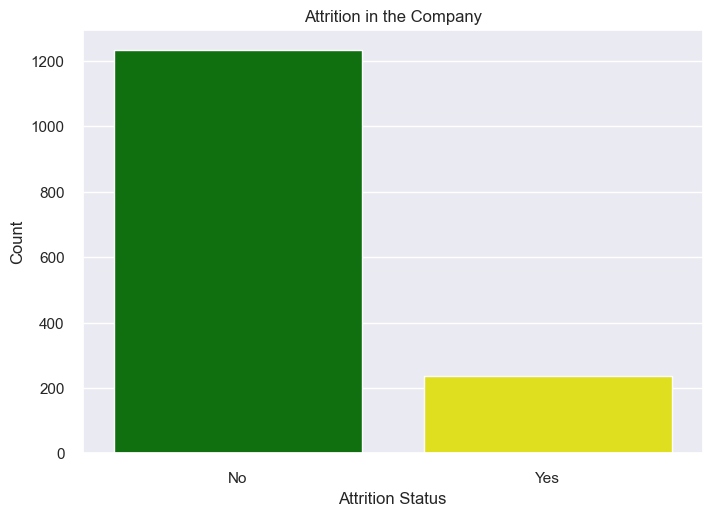

Attrition
0    1233
1     237
Name: count, dtype: int64

In [374]:
# Create a countplot to visualize the values of the "Attrition" variable
sns.countplot(data=df, x="Attrition", palette=["green", "yellow"])
custom_labels = ["No", "Yes"]
plt.xticks(ticks=[0, 1], labels=custom_labels)
plt.title("Attrition in the Company")
plt.xlabel("Attrition Status")
plt.ylabel("Count")
plt.show()
df.Attrition.value_counts()

### 2.5.1. DataFrame and Graph to analyze in detail each feature.


In [375]:
# Create Feature Dataframe
def table_df(x):
    feature = df.groupby(x).agg({"Attrition": ["size", "sum", "mean"]})
    feature.columns = [" ".join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature["Attrition mean"] = feature["Attrition mean"] * 100
    feature.columns = [
        x,
        "Total Numer of Employees ",
        "Total Number of Employees with Attrition",
        "% of Attrition in the group",
    ]
    feature["% of Attrition in the Company"] = (
        feature["Total Number of Employees with Attrition"] / 237
    ) * 100

    return feature

In [376]:
# Create graph to compare its attrition in the company


def graph_df(x, y="bar", z=0):
    feature = df.groupby(x).agg({"Attrition": ["size", "sum", "mean"]})

    feature.columns = [" ".join(col).strip() for col in feature.columns.values]

    feature = feature.reset_index()

    feature["Attrition mean"] = feature["Attrition mean"] * 100

    feature.columns = [
        x,
        "Total Employee",
        "Attrition Number",
        "% of Attrition in the Relevant Group",
    ]

    fig0, ax1 = plt.subplots()

    ax2 = ax1.twinx()

    feature.set_index(feature[x], drop=True, inplace=True)

    # Colors

    feature["Total Employee"].plot(
        kind=y, stacked=True, ax=ax1, color="black", rot=z, colormap="autumn"
    )

    feature["% of Attrition in the Relevant Group"].plot(
        use_index=False, kind="line", ax=ax2, colormap="autumn"
    )

    plt.title("Attrition compared to" + " " + x + " " + "Groups")

    ax1.set_xlabel(x)

    ax1.yaxis.label.set_color("blue")

    ax1.set_ylabel("Total Employee")

    ax2.set_ylabel("Attrition Percentage in the Relevant Group")

    ax2.yaxis.label.set_color("red")

    ax2.set_ylim(0, 100)

    plt.tight_layout()

    plt.show()


def graph_continuous(variable, df):
    total_count = df.groupby(variable)["Attrition"].count().reset_index(name="Total")
    yes_count = (
        df[df.Attrition == 1]
        .groupby(variable)["Attrition"]
        .count()
        .reset_index(name="Yes")
    )
    result_df = pd.merge(total_count, yes_count, on=variable, how="left")
    result_df["Yes"].fillna(0, inplace=True)
    result_df["P"] = result_df.Yes / result_df.Total * 100
    sns.lineplot(x=variable, y="P", data=result_df, color="orange")
    plt.ylabel("Proportion")
    plt.ylim(-5, 105)
    plt.yticks(range(0, 101, 10))
    plt.show()

#### 2.5.1.1. Age


In [377]:
# Labeling Age in groups

table_df(x="Age")
bins = [17, 21, 25, 35, 60]
group_names = ["(18-21)", "(22-25)", "(26-35)", "(36-60)"]
df["Age"] = pd.cut(df["Age"], bins, labels=group_names)

In [378]:
table_df(x="Age")

Age  Total Numer of Employees   \
0  (18-21)                         41   
1  (22-25)                         82   
2  (26-35)                        606   
3  (36-60)                        741   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        22                        53.66   
1                                        22                        26.83   
2                                       116                        19.14   
3                                        77                        10.39   

   % of Attrition in the Company  
0                           9.28  
1                           9.28  
2                          48.95  
3                          32.49

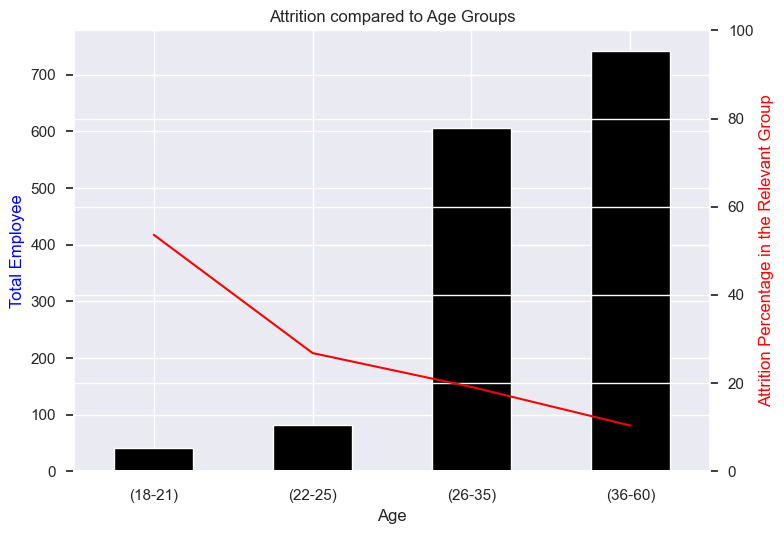

In [379]:
graph_df(x="Age")

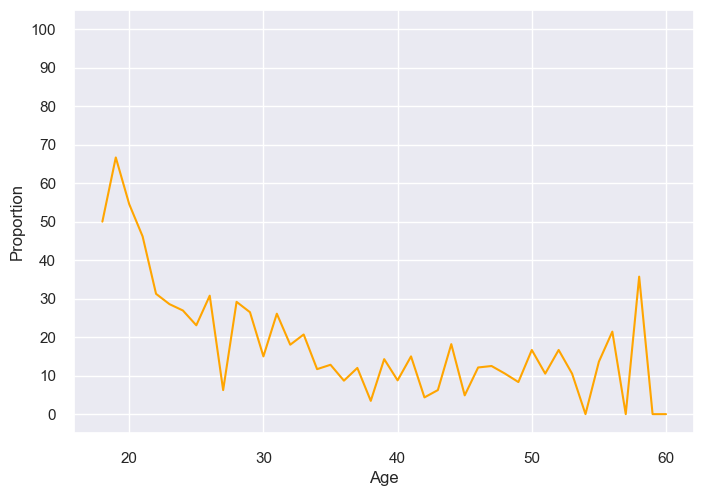

In [380]:
graph_continuous("Age", df_1)

Notes

> 1. __Employees with Age between 18 and 21:__ <p>

22 out of 41 intend to leave the company (~54%) <p>

22 out of 237 intend to leave the company (~9%) <p>

__Their attrition proportion to their age group is high__ <p>

> 2. __Employees with Age between 22 and 25:__ <p>

22 out of 82 intend to leave the company (~27%) <p>

22 out of 237 intend to leave the company (~9%) <p>

**The group 18-25 compose 123 employees** <p>

> 3. ___Employees with Age between 26 and 35:__ <p>

116 out of 606 intend to leave (~19%) <p>

116 out of 237 intend to leave (~49%) <p>

**This group compose almost half of the employees that intend to leave the company** <p>

> 4. __Employees with Age between 36 and 60:__ <p>

77 out of 741 intend to leave the company (~11%) <p>

77 out of 237 intend to leave the company (~32%) <p>

> 5. __Overall, we can retain that:__ <p>

> - Employees with Age between 18 and 25 make up 123 employees. **Why more than half of the employees with ages between 18 and 21 intend to leave? What can the company do to retain them?** <p>

> - Employees with Age between 26 and 35 make up approximately 49% of all attrition in the company. <p>

> - Employees with ages between 36 and 60 have less intentions of leave the company. Amoung 237, 77 employees intend to leave. **Is it possible that is due to the same reasons as the youngest employees?** <p>

#### 2.5.1.2. Business Travel


In [381]:
table_df(x="BusinessTravel")

BusinessTravel  Total Numer of Employees   \
0         Non-Travel                        150   
1  Travel_Frequently                        277   
2      Travel_Rarely                       1043   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        12                         8.00   
1                                        69                        24.91   
2                                       156                        14.96   

   % of Attrition in the Company  
0                           5.06  
1                          29.11  
2                          65.82

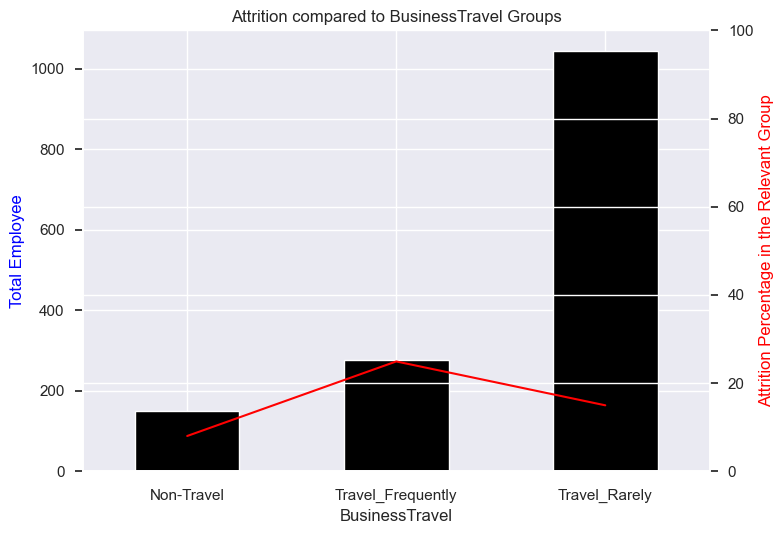

In [382]:
graph_df(x="BusinessTravel")

Notes

> - Employees that don't travel (150) have low attrition rate within the Business travel group (8%). And only 5% within the whole company. <p>

> - Employees that travel frequently (277) have the highest attrition rate within the Business travel group (25%). And 29% within the whole company. <p>

> - Employees that travel rarely (1043) within the business travel group have a attrition rate of 15%. And 66% within the whole company. <p>


#### 2.5.1.3. Department


In [383]:
table_df(x="Department")

Department  Total Numer of Employees   \
0         Human Resources                         63   
1  Research & Development                        961   
2                   Sales                        446   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        12                        19.05   
1                                       133                        13.84   
2                                        92                        20.63   

   % of Attrition in the Company  
0                           5.06  
1                          56.12  
2                          38.82

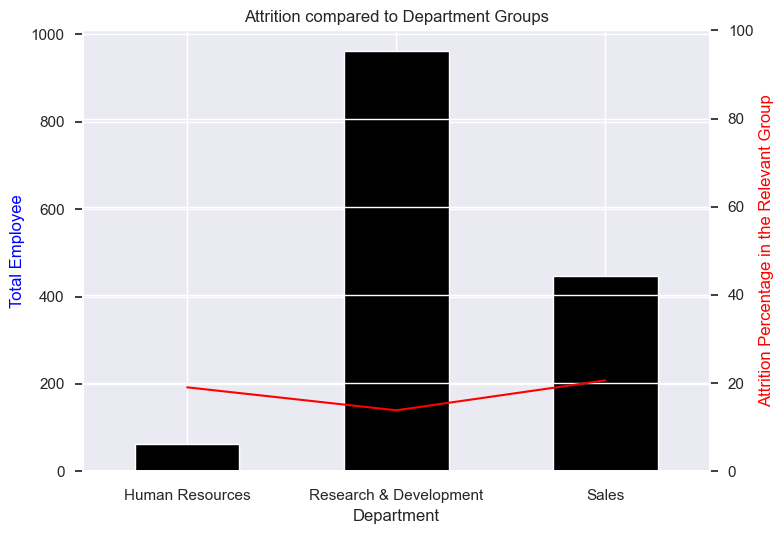

In [384]:
graph_df(x="Department")

Notes 

> - Employees in the HR (63) have the second highest attrition rate within the 3 departments of the company (19%). And within the company 5%. <p>

> - Employees in the R&D (961) have the lowest attrition rate (14%). And 56% within the company. <p>

> - Employees in Sales (446) have the highest attrition rate (21%). And 39% within the company. <p>

#### 2.5.1.4. Distance From Home


In [385]:
# Labeling
table_df(x="DistanceFromHome")
bins = [0, 3, 6, 10, 29]
group_names = ["1-3", "4-6", "7-10", "10-29"]
df["DistanceFromHome"] = pd.cut(df["DistanceFromHome"], bins, group_names)

In [386]:
table_df(x="DistanceFromHome")

DistanceFromHome  Total Numer of Employees   \
0           (0, 3]                        503   
1           (3, 6]                        188   
2          (6, 10]                        335   
3         (10, 29]                        444   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        68                        13.52   
1                                        26                        13.83   
2                                        50                        14.93   
3                                        93                        20.95   

   % of Attrition in the Company  
0                          28.69  
1                          10.97  
2                          21.10  
3                          39.24

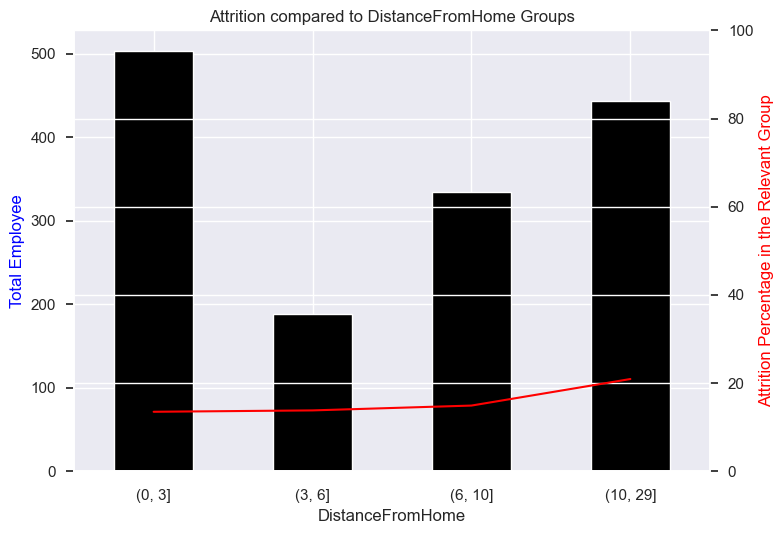

In [387]:
graph_df(x="DistanceFromHome")

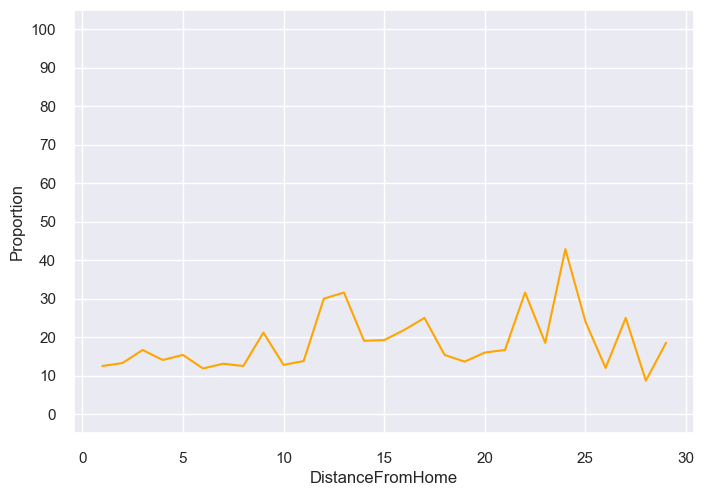

In [388]:
graph_continuous("DistanceFromHome", df_1)

Notes 

> - Employees between 0 and 3 miles of distance between home and work are 503 (more than 1/3 of the company), 68 intend to leave. 68 out of 237 intend to leave. <p>

> - Employees between 3 and 6 miles are 188 and 26 intend to leave. Out of 237, 26 intend do leave. <p>

> - Employees between 6 and 10 miles are 335 and 50 intend to leave. Out of 237, 50 intend to leave. <p>

> - Employees between 10 and 29 miles are 444 and 93 intend to leave. Out of 237, 93 intend to leave. <p>

> - **503 employees live close by the company and 444 live more than 10 miles of the company. These 2 groups contain the majority of employees that intend to leave: 161.** <p>

> - **What's the reason(s) behind the intention to leave the company? For the group with 444 that live at +10 miles we can suspect of the distance. On the other hand, the same reasoning probably do not apply to the group with 503 that live at <3 miles from the office.** <p>

#### 2.5.1.5. Education


In [389]:
# Labeling

table_df(x="Education")
df["Education"] = df["Education"].map(
    {1: "Below College", 2: "College", 3: "Bachelor", 4: "Master", 5: "Doctor"}
)

In [390]:
table_df(x="Education")

Education  Total Numer of Employees   \
0       Bachelor                        572   
1  Below College                        170   
2        College                        282   
3         Doctor                         48   
4         Master                        398   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        99                        17.31   
1                                        31                        18.24   
2                                        44                        15.60   
3                                         5                        10.42   
4                                        58                        14.57   

   % of Attrition in the Company  
0                          41.77  
1                          13.08  
2                          18.57  
3                           2.11  
4                          24.47

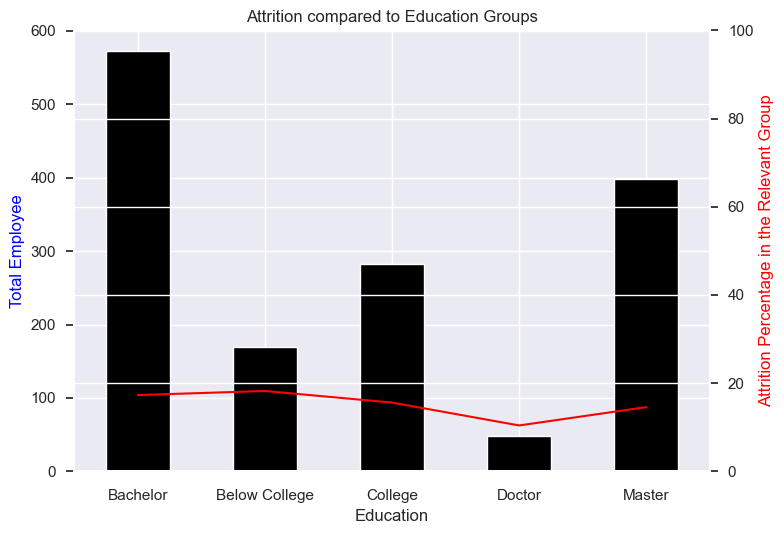

In [391]:
graph_df(x="Education")

Notes 

> - Out of employees with Bachelor (572), 99 want to leave. <p>

> - Out of employees with education bellow college (170), 31 intend to leave. These groups represent the highest % of attrition. <p>

> - Out of employees with college education (282), 44 intend to leave. <p>

> - Out of employees with PhD (48), 5 intend to leave. <p>

> - Out of employees with MsC (398), 58 intend to leave. <p<>

#### 2.5.1.6. Education Field


In [392]:
table_df(x="EducationField")

EducationField  Total Numer of Employees   \
0   Human Resources                         27   
1     Life Sciences                        606   
2         Marketing                        159   
3           Medical                        464   
4             Other                         82   
5  Technical Degree                        132   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                         7                        25.93   
1                                        89                        14.69   
2                                        35                        22.01   
3                                        63                        13.58   
4                                        11                        13.41   
5                                        32                        24.24   

   % of Attrition in the Company  
0                           2.95  
1                          37.55  
2                          14.77  
3                          26.58  
4                           4.64  
5                          13.50

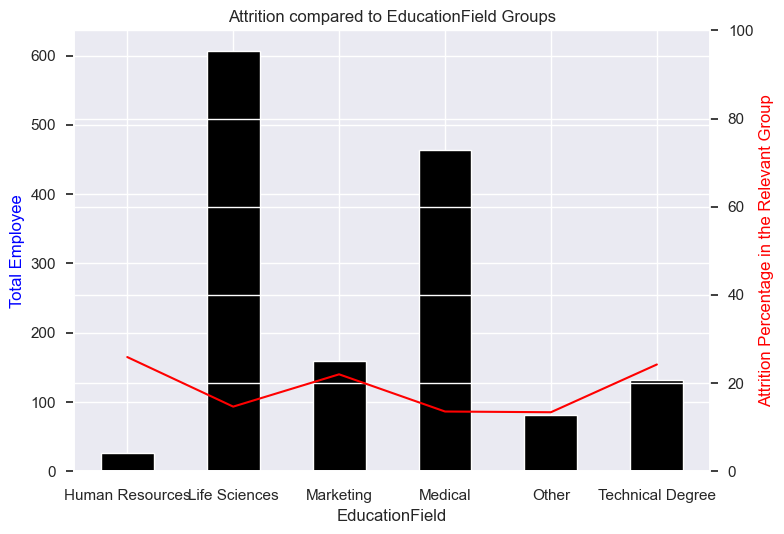

In [393]:
graph_df(x="EducationField")

#### 2.5.1.7. Environment satisfaction


In [394]:
table_df(x="EnvironmentSatisfaction")
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].map(
    {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
)

In [395]:
table_df(x="EnvironmentSatisfaction")

EnvironmentSatisfaction  Total Numer of Employees   \
0                    High                        453   
1                     Low                        284   
2                  Medium                        287   
3               Very High                        446   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        62                        13.69   
1                                        72                        25.35   
2                                        43                        14.98   
3                                        60                        13.45   

   % of Attrition in the Company  
0                          26.16  
1                          30.38  
2                          18.14  
3                          25.32

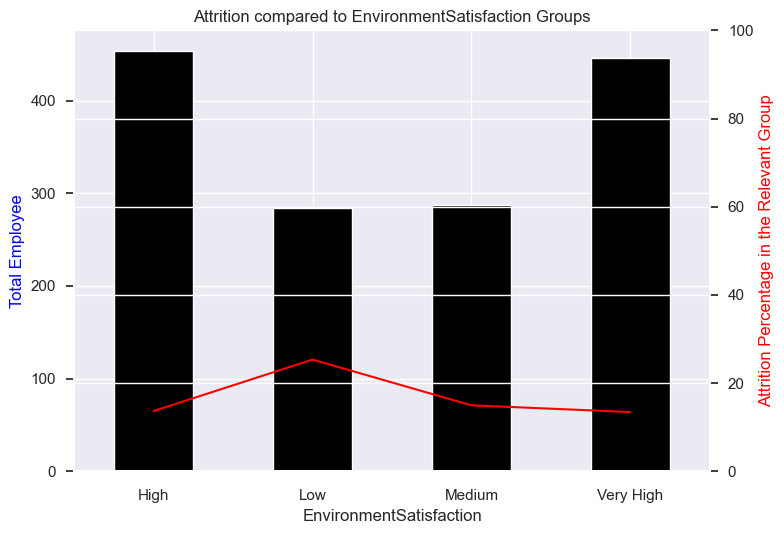

In [396]:
graph_df(x="EnvironmentSatisfaction")

Notes 

> - Employees with high and very high environment satisfaction (ES) have low attrition rate. <p>

> - Employees with low ES have high attrition rate. <p>

> - Employees with medium ES have low attrition rate. <p>

> - **Why 122 employees with high and very high ES want to leave the company? Who are these employees?** <p>

> - **Why 115 employees with low and medium ES want to leave the company? Same or different reasons than the employees with high and very high ES?** <p>

#### 2.5.1.8. Gender


In [397]:
table_df(x="Gender")

Gender  Total Numer of Employees   \
0  Female                        588   
1    Male                        882   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        87                        14.80   
1                                       150                        17.01   

   % of Attrition in the Company  
0                          36.71  
1                          63.29

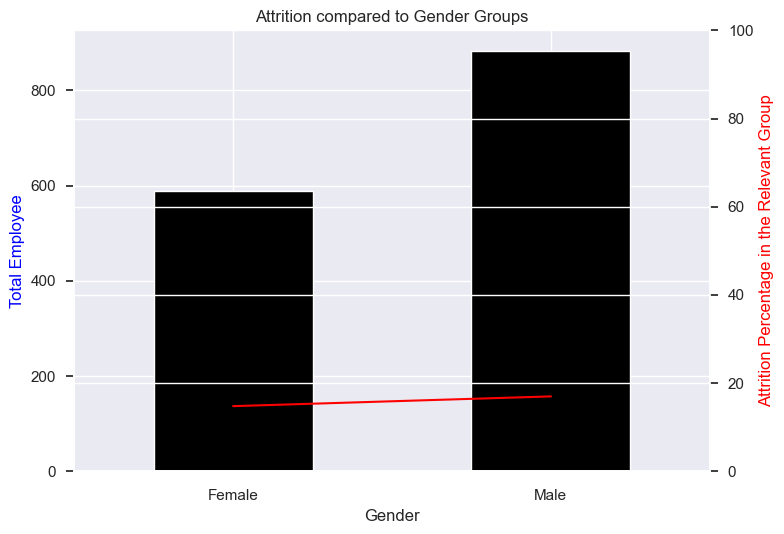

In [398]:
graph_df(x="Gender")

#### 2.5.1.9. Job Involvement


In [399]:
# Labeling
table_df(x="JobInvolvement")
df["JobInvolvement"] = df["JobInvolvement"].map(
    {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
)

In [400]:
table_df(x="JobInvolvement")

JobInvolvement  Total Numer of Employees   \
0           High                        868   
1            Low                         83   
2         Medium                        375   
3      Very High                        144   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                       125                        14.40   
1                                        28                        33.73   
2                                        71                        18.93   
3                                        13                         9.03   

   % of Attrition in the Company  
0                          52.74  
1                          11.81  
2                          29.96  
3                           5.49

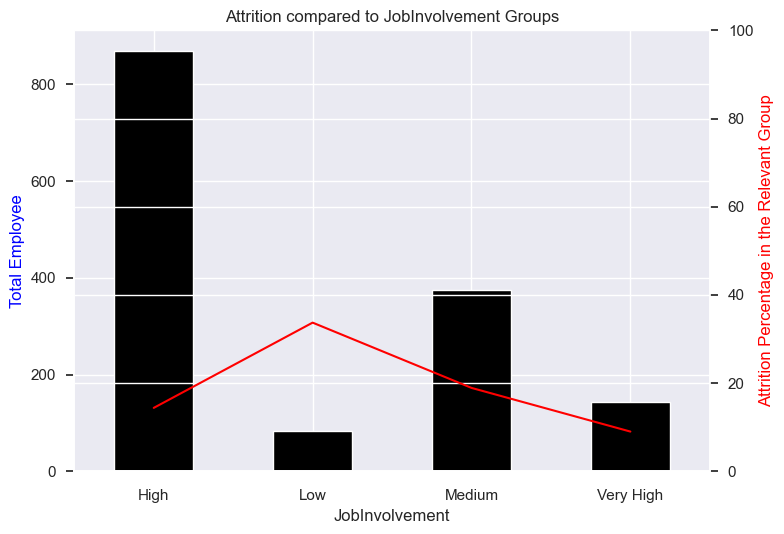

In [401]:
graph_df(x="JobInvolvement")

Notes 

> - 28 out of 83 employees with low job involvement (JB) want to leave <p>

> - 71 out of 375 employees with medium JB want to leave. <p>

> - 125 out of 868 employees with high JB want to leave. <p>

> - 13 out of 144 employees with very high JB want to leave. <p>

#### 2.5.1.10. Job Level


In [402]:
# Labeling

table_df(x="JobLevel")
df["JobLevel"] = df["JobLevel"].map(
    {1: "Level_1", 2: "Level_2", 3: "Level_3", 4: "Level_4", 5: "Level_5"}
)

In [403]:
table_df(x="JobLevel")

JobLevel  Total Numer of Employees   \
0  Level_1                        543   
1  Level_2                        534   
2  Level_3                        218   
3  Level_4                        106   
4  Level_5                         69   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                       143                        26.34   
1                                        52                         9.74   
2                                        32                        14.68   
3                                         5                         4.72   
4                                         5                         7.25   

   % of Attrition in the Company  
0                          60.34  
1                          21.94  
2                          13.50  
3                           2.11  
4                           2.11

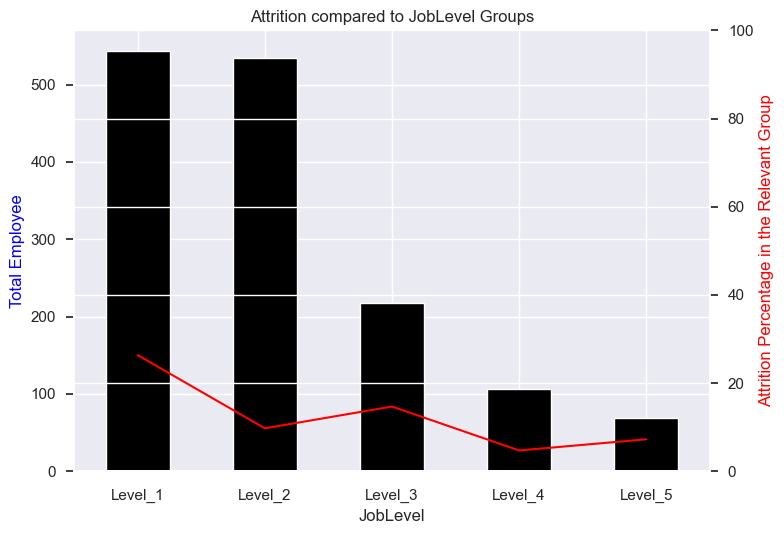

In [404]:
graph_df(x="JobLevel")

Notes

> - The intentions of leaving the company decrease with the inscreasing of job level. <p>

> - **What are the characteristics of the 143 employees on level_1 that intend to leave?** 

#### 2.5.1.11. Job Role


In [405]:
table_df(x="JobRole")

JobRole  Total Numer of Employees   \
0  Healthcare Representative                        131   
1            Human Resources                         52   
2      Laboratory Technician                        259   
3                    Manager                        102   
4     Manufacturing Director                        145   
5          Research Director                         80   
6         Research Scientist                        292   
7            Sales Executive                        326   
8       Sales Representative                         83   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                         9                         6.87   
1                                        12                        23.08   
2                                        62                        23.94   
3                                         5                         4.90   
4                                        10                         6.90   
5                                         2                         2.50   
6                                        47                        16.10   
7                                        57                        17.48   
8                                        33                        39.76   

   % of Attrition in the Company  
0                           3.80  
1                           5.06  
2                          26.16  
3                           2.11  
4                           4.22  
5                           0.84  
6                          19.83  
7                          24.05  
8                          13.92

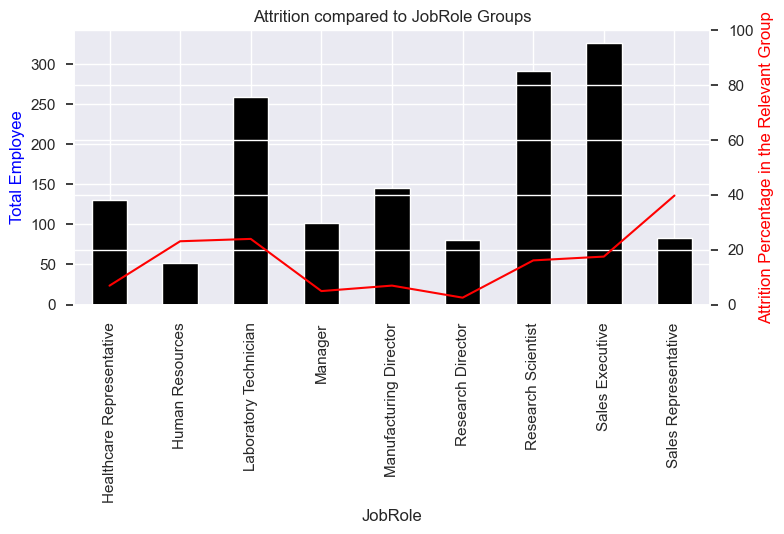

In [406]:
graph_df(x="JobRole", z=90)

Notes 

> - Healthcare representative, manager, research director and manufacturing director are the job roles with less attrition. These 4 positions account for 26 employees. <p>

> - Human resources, laboratory technician, research scientist and sales executive and representative account for 211 employees. These are the job roles that need to be paid attention.

#### 2.5.1.12. Job Satisfaction


In [407]:
# Labeling
table_df(x="JobSatisfaction")
df["JobSatisfaction"] = df["JobSatisfaction"].map(
    {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
)

In [408]:
table_df(x="JobSatisfaction")

JobSatisfaction  Total Numer of Employees   \
0            High                        442   
1             Low                        289   
2          Medium                        280   
3       Very High                        459   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        73                        16.52   
1                                        66                        22.84   
2                                        46                        16.43   
3                                        52                        11.33   

   % of Attrition in the Company  
0                          30.80  
1                          27.85  
2                          19.41  
3                          21.94

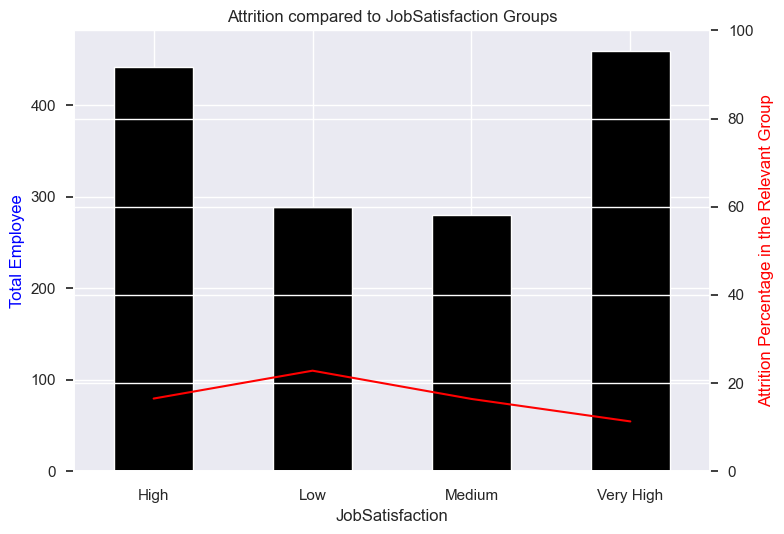

In [409]:
graph_df(x="JobSatisfaction")

Notes 

> - There are 901 employees highly and very higlhy satisfacted in their jobs. Out of these 901, 125 intend to leave the company. <p>

> - There are 569 employees with low and medium job satisfaction. Out of these 569, 112 intend to leave the company.

#### 2.5.1.13. Marital Status


In [410]:
table_df(x="MaritalStatus")

MaritalStatus  Total Numer of Employees   \
0      Divorced                        327   
1       Married                        673   
2        Single                        470   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        33                        10.09   
1                                        84                        12.48   
2                                       120                        25.53   

   % of Attrition in the Company  
0                          13.92  
1                          35.44  
2                          50.63

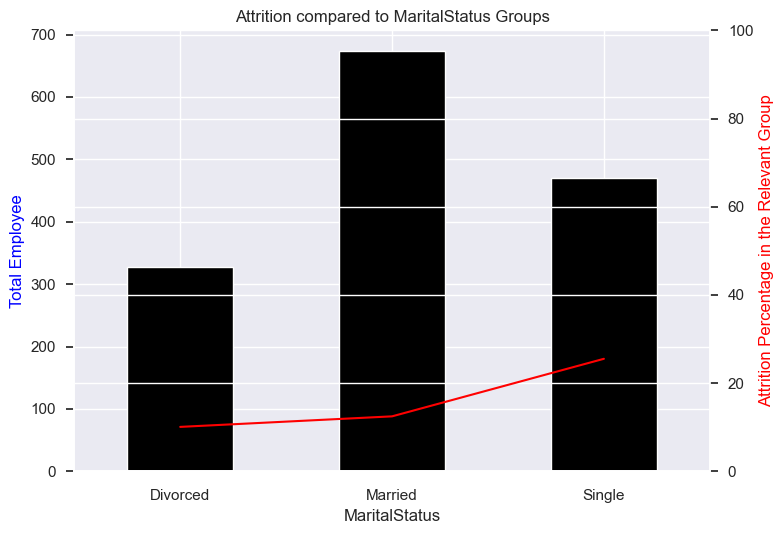

In [411]:
graph_df(x="MaritalStatus")

#### 2.5.1.14. Monthly Income


In [412]:
# Labeling

table_df(x="MonthlyIncome")
bins = [1000, 2000, 3000, 4000, 5000, 7500, 9000, 11000, 15000, 20000]
group_names = [
    "1000-2000",
    "2000-3000",
    "3000-4000",
    "4000-5000",
    "5000-7500",
    "7500-9000",
    "9000-11000",
    "11000-15000",
    "15000-20000",
]
df["MonthlyIncome"] = pd.cut(df["MonthlyIncome"], bins, labels=group_names)

In [413]:
table_df(x="MonthlyIncome")

MonthlyIncome  Total Numer of Employees   \
0     1000-2000                         33   
1     2000-3000                        362   
2     3000-4000                        148   
3     4000-5000                        206   
4     5000-7500                        310   
5     7500-9000                         78   
6    9000-11000                        118   
7   11000-15000                         82   
8   15000-20000                        133   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        18                        54.55   
1                                        95                        26.24   
2                                        24                        16.22   
3                                        26                        12.62   
4                                        30                         9.68   
5                                        10                        12.82   
6                                        22                        18.64   
7                                         7                         8.54   
8                                         5                         3.76   

   % of Attrition in the Company  
0                           7.59  
1                          40.08  
2                          10.13  
3                          10.97  
4                          12.66  
5                           4.22  
6                           9.28  
7                           2.95  
8                           2.11

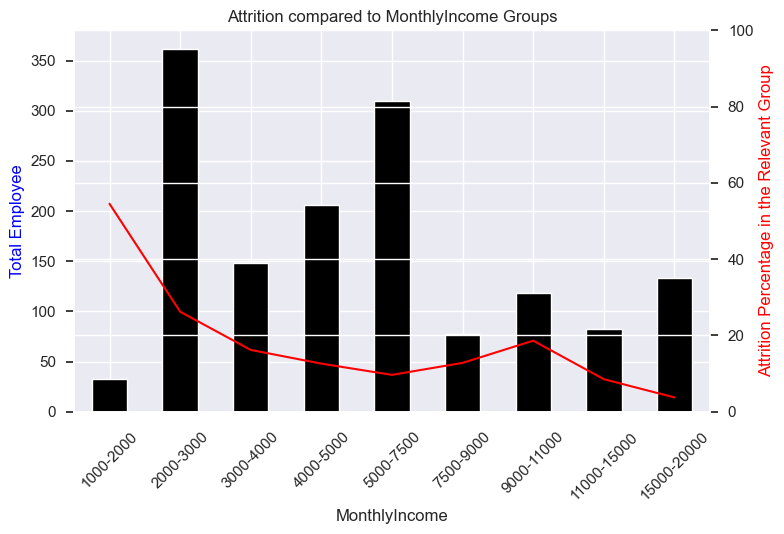

In [414]:
graph_df(x="MonthlyIncome", z=45)

Notes

> - This variable contain hide information that we are not aware about. "Monthly Income" is the total amount of money you earn or receive in a month from all sources. We don't have this information discriminated. <p>

> - Anyway, we can see a decrease on attrition as the monthly income increase, with a exception on this trend for the employees who earn between 9000-11000.

#### 2.5.1.15. NumCompaniesWorked


In [415]:
# Labeling
table_df(x="NumCompaniesWorked")
bins = [0, 1, 2, 3, 4, 5, 10]
group_names = ["0", "1", "2", "3", "4", "5+"]
df["NumCompaniesWorked"] = pd.cut(
    df["NumCompaniesWorked"], bins, labels=group_names, include_lowest=True, right=False
)

In [416]:
table_df(x="NumCompaniesWorked")

NumCompaniesWorked  Total Numer of Employees   \
0                  0                        197   
1                  1                        521   
2                  2                        146   
3                  3                        159   
4                  4                        139   
5                 5+                        308   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        23                        11.68   
1                                        98                        18.81   
2                                        16                        10.96   
3                                        16                        10.06   
4                                        17                        12.23   
5                                        67                        21.75   

   % of Attrition in the Company  
0                           9.70  
1                          41.35  
2                           6.75  
3                           6.75  
4                           7.17  
5                          28.27

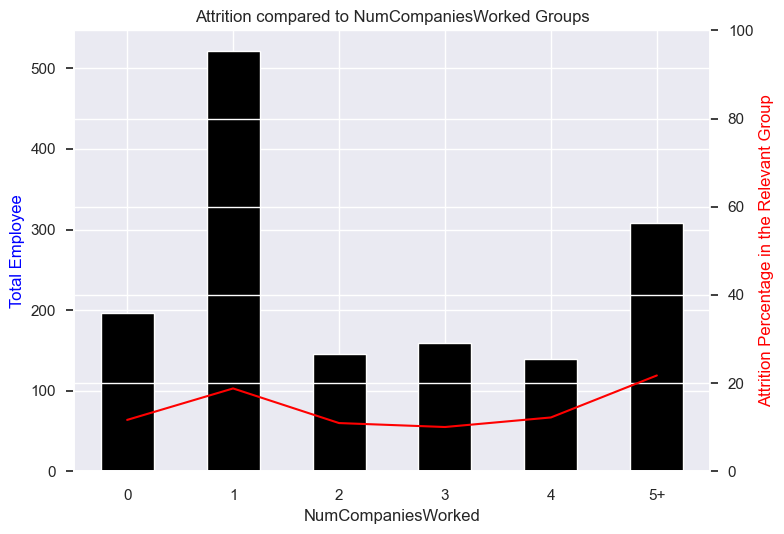

In [417]:
graph_df(x="NumCompaniesWorked")

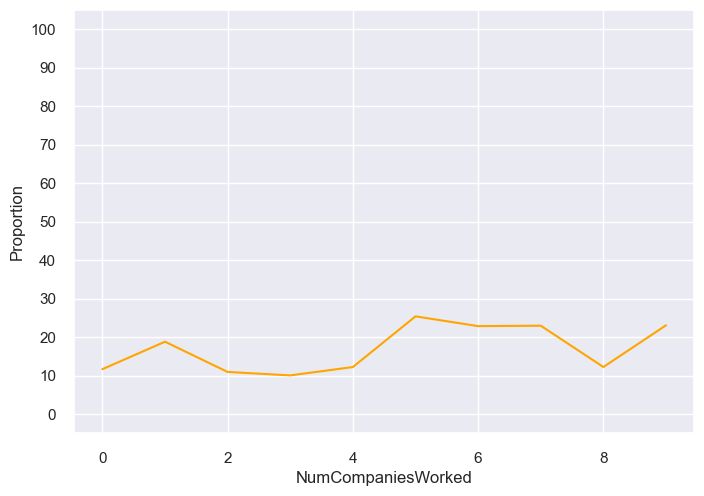

In [418]:
graph_continuous("NumCompaniesWorked", df_1)

Notes 

> - There are +500 employees with 1 company worked before. More then +300 employees with +5. Both these groups have high attrition rate. <p>

> - The employees in the remaining groups are the ones with more stability.

#### 2.5.1.16. Over Time


In [419]:
table_df(x="OverTime")

OverTime  Total Numer of Employees   \
0       No                       1054   
1      Yes                        416   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                       110                        10.44   
1                                       127                        30.53   

   % of Attrition in the Company  
0                          46.41  
1                          53.59

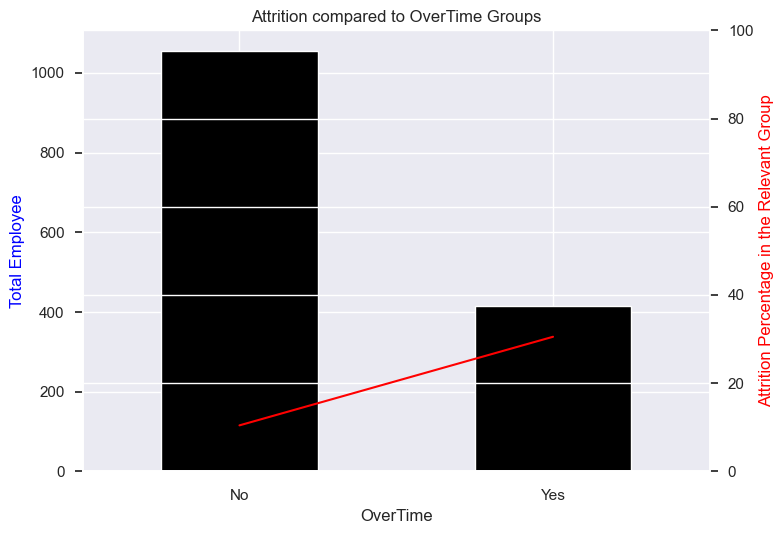

In [420]:
graph_df(x="OverTime")

#### 2.5.1.17. Percent Salary Hike (Percentage increase in Salary)


In [421]:
# Labeling
table_df(x="PercentSalaryHike")
bins = [10, 14, 18, 22, 25]
group_names = ["11-14", "15-18", "19-22", "23-25"]
df["PercentSalaryHike"] = pd.cut(df["PercentSalaryHike"], bins, labels=group_names)

In [422]:
table_df(x="PercentSalaryHike")

PercentSalaryHike  Total Numer of Employees   \
0             11-14                        818   
1             15-18                        350   
2             19-22                        235   
3             23-25                         67   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                       132                        16.14   
1                                        59                        16.86   
2                                        33                        14.04   
3                                        13                        19.40   

   % of Attrition in the Company  
0                          55.70  
1                          24.89  
2                          13.92  
3                           5.49

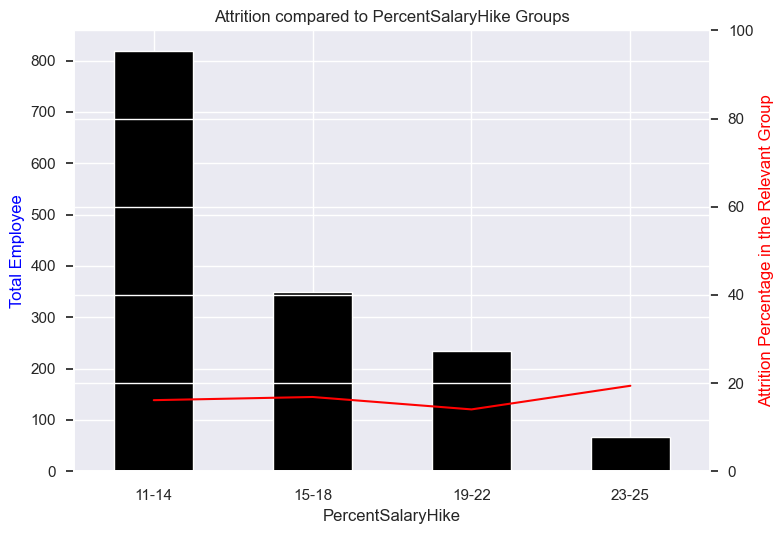

In [423]:
graph_df(x="PercentSalaryHike")

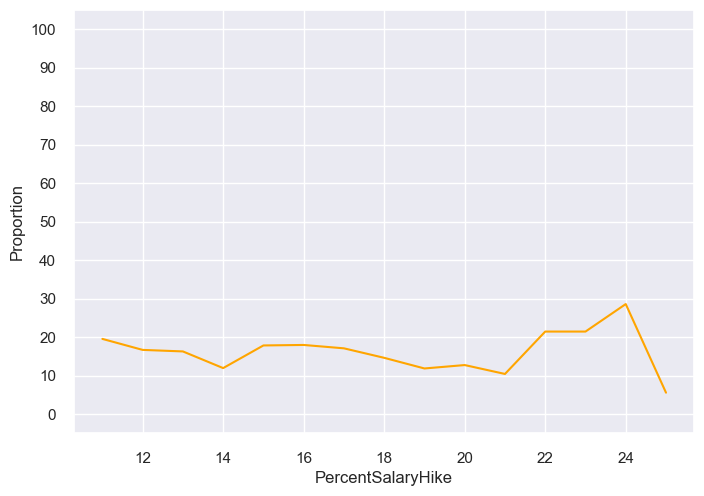

In [424]:
graph_continuous("PercentSalaryHike", df_1)

Notes 

> - Of the 67 employees that received a Salary Hike between 23-25%, 13 want to leave. <p>

> - **Do they associate the salary increase with the idea that they can find a new job with better conditions?**

#### 2.5.1.18. Performance Rating


In [425]:
table_df(x="PerformanceRating")

PerformanceRating  Total Numer of Employees   \
0                  3                       1244   
1                  4                        226   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                       200                        16.08   
1                                        37                        16.37   

   % of Attrition in the Company  
0                          84.39  
1                          15.61

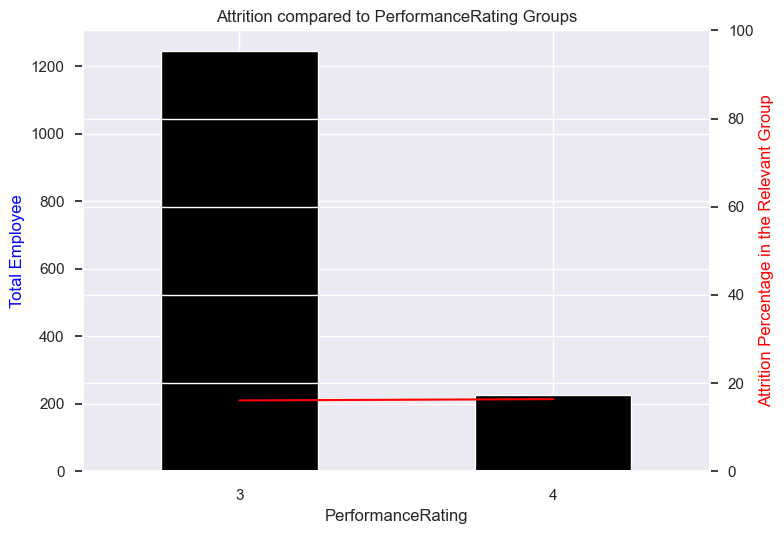

In [426]:
graph_df(x="PerformanceRating")

Notes 

One needs more information regarding this variable.

#### 2.5.1.19. Relationship Satisfaction

In [427]:
# Labeling
table_df(x="RelationshipSatisfaction")
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].map(
    {1: "Low", 2: "Medium", 3: "High", 4: "Very High"}
)

In [428]:
table_df(x="RelationshipSatisfaction")

RelationshipSatisfaction  Total Numer of Employees   \
0                     High                        459   
1                      Low                        276   
2                   Medium                        303   
3                Very High                        432   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        71                        15.47   
1                                        57                        20.65   
2                                        45                        14.85   
3                                        64                        14.81   

   % of Attrition in the Company  
0                          29.96  
1                          24.05  
2                          18.99  
3                          27.00

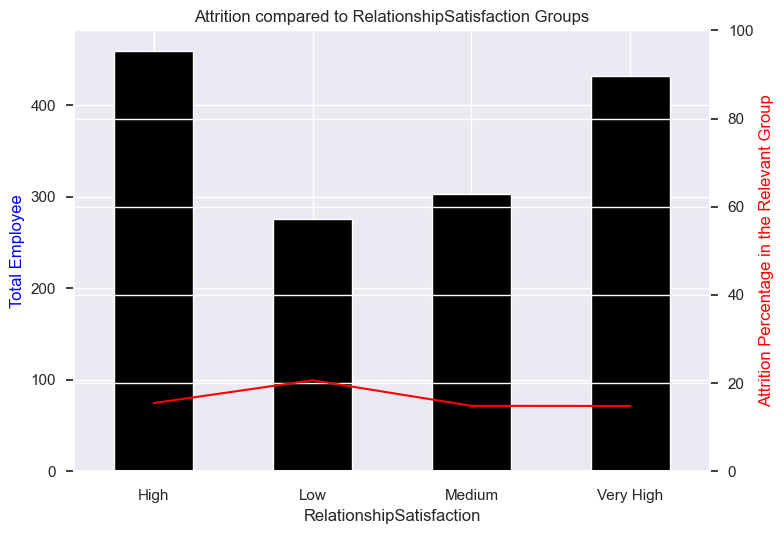

In [429]:
graph_df(x="RelationshipSatisfaction")

Notes

The level of statisfaction with more attrition is Very High.

On the level 'Low', 21% of the employees (57 out of 276) intend to leave the company.

#### 2.5.1.20. Stock Option Level


In [430]:
table_df(x="StockOptionLevel")

StockOptionLevel  Total Numer of Employees   \
0                 0                        631   
1                 1                        596   
2                 2                        158   
3                 3                         85   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                       154                        24.41   
1                                        56                         9.40   
2                                        12                         7.59   
3                                        15                        17.65   

   % of Attrition in the Company  
0                          64.98  
1                          23.63  
2                           5.06  
3                           6.33

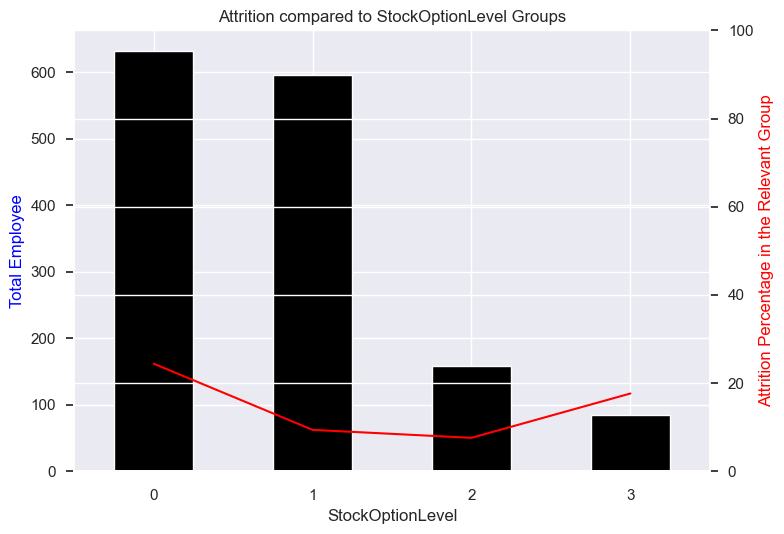

In [431]:
graph_df(x="StockOptionLevel")

#### 2.5.1.21. Total Working Years


In [432]:
# Total Working Years & Attrition Table
table_df(x="TotalWorkingYears")
bins = [0, 1, 5, 10, 15, 20, 40]
group_names = ["1", "2-5", "6-10", "11-15", "16-20", "20-40"]
df["TotalWorkingYears"] = pd.cut(
    df["TotalWorkingYears"], bins, labels=group_names, include_lowest=True
)

In [433]:
table_df(x="TotalWorkingYears")

TotalWorkingYears  Total Numer of Employees   \
0                 1                         92   
1               2-5                        224   
2              6-10                        607   
3             11-15                        191   
4             16-20                        149   
5             20-40                        207   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        45                        48.91   
1                                        46                        20.54   
2                                        91                        14.99   
3                                        24                        12.57   
4                                        15                        10.07   
5                                        16                         7.73   

   % of Attrition in the Company  
0                          18.99  
1                          19.41  
2                          38.40  
3                          10.13  
4                           6.33  
5                           6.75

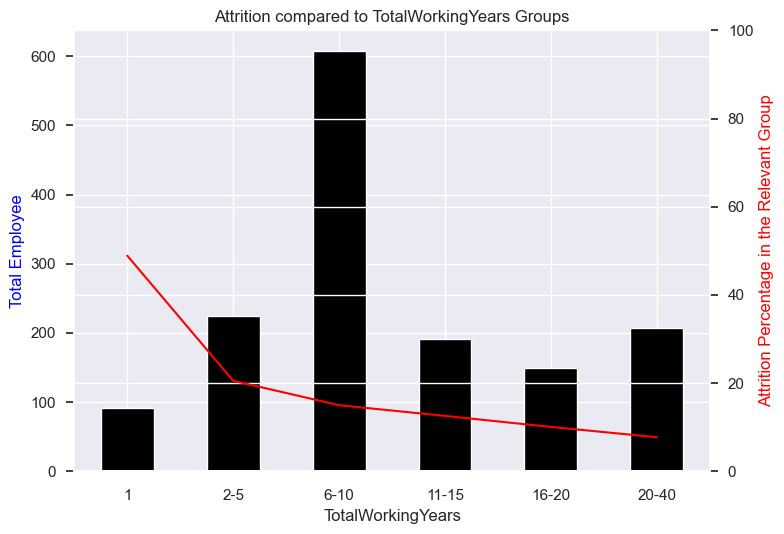

In [434]:
graph_df(x="TotalWorkingYears")

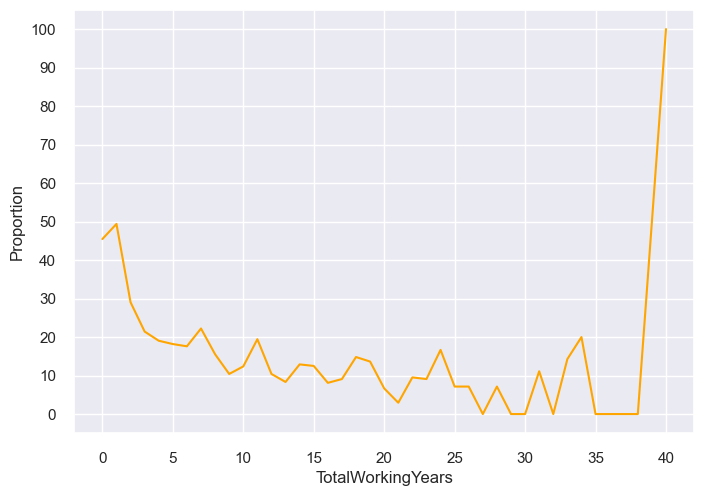

In [435]:
graph_continuous("TotalWorkingYears", df_1)

Notes

Why the subgroup with 6-10 working years, have the highest attrition?

Is it possible that the first two subgroups are job-hoppers?

#### 2.5.1.22. Training Times last Year


In [436]:
table_df(x="TrainingTimesLastYear")

TrainingTimesLastYear  Total Numer of Employees   \
0                      0                         54   
1                      1                         71   
2                      2                        547   
3                      3                        491   
4                      4                        123   
5                      5                        119   
6                      6                         65   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        15                        27.78   
1                                         9                        12.68   
2                                        98                        17.92   
3                                        69                        14.05   
4                                        26                        21.14   
5                                        14                        11.76   
6                                         6                         9.23   

   % of Attrition in the Company  
0                           6.33  
1                           3.80  
2                          41.35  
3                          29.11  
4                          10.97  
5                           5.91  
6                           2.53

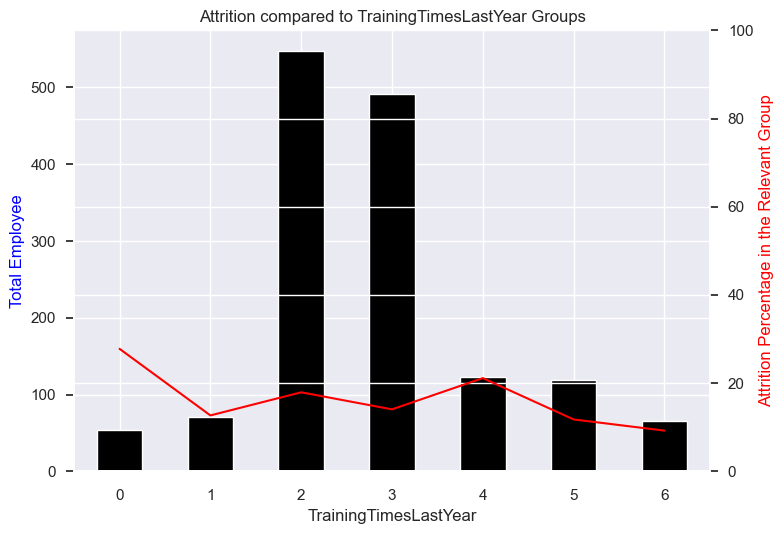

In [437]:
graph_df(x="TrainingTimesLastYear")

Notes

The highest attrition are employees with 2 and 3 trainings last year. **Is it possible that they had a bad experience with the trainings?**

#### 2.5.1.23. Work Life Balance


In [438]:
# Labeling
table_df(x="WorkLifeBalance")
df["WorkLifeBalance"] = df["WorkLifeBalance"].map(
    {1: "Bad", 2: "Good", 3: "Better", 4: "Best"}
)

In [439]:
table_df(x="WorkLifeBalance")

WorkLifeBalance  Total Numer of Employees   \
0             Bad                         80   
1            Best                        153   
2          Better                        893   
3            Good                        344   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        25                        31.25   
1                                        27                        17.65   
2                                       127                        14.22   
3                                        58                        16.86   

   % of Attrition in the Company  
0                          10.55  
1                          11.39  
2                          53.59  
3                          24.47

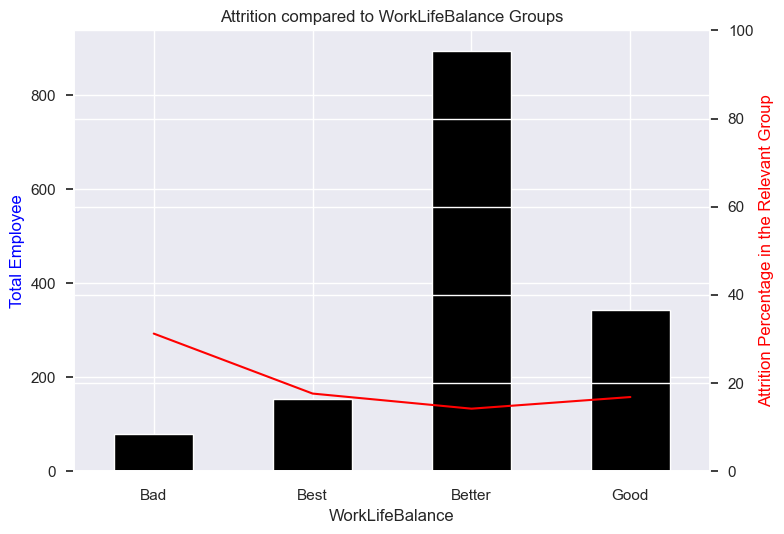

In [440]:
graph_df(x="WorkLifeBalance")

Notes

Only 80 employees consider the work life balance bad. And out of these only 25 employees intend to leave the company.

#### 2.5.1.24. YearsAtCompany

In [441]:
# Labeling
table_df(x="YearsAtCompany")
bins = [0, 1, 5, 10, 20, 30, 40]
group_names = ["1", "2-5", "6-10", "11-20", "21-30", "31-40"]
df["YearsAtCompany"] = pd.cut(
    df["YearsAtCompany"], bins, labels=group_names, include_lowest=True
)

In [442]:
table_df(x="YearsAtCompany")

YearsAtCompany  Total Numer of Employees   \
0              1                        215   
1            2-5                        561   
2           6-10                        448   
3          11-20                        180   
4          21-30                         50   
5          31-40                         16   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        75                        34.88   
1                                        87                        15.51   
2                                        55                        12.28   
3                                        12                         6.67   
4                                         4                         8.00   
5                                         4                        25.00   

   % of Attrition in the Company  
0                          31.65  
1                          36.71  
2                          23.21  
3                           5.06  
4                           1.69  
5                           1.69

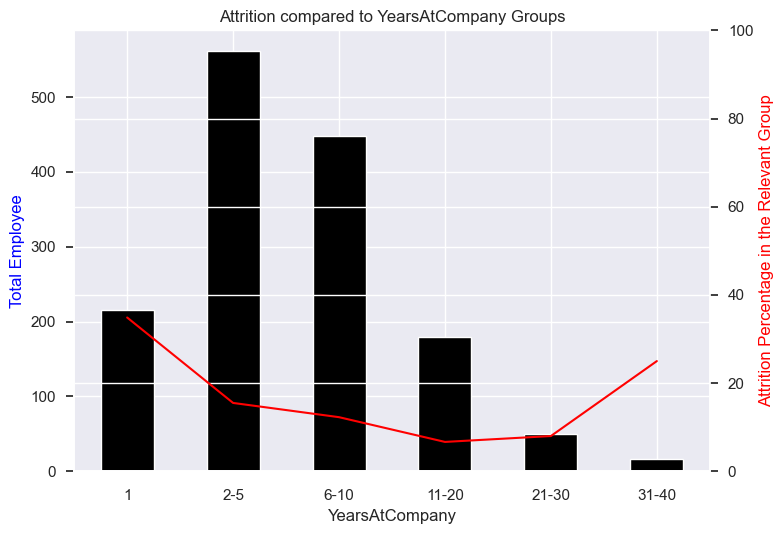

In [443]:
graph_df(x="YearsAtCompany")

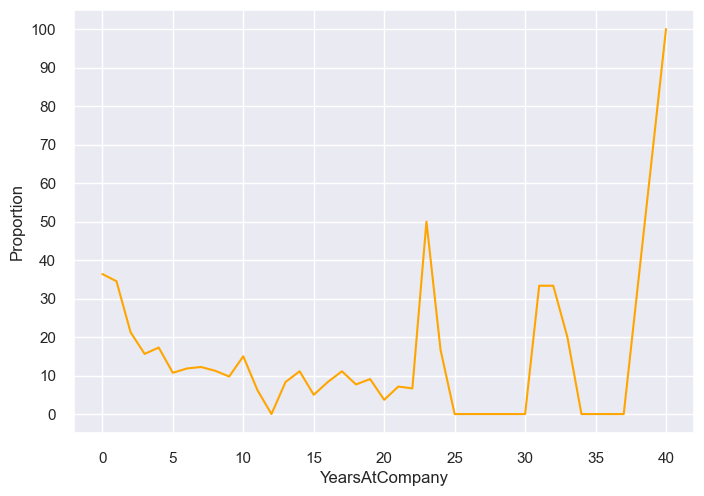

In [444]:
graph_continuous("YearsAtCompany", df_1)

Notes

35% of the employees with 1 year in the company intend to leave.

Employees with +11 years at the company have low attrition rate.

#### 2.5.1.25. Years in Current Role


In [445]:
# Labeling
table_df(x="YearsInCurrentRole")
bins = [0, 1, 4, 6, 7, 10, 18]
group_names = ["1", "2-4", "5-6", "7", "8-10", "10-18"]
df["YearsInCurrentRole"] = pd.cut(
    df["YearsInCurrentRole"], bins, labels=group_names, include_lowest=True
)

In [446]:
table_df(x="YearsInCurrentRole")

YearsInCurrentRole  Total Numer of Employees   \
0                  1                        301   
1                2-4                        611   
2                5-6                         73   
3                  7                        222   
4               8-10                        185   
5              10-18                         78   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                        84                        27.91   
1                                        99                        16.20   
2                                         3                         4.11   
3                                        31                        13.96   
4                                        15                         8.11   
5                                         5                         6.41   

   % of Attrition in the Company  
0                          35.44  
1                          41.77  
2                           1.27  
3                          13.08  
4                           6.33  
5                           2.11

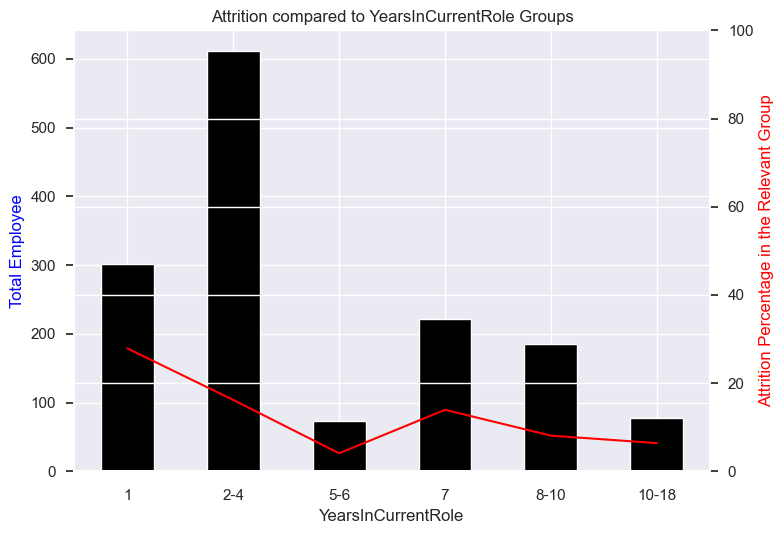

In [447]:
graph_df(x="YearsInCurrentRole")

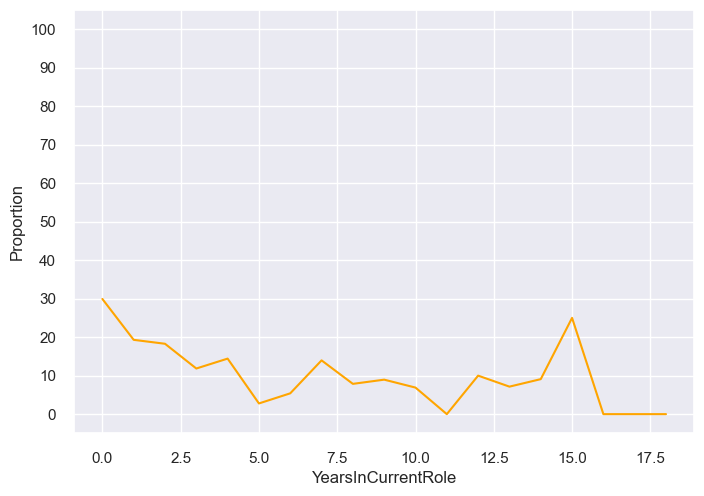

In [448]:
graph_continuous("YearsInCurrentRole", df_1)

Notes

> - Is possible that the employees with 1 year in the current role are not satisfied with their responsibilities? Or are job-hoppers? <p>

> - **The 73 employees with 5-6 years in the current role are the ones with administrative work, and don't have the pressure of the sales employees?**

#### 2.5.1.26. Years Since Last Promotion


In [449]:
# Labeling
table_df(x="YearsSinceLastPromotion")
bins = [0, 1, 2, 3, 4, 7, 8, 16]
group_names = ["0", "1", "2", "3", "4-6", "7", "8+"]
df["YearsSinceLastPromotion"] = pd.cut(
    df["YearsSinceLastPromotion"],
    bins,
    labels=group_names,
    include_lowest=True,
    right=False,
)

In [450]:
table_df(x="YearsSinceLastPromotion")

YearsSinceLastPromotion  Total Numer of Employees   \
0                       0                        581   
1                       1                        357   
2                       2                        159   
3                       3                         52   
4                     4-6                        138   
5                       7                         76   
6                      8+                        107   

   Total Number of Employees with Attrition  % of Attrition in the group  \
0                                       110                        18.93   
1                                        49                        13.73   
2                                        27                        16.98   
3                                         9                        17.31   
4                                        13                         9.42   
5                                        16                        21.05   
6                                        13                        12.15   

   % of Attrition in the Company  
0                          46.41  
1                          20.68  
2                          11.39  
3                           3.80  
4                           5.49  
5                           6.75  
6                           5.49

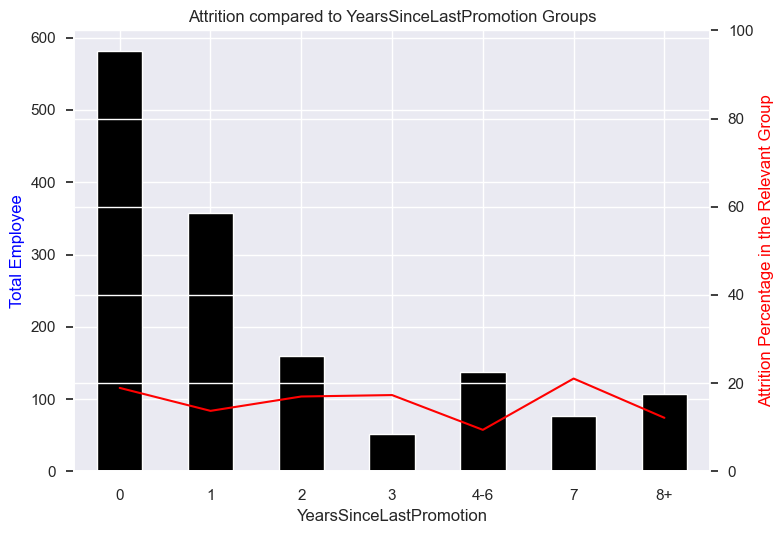

In [451]:
graph_df(x="YearsSinceLastPromotion")

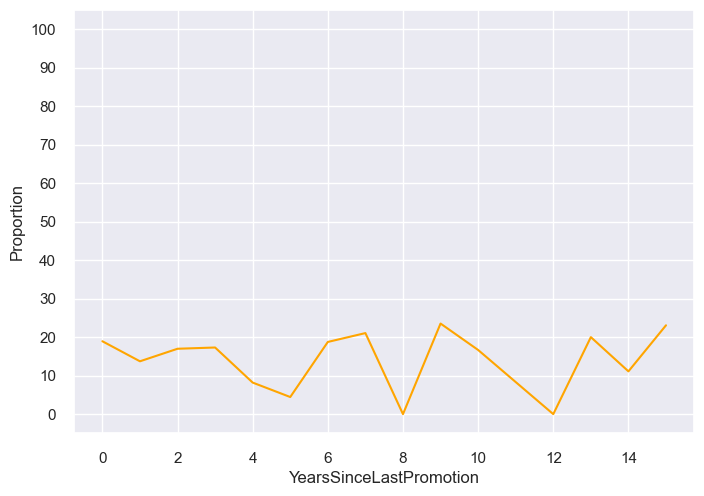

In [452]:
graph_continuous("YearsSinceLastPromotion", df_1)

#### 2.5.1.27. Years with current manager


In [453]:
# Labeling
table_df(x="YearsWithCurrManager")
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 18]
group_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10+"]
df["YearsWithCurrManager"] = pd.cut(
    df["YearsWithCurrManager"],
    bins,
    labels=group_names,
    include_lowest=True,
    right=False,
)

In [454]:
table_df(x="YearsWithCurrManager")

YearsWithCurrManager  Total Numer of Employees   \
0                     0                        263   
1                     1                         76   
2                     2                        344   
3                     3                        142   
4                     4                         98   
5                     5                         31   
6                     6                         29   
7                     7                        216   
8                     8                        107   
9                     9                         64   
10                  10+                        100   

    Total Number of Employees with Attrition  % of Attrition in the group  \
0                                         85                        32.32   
1                                         11                        14.47   
2                                         50                        14.53   
3                                         19                        13.38   
4                                         11                        11.22   
5                                          4                        12.90   
6                                          4                        13.79   
7                                         31                        14.35   
8                                         10                         9.35   
9                                          6                         9.38   
10                                         6                         6.00   

    % of Attrition in the Company  
0                           35.86  
1                            4.64  
2                           21.10  
3                            8.02  
4                            4.64  
5                            1.69  
6                            1.69  
7                           13.08  
8                            4.22  
9                            2.53  
10                           2.53

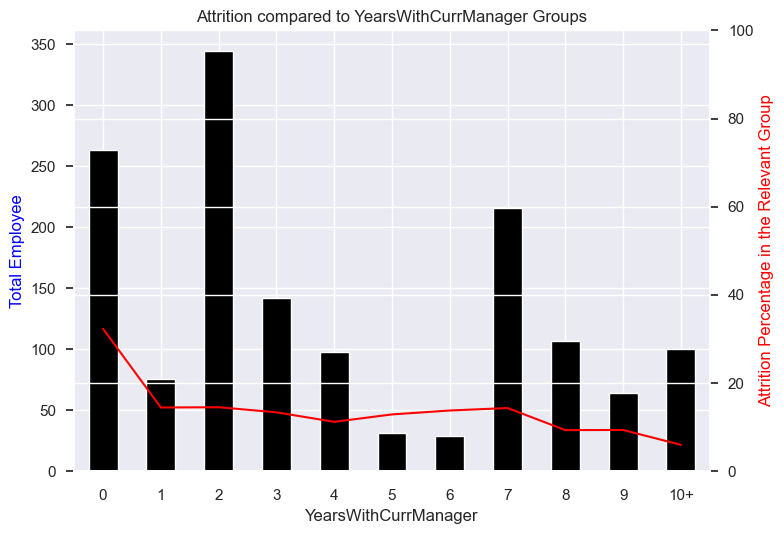

In [455]:
graph_df(x="YearsWithCurrManager")

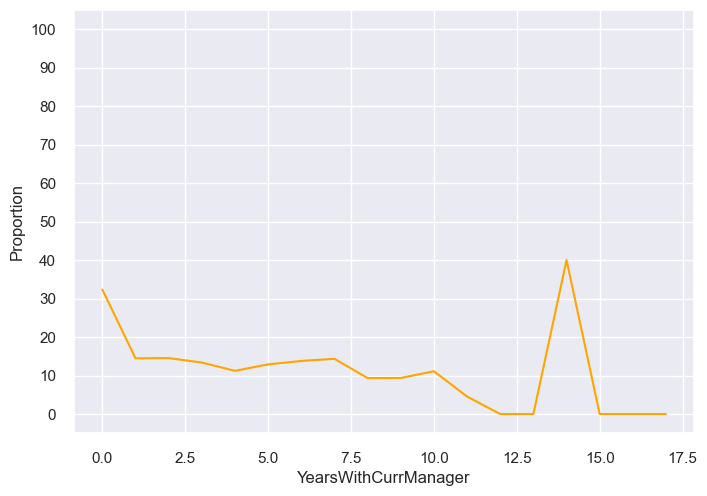

In [456]:
graph_continuous("YearsWithCurrManager", df_1)

<a class="anchor" id="13th-bullet">

## 2.6. Variable's distribution

</a>

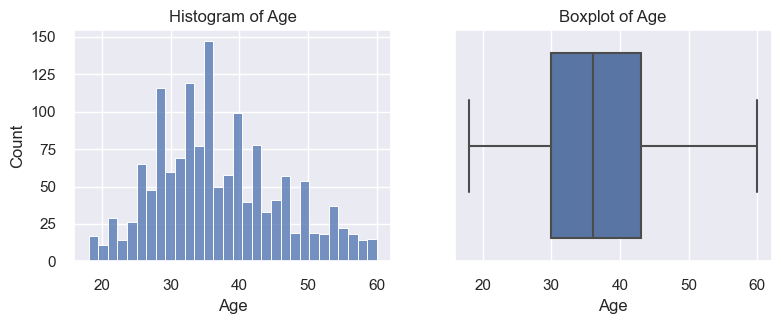

Skew: 0.4132863018563338, Kurtosis : -0.4041451371872906


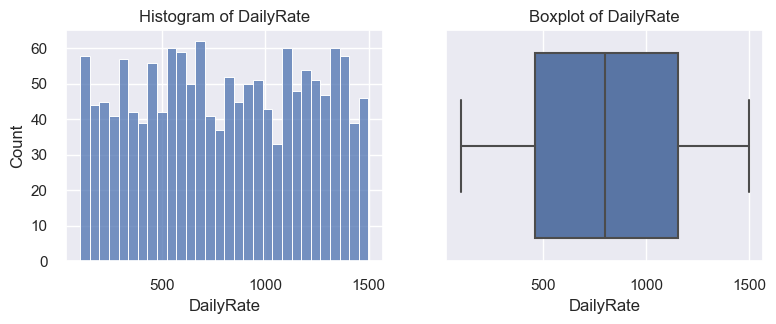

Skew: -0.003518568352325854, Kurtosis : -1.2038228076234574


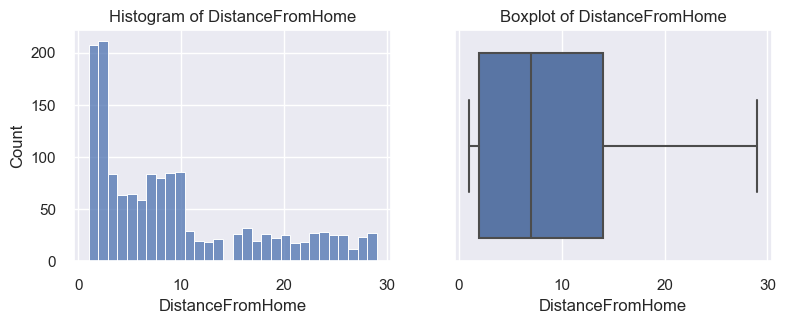

Skew: 0.9581179956568269, Kurtosis : -0.22483340490405102


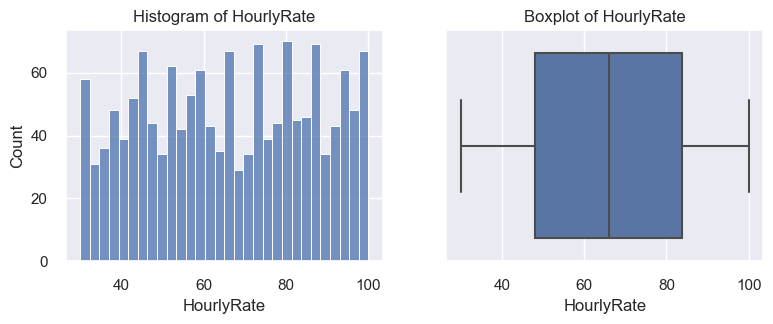

Skew: -0.03231095290044942, Kurtosis : -1.1963984562565886


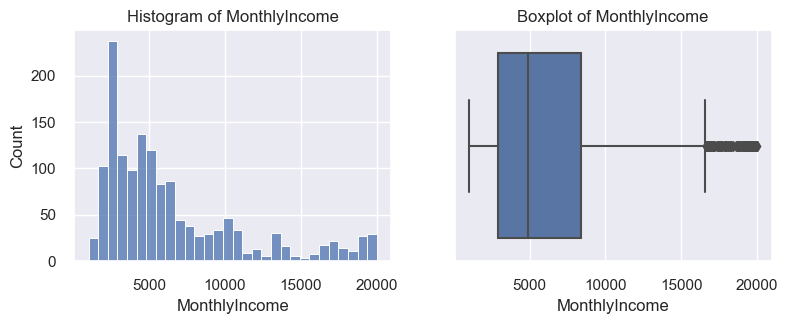

Skew: 1.3698166808390662, Kurtosis : 1.005232691449859


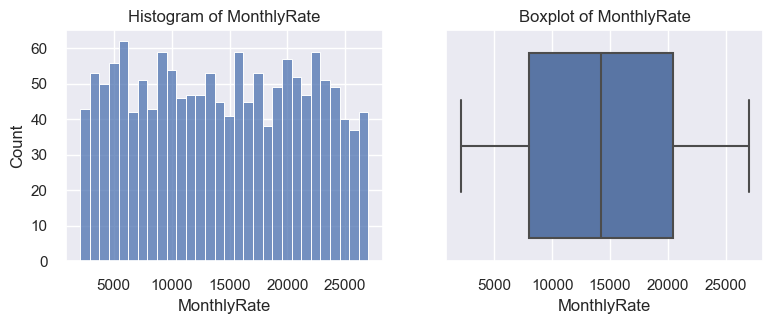

Skew: 0.018577807891132458, Kurtosis : -1.2149560995878737


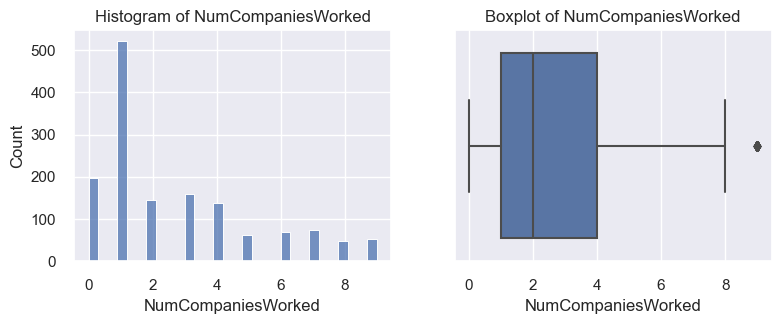

Skew: 1.026471111968205, Kurtosis : 0.01021381669037602


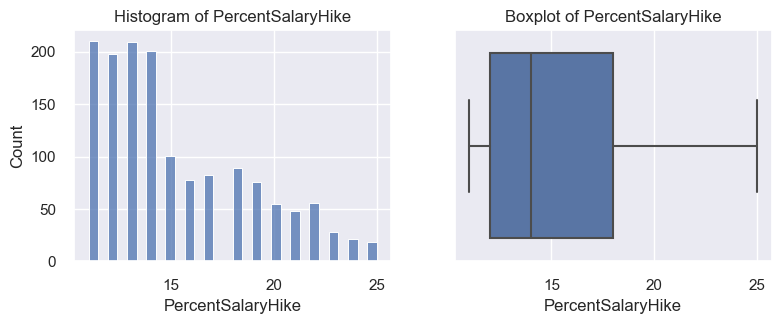

Skew: 0.8211279755780908, Kurtosis : -0.30059822209054543


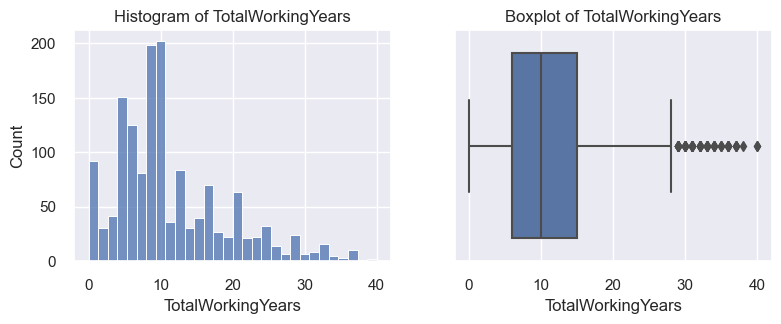

Skew: 1.1171718528128527, Kurtosis : 0.918269536621358


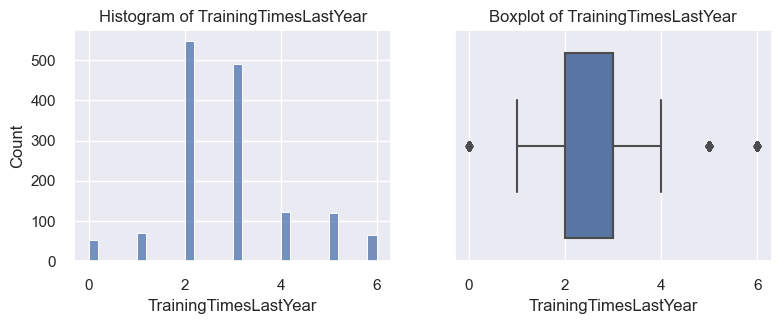

Skew: 0.5531241710537028, Kurtosis : 0.4949929860394717


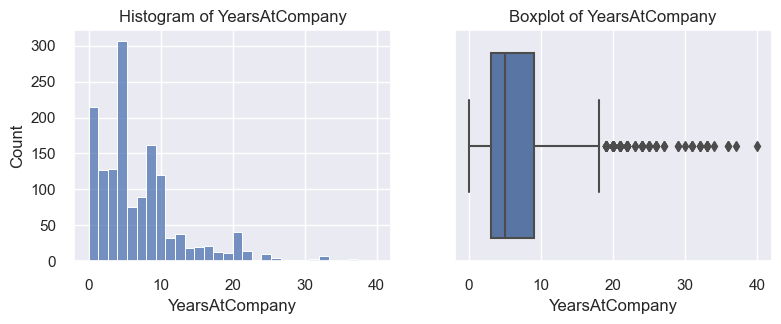

Skew: 1.7645294543422085, Kurtosis : 3.93550875575465


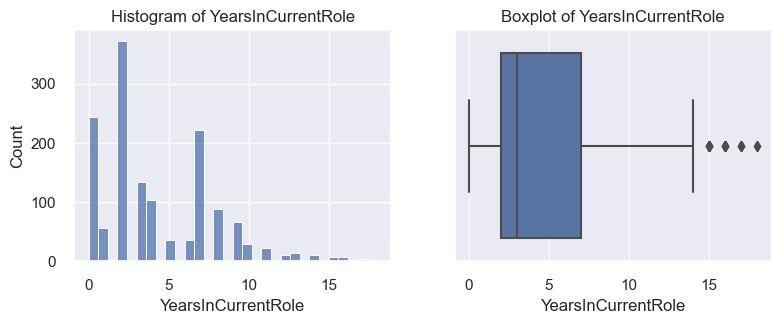

Skew: 0.9173631562908262, Kurtosis : 0.47742077351356293


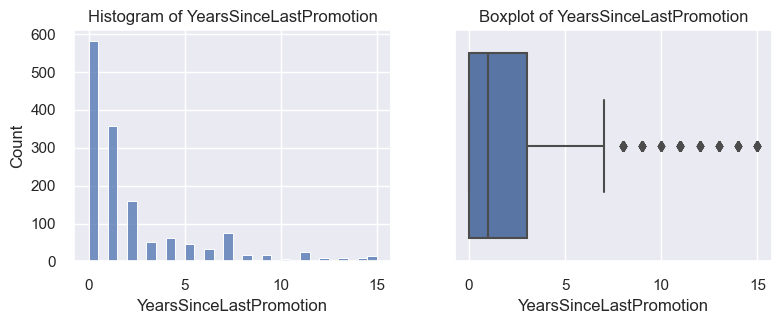

Skew: 1.9842899833524859, Kurtosis : 3.612673114548667


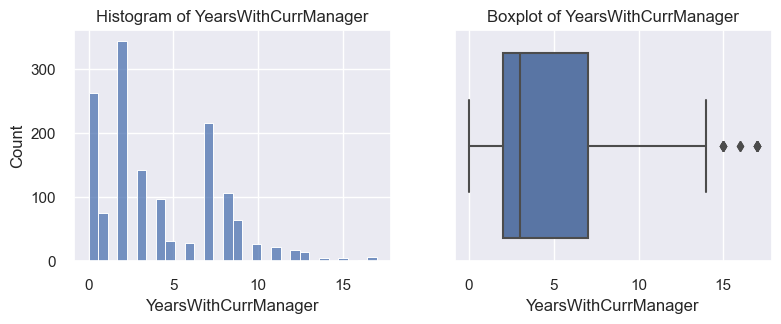

Skew: 0.8334509919918475, Kurtosis : 0.17105808388335575


In [457]:
for i in df_quantitative:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 3))
    sns.histplot(ax=ax1, x=df_quantitative[i], bins=30)
    sns.boxplot(ax=ax2, x=df_quantitative[i])
    ax1.set_title(f"Histogram of {i}")
    ax2.set_title(f"Boxplot of {i}")
    plt.show()
    print(f"Skew: {df_quantitative[i].skew()}, Kurtosis : {df_quantitative[i].kurt()}")

Notes 

> - We can see that the distribution of the variables have a the tail to the right, indicating lower values in the majority of the variables. Monthly, Daily and Hourly Rates and Ages are exceptions.

<a class="anchor" id="14th-bullet">

### 2.6.1. Outliers

</a>

<a class="anchor" id="15th-bullet">

#### 2.6.1.1. IQR method

</a>

In [458]:
total = 0
for i in df_quantitative:
    Q1 = np.percentile(df_quantitative[i], 25)
    Q3 = np.percentile(df_quantitative[i], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 3.0 * IQR
    upper_bound = Q3 + 3.0 * IQR

    outliers = df_quantitative[
        (df_quantitative[i] < lower_bound) | (df_quantitative[i] > upper_bound)
    ]
    total += len(outliers)
    if len(outliers) > 0:
        print(f"{i} has {len(outliers)} outliers")
print(f"Total number of outliers - {total}")

YearsAtCompany has 19 outliers
YearsSinceLastPromotion has 32 outliers
Total number of outliers - 51


<a class="anchor" id="16th-bullet">

#### 2.6.1.2. Z-Scores

</a>

This method is based on the mean and does not make sense applying on non-normal distributions.

In [459]:
total = 0
for i in df_quantitative:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(df_quantitative[i]))

    # Define a threshold for outlier detection
    threshold = 3

    # Identify outliers
    outliers = np.where(z_scores > threshold)[0]
    total += len(outliers)

    if len(outliers) > 0:
        print(f"{i} has {len(outliers)} outliers")
print(f"Total number of outliers - {total}")

TotalWorkingYears has 16 outliers
YearsAtCompany has 25 outliers
YearsInCurrentRole has 13 outliers
YearsSinceLastPromotion has 42 outliers
YearsWithCurrManager has 14 outliers
Total number of outliers - 110


<a class="anchor" id="17th-bullet">

#### 2.6.1.3. Isolation Forest

</a>

In [460]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(
    n_estimators=100, contamination=0.05, max_samples="auto"
)  # n_estimators == number of trees, contamination == proportion of outliers in the dataset (default is 0.03), max_samples == 256

prediction = iforest.fit_predict(df_quantitative)

# Extract normal and outlier data
normal_data = df_quantitative[prediction == 1]
outliers = df_quantitative[prediction == -1]

print("Number of outliers detected: {}".format(len(outliers)))
print("Number of normal samples detected: {}".format(len(normal_data)))

# If you want to visualise the outliers, uncomment the following code block. Since the data is all the quantitative variables, interpretation is difficult.

# plt.scatter(normal_data.iloc[:, 0], normal_data.iloc[:, 1], label='Normal')
# plt.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], label='Outliers')
# plt.title("Random data points with outliers identified.")
# plt.legend()
# plt.show()

# -1 stands for an anomaly and 1 stands for an normal instance. The isolation forest creates trees with certain conditions that quickly isolate the outliers

Number of outliers detected: 74
Number of normal samples detected: 1396


<a class="anchor" id="18th-bullet">

### 2.6.2. Yeo-Johnson Transformation

</a>

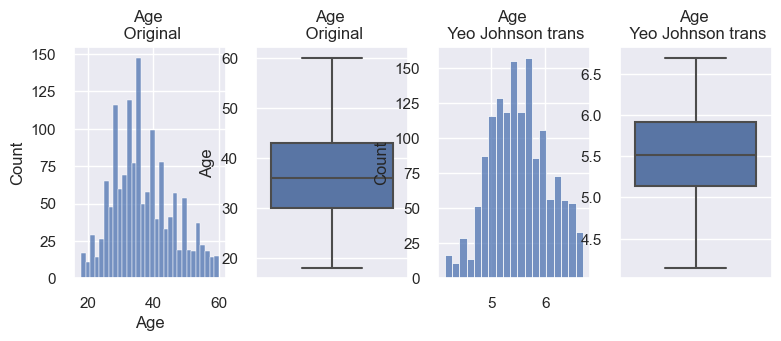

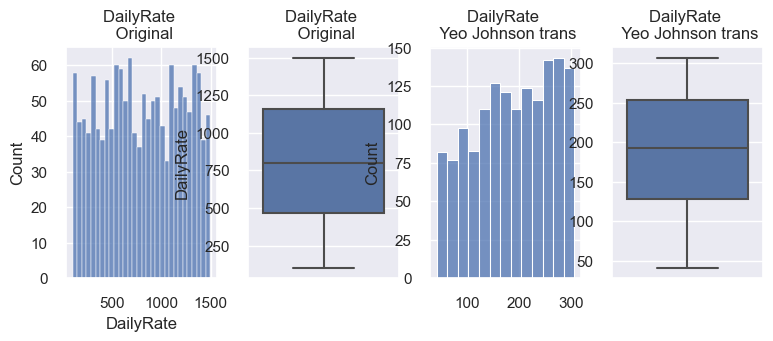

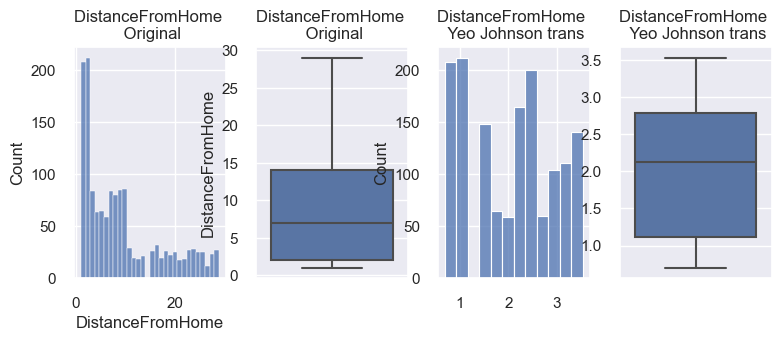

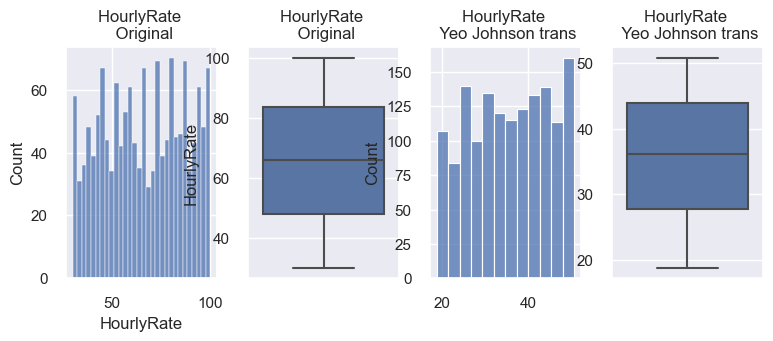

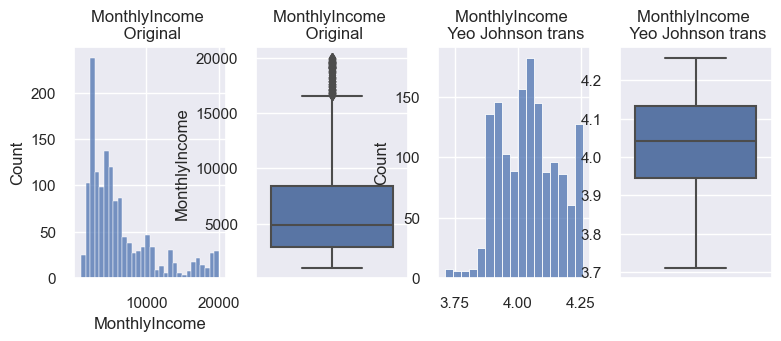

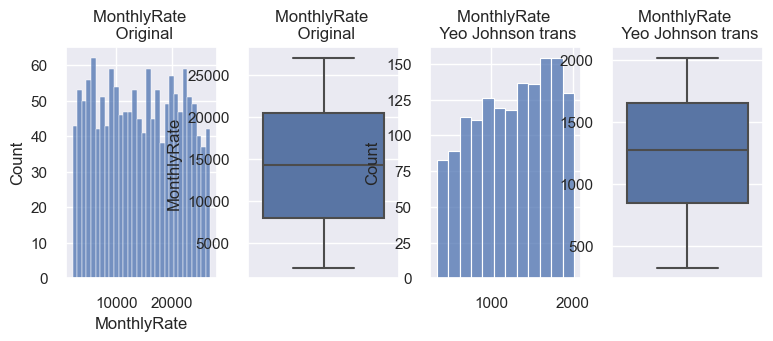

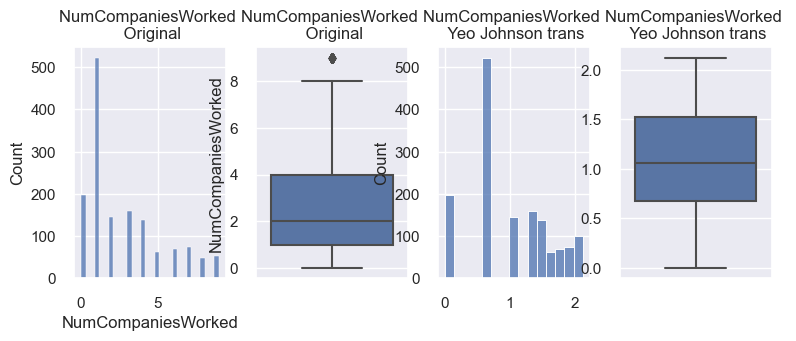

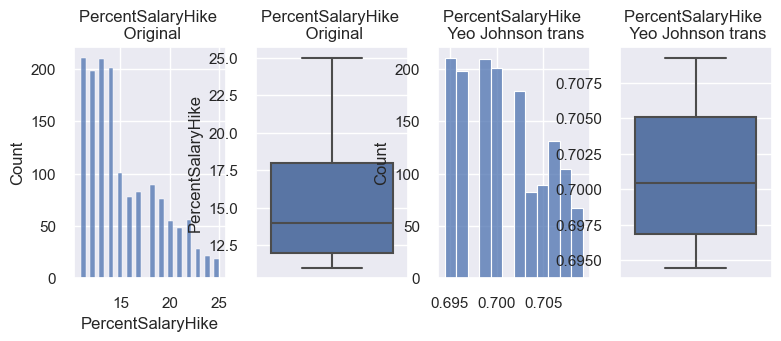

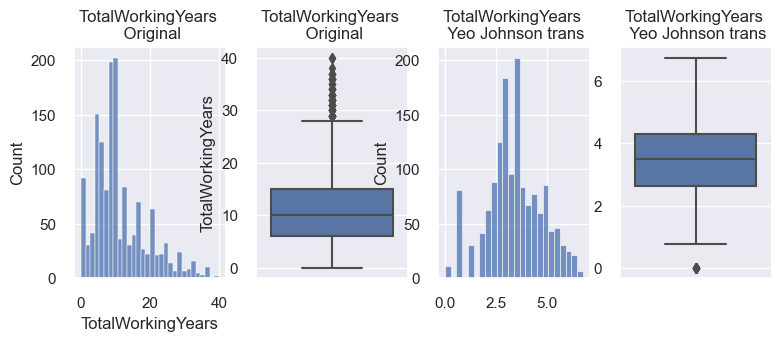

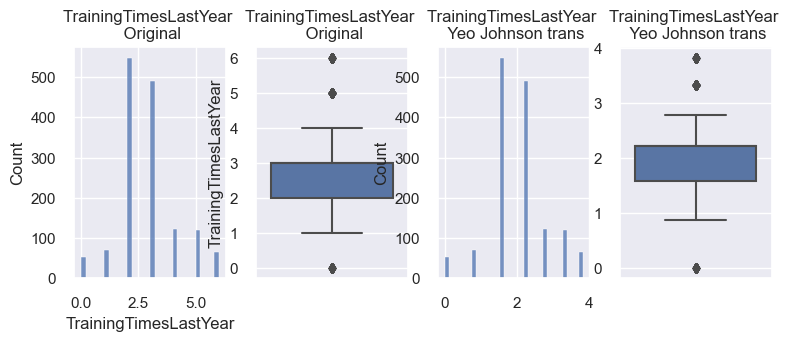

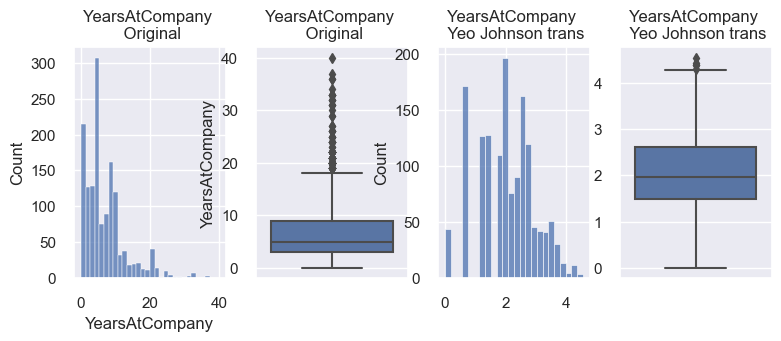

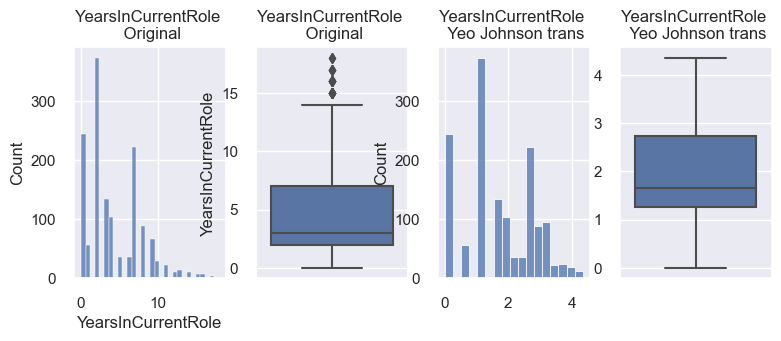

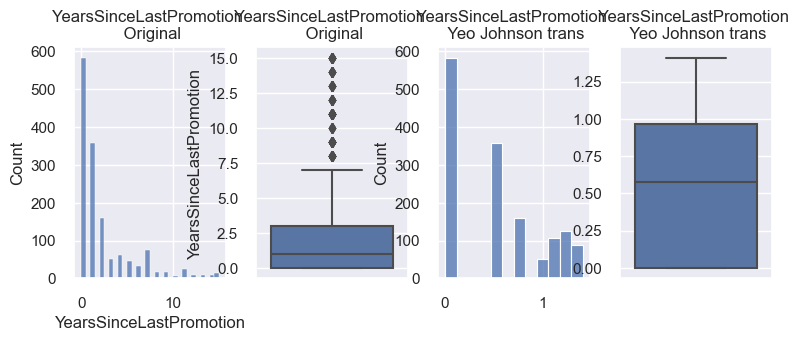

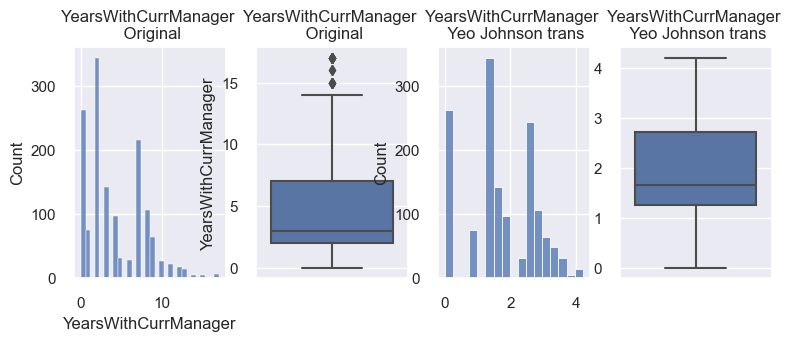

In [461]:
for i in df_quantitative:
    xt, lmbda = stats.yeojohnson(df_quantitative[i])
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(9, 3))
    sns.histplot(ax=ax1, x=df_1[i], bins=30)
    sns.boxplot(ax=ax2, y=df_1[i])
    sns.histplot(ax=ax3, x=xt)
    sns.boxplot(ax=ax4, y=xt)
    ax1.set_title(f"{i} \n Original")
    ax2.set_title(f"{i} \n Original")
    ax3.set_title(f"{i} \n Yeo Johnson trans")
    ax4.set_title(f"{i} \n Yeo Johnson trans")
    plt.show()

In [462]:
quantitative_pre_yeo_johnson = df_quantitative.copy()

# Initialize the PowerTransformer with the "yeo-johnson" method
yeo_johnson_transformer = PowerTransformer(method="yeo-johnson")

# Fit and transform the DataFrame (all columns)
df_transformed = yeo_johnson_transformer.fit_transform(quantitative_pre_yeo_johnson)

# Convert the transformed data back to a DataFrame
quantitative_yeo_johnson = pd.DataFrame(
    df_transformed, columns=quantitative_pre_yeo_johnson.columns
)

In [463]:
quantitative_yeo_johnson.skew()

Age                       -0.01
DailyRate                 -0.20
DistanceFromHome          -0.01
HourlyRate                -0.11
MonthlyIncome              0.03
MonthlyRate               -0.18
NumCompaniesWorked         0.01
PercentSalaryHike          0.12
TotalWorkingYears         -0.01
TrainingTimesLastYear      0.06
YearsAtCompany            -0.01
YearsInCurrentRole        -0.06
YearsSinceLastPromotion    0.21
YearsWithCurrManager      -0.07
dtype: float64

In [464]:
quantitative_yeo_johnson.kurt()

Age                       -0.43
DailyRate                 -1.10
DistanceFromHome          -1.21
HourlyRate                -1.17
MonthlyIncome             -0.68
MonthlyRate               -1.14
NumCompaniesWorked        -0.91
PercentSalaryHike         -1.12
TotalWorkingYears         -0.15
TrainingTimesLastYear      0.65
YearsAtCompany            -0.31
YearsInCurrentRole        -0.88
YearsSinceLastPromotion   -1.36
YearsWithCurrManager      -0.99
dtype: float64

<a class="anchor" id="19th-bullet">

### 2.6.3. Outliers after Yeo-Johnson Transformation

</a>

<a class="anchor" id="20th-bullet">

#### 2.6.3.1. IQR Method after  transformation

</a>

In [465]:
count = 0
for i in quantitative_yeo_johnson:
    Q1 = np.percentile(quantitative_yeo_johnson[i], 25)
    Q3 = np.percentile(quantitative_yeo_johnson[i], 75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = quantitative_yeo_johnson[
        (quantitative_yeo_johnson[i] < lower_bound)
        | (quantitative_yeo_johnson[i] > upper_bound)
    ]
    count += len(outliers)
    if len(outliers) > 0:
        print(f"{i} has {len(outliers)} outliers")
print(f"Total number of outliers - {count}")

TotalWorkingYears has 11 outliers
TrainingTimesLastYear has 238 outliers
YearsAtCompany has 5 outliers
Total number of outliers - 254


<a class="anchor" id="21th-bullet">

#### 2.6.3.2. Z-Score Method after transformation

</a>

In [466]:
total = 0
for i in quantitative_yeo_johnson.columns:
    # Calculate Z-scores
    z_scores = np.abs(stats.zscore(quantitative_yeo_johnson[i]))

    # Define a threshold for outlier detection
    threshold = 3

    # Identify outliers
    outliers = np.where(z_scores > threshold)[0]
    total += len(outliers)

    if len(outliers) > 0:
        print(f"{i} has {len(outliers)} outliers")
print(f"Total number of outliers = {total}")

Total number of outliers = 0


<a class="anchor" id="22th-bullet">

#### 2.6.3.3. Isolation Forest after transformation

</a>

In [467]:
iforest = IsolationForest(
    n_estimators=100, contamination=0.05, max_samples="auto"
)  # n_estimators == number of trees, contamination == proportion of outliers in the dataset (default is 0.03), max_samples == 256


prediction = iforest.fit_predict(quantitative_yeo_johnson)


# Extract normal and outlier data


normal_data = quantitative_yeo_johnson[prediction == 1]


outliers = quantitative_yeo_johnson[prediction == -1]


print("Number of outliers detected: {}".format(len(outliers)))


print("Number of normal samples detected: {}".format(len(normal_data)))

Number of outliers detected: 74
Number of normal samples detected: 1396


<a class="anchor" id="23th-bullet">

## 2.7 Scaling, Dummy and Encoding Functions

</a>

In [468]:
def normalize(df):
    yeo_johnson_transformer = PowerTransformer(method="yeo-johnson")
    df_transformed = yeo_johnson_transformer.fit_transform(df)
    df_yeo_johnson = pd.DataFrame(df_transformed, columns=df.columns, index=df.index)
    return df_yeo_johnson

In [469]:
def scaling(scaler, df):
    if scaler == "MinMaxScaler":
        scaler = MinMaxScaler()
    elif scaler == "StandardScaler":
        scaler = StandardScaler()
    elif scaler == "RobustScaler":
        scaler = RobustScaler()

    df_scaled = df.copy()
    df_scaled[df.columns] = scaler.fit_transform(df_scaled[df.columns])
    return df_scaled

In [470]:
def get_dummies(df):
    categorical_cols = df.select_dtypes(include=["object", "category"]).columns
    df_dummies = pd.get_dummies(df, columns=categorical_cols, dtype="int")
    return df_dummies

In [471]:
def encode(df):
    label = preprocessing.LabelEncoder()
    data_encoded = pd.DataFrame(index=df.index)
    for i in df.columns:
        data_encoded[i] = label.fit_transform(df[i])
    return data_encoded

<a class="anchor" id="24th-bullet">

## 2.8. Multivariate Analysis

</a>

<a class="anchor" id="25th-bullet">

### 2.8.1. Assumptions

</a>

<a class="anchor" id="26th-bullet">

#### 2.8.1.1. Bartlett's Test and KMO

</a>

In [472]:
# Perform Bartlett's Test of Sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(quantitative_yeo_johnson)
print(f"Chi-Square Value: {chi_square_value}")
print(f"P-value: {p_value}")

Chi-Square Value: 7511.021463685353
P-value: 0.0


In [473]:
# Perform Kaiser-Meyer-Olkin (KMO) Test
kmo_per_variable, kmo_total = calculate_kmo(quantitative_yeo_johnson)
print(f"KMO per Variable: {kmo_per_variable}")
print(f"KMO Total: {kmo_total}")

KMO per Variable: [0.78727733 0.41734173 0.49959683 0.58311934 0.83372921 0.46838558
 0.59847924 0.48603402 0.74123864 0.55911849 0.76286186 0.8517867
 0.95649813 0.86591249]
KMO Total: 0.8044573214938838


<a class="anchor" id="27th-bullet">

### 2.8.2. Principal Components Analysis

</a>

In [474]:
# Scaling
X_std = scaling("StandardScaler", quantitative_yeo_johnson)

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(X_std)

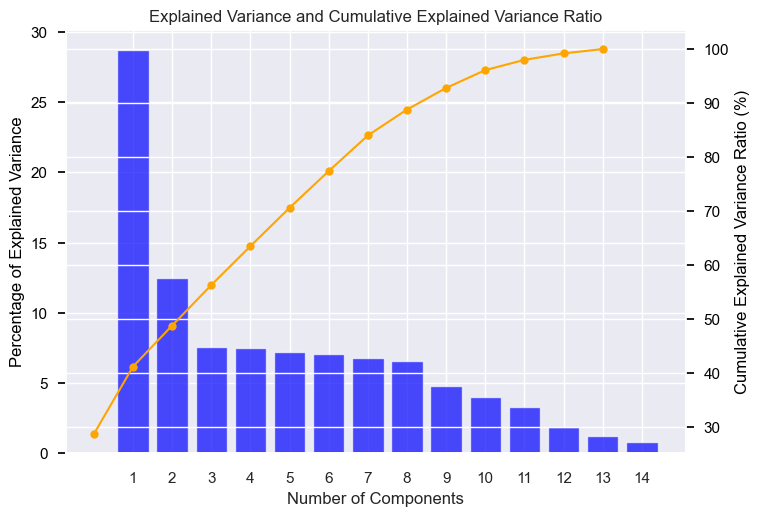

# Components  Explained Variance Ratio  Cumulative Variance Ratio
0              1                     28.69                      28.69
1              2                     12.45                      41.14
2              3                      7.59                      48.73
3              4                      7.50                      56.22
4              5                      7.22                      63.44
5              6                      7.07                      70.51
6              7                      6.82                      77.33
7              8                      6.64                      83.98
8              9                      4.84                      88.81
9             10                      4.02                      92.83
10            11                      3.28                      96.12
11            12                      1.89                      98.01
12            13                      1.23                      99.24
13            14                      0.76                     100.00

In [475]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
cumulative_var_ratio = np.cumsum(per_var)

fig, ax1 = plt.subplots()


# Bar graph on the first y-axis

ax1.bar(
    x=range(1, len(per_var) + 1),
    height=per_var,
    tick_label=range(1, len(per_var) + 1),
    color="blue",
    alpha=0.7,
)


ax1.set_xlabel("Number of Components")


ax1.set_ylabel("Percentage of Explained Variance", color="black")


ax1.tick_params("y", colors="black")


ax1.set_title("Explained Variance and Cumulative Explained Variance Ratio")


# Line graph on the second y-axis


ax2 = ax1.twinx()


ax2.plot(
    cumulative_var_ratio,
    color="orange",
    marker="o",
    linestyle="-",
)


ax2.set_ylabel("Cumulative Explained Variance Ratio (%)", color="black")


ax2.tick_params("y", colors="black")


plt.show()


pd.DataFrame(
    {
        "# Components": range(1, len(pca.explained_variance_ratio_) + 1),
        "Explained Variance Ratio": pca.explained_variance_ratio_ * 100,
        "Cumulative Variance Ratio": np.cumsum(pca.explained_variance_ratio_ * 100),
    }
)

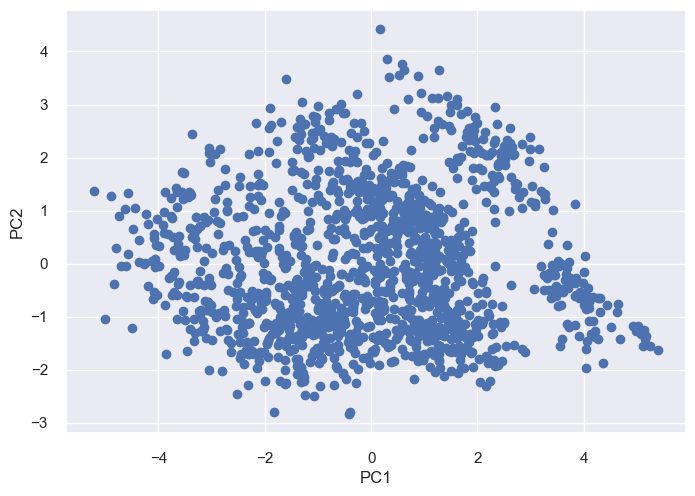

In [476]:
plot = plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

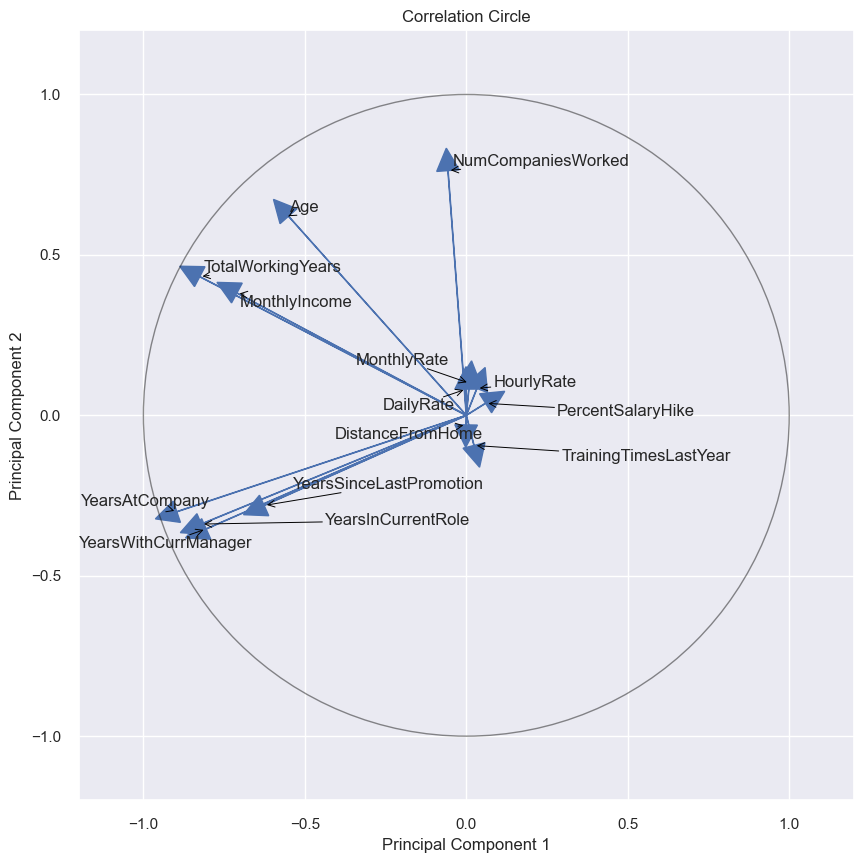

In [477]:
# Calculate the correlation circle
correlation_circle = np.corrcoef(X_std, pca_result[:, :2], rowvar=False)[
    : df_quantitative.shape[1], -2:
]

# Plotting
fig, ax = plt.subplots(figsize=(10, 10))

for i, (x, y) in enumerate(correlation_circle):
    ax.arrow(0, 0, x, y, head_width=0.07, head_length=0.07, fc="b", ec="b")

# Draw the unit circle
circle = Circle((0, 0), 1, facecolor="none", edgecolor="k", linewidth=1, alpha=0.5)
ax.add_patch(circle)

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_title("Correlation Circle")

# Use adjust_text to avoid overlapping labels with additional parameters
texts = [
    ax.text(x, y, label)
    for label, (x, y) in zip(df_quantitative.columns, correlation_circle)
]
adjust_text(
    texts,
    arrowprops=dict(arrowstyle="->", lw=0.7, color="black"),
    expand_text=(1.5, 1.5),
)


plt.show()

<a class="anchor" id="28th-bullet">

#### 2.8.2.1. Multiple Correspondence Analysis

</a>

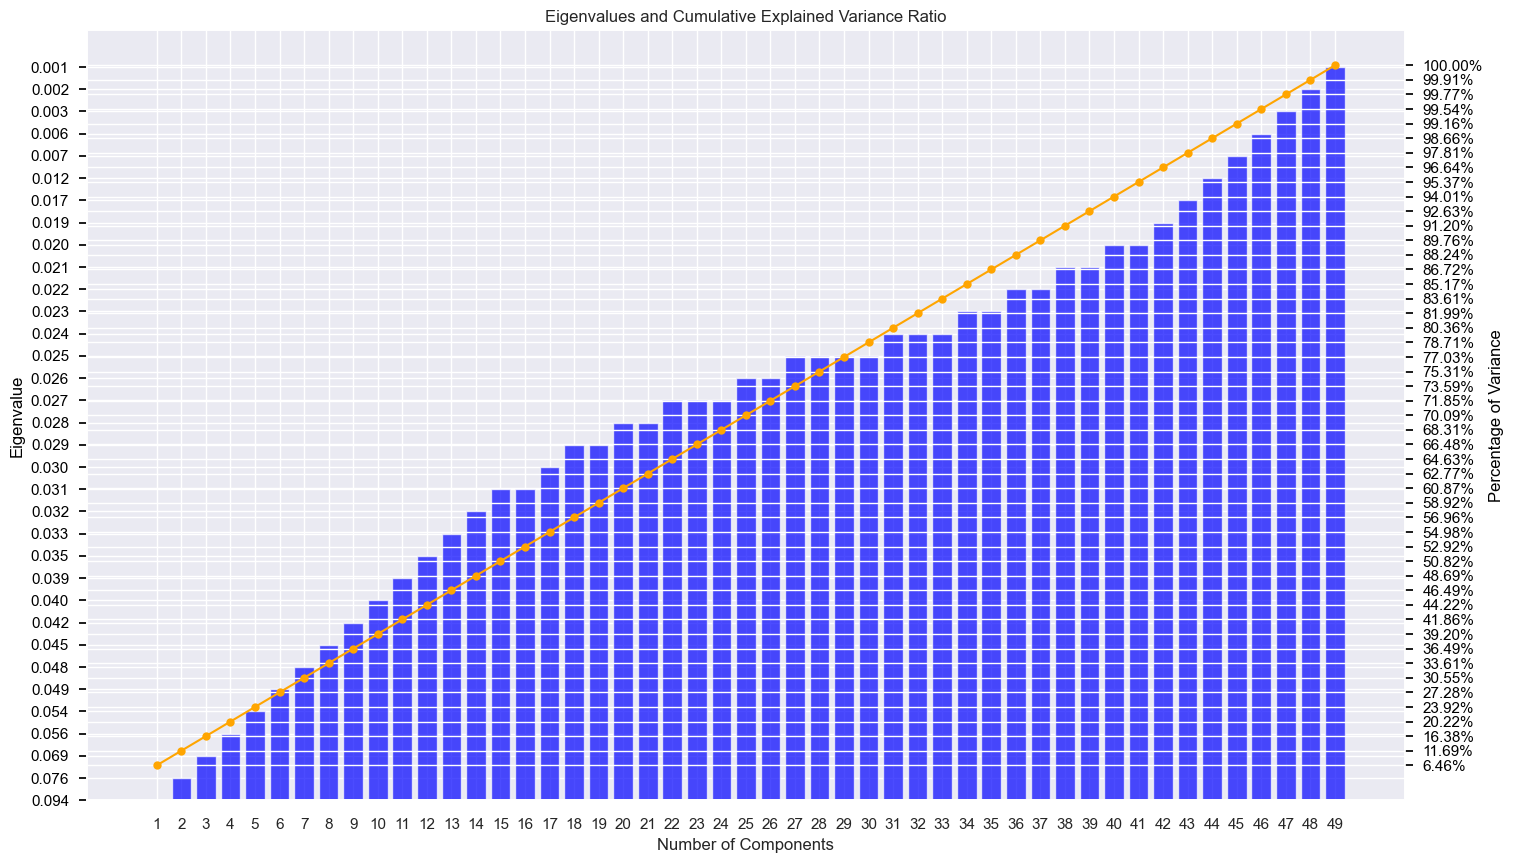

In [478]:
mca = prince.MCA(n_components=49, random_state=99)
mca = mca.fit(get_dummies(df_categorical))

mca_summary = mca.eigenvalues_summary


# Bar graph on the first y-axis
fig, ax1 = plt.subplots(figsize=(17, 10))

ax1.bar(
    x=range(1, len(mca_summary["eigenvalue"]) + 1),
    height=mca_summary["eigenvalue"],
    tick_label=range(1, len(mca_summary["eigenvalue"]) + 1),
    color="blue",
    alpha=0.7,
)
ax1.set_xlabel("Number of Components")
ax1.set_ylabel("Eigenvalue", color="black")
ax1.tick_params("y", colors="black")
ax1.set_title("Eigenvalues and Cumulative Explained Variance Ratio")

# Line graph on the second y-axis
ax2 = ax1.twinx()
ax2.plot(
    range(1, len(mca_summary["% of variance (cumulative)"]) + 1),
    mca_summary["% of variance (cumulative)"],
    color="orange",
    marker="o",
    linestyle="-",
)
ax2.set_ylabel("Percentage of Variance", color="black")
ax2.tick_params("y", colors="black")

plt.show()

In [479]:
mca = prince.MCA(n_components=2, random_state=99)
mca = mca.fit(get_dummies(df_categorical))

mca.plot(
    get_dummies(df_categorical),
    x_component=1,
    y_component=0,
    show_column_markers=True,
    show_row_markers=False,
    show_column_labels=False,
    show_row_labels=False,
)

alt.LayerChart(...)

<a class="anchor" id="29th-bullet">

## 2.9. Correlations/Associations

</a>

<a class="anchor" id="30th-bullet">

### 2.9.1. Quantitative

</a>

<Axes: >

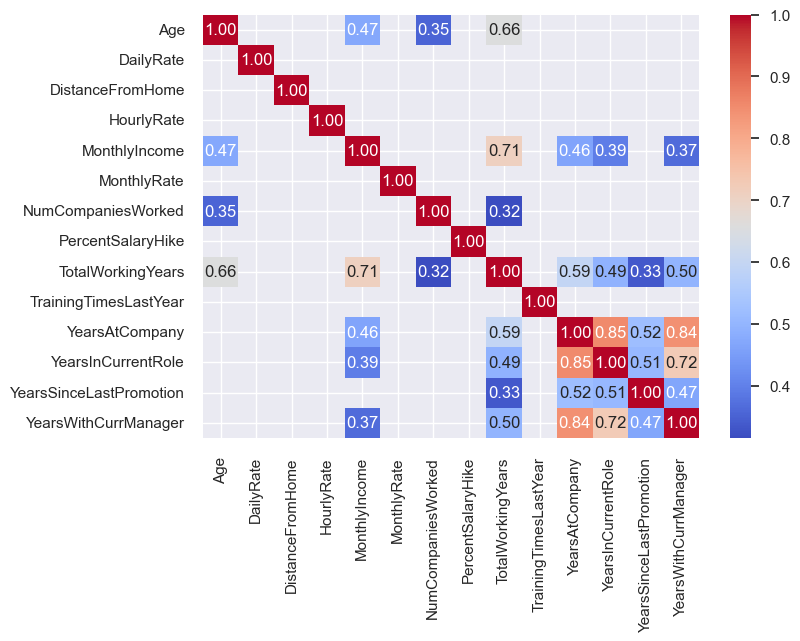

In [480]:
data = df_quantitative.corr(method="spearman")
matrix = data[(data >= 0.3) | (data <= -0.3)]
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f")

##### Meaningful Correlations (>0.3):

| Age                 | Monthly Income                      | # Companies Worked  | Total working years        | Years at company              | Years in current role         | Years since last promotion    |
| ------------------- | ----------------------------------- | ------------------- | -------------------------- | ----------------------------- | ----------------------------- | ----------------------------- |
| Monthly income      | Total working years                 | Total working years | Years at company           | Years in current role         | Years since last promotion    | Years with<br>current manager |
| # Companies worked  | Years at company                    |                     | Years in the current role  | Years since last promotion    | Years with<br>current manager |                               |
| Total working years | Years in current role               |                     | Years since last promotion | Years with<br>current manager |                               |                               |
|                     | Years with the <br> current manager |                     | Years with current manager |                               |                               |                               |


<a class="anchor" id="31th-bullet">

### 2.9.2. Cramér's V for Categorical

</a>

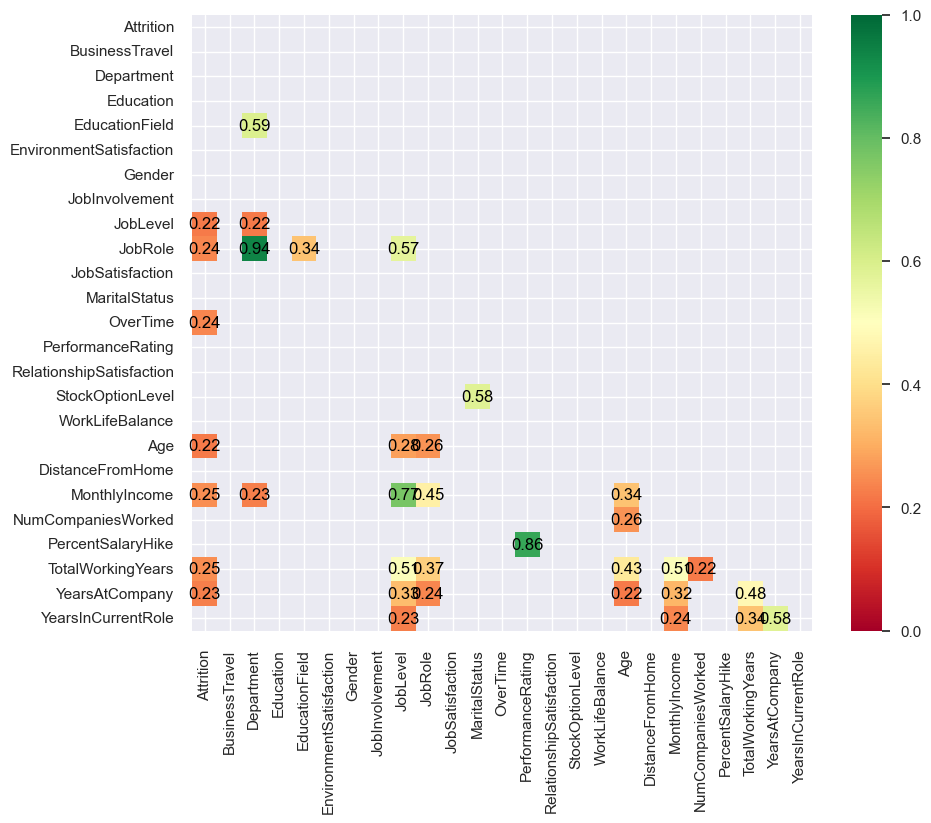

In [481]:
# Label encoding

df_binned = df[
    [
        "Age",
        "DistanceFromHome",
        "MonthlyIncome",
        "NumCompaniesWorked",
        "PercentSalaryHike",
        "TotalWorkingYears",
        "YearsAtCompany",
        "YearsInCurrentRole",
    ]
].copy()
df_cramer = df_categorical.copy()
df_cramer = df_cramer.join(df_binned)

data_encoded = encode(df_cramer)


# Building of the Cramer's V function


def cramers_V(var1, var2):
    crosstab = np.array(
        pd.crosstab(var1, var2, rownames=None, colnames=None)
    )  # Cross table building

    stat = chi2_contingency(crosstab)[
        0
    ]  # Keeping of the test statistic of the Chi2 test

    obs = np.sum(crosstab)  # Number of observations
    mini = (
        min(crosstab.shape) - 1
    )  # Take the minimum value between the columns and the rows of the cross table

    return np.sqrt(stat / (obs * mini))


# Building of the matrix


rows = []


for var1 in data_encoded:
    col = []

    for var2 in data_encoded:
        cramers = cramers_V(data_encoded[var1], data_encoded[var2])  # Cramer's V test

        col.append(round(cramers, 2))  # Keeping of the rounded value of the Cramer's V

    rows.append(col)


cramers_results = np.array(rows)


df_cramer_results = pd.DataFrame(
    cramers_results, columns=data_encoded.columns, index=data_encoded.columns
)


# Add a heatmap to the matrix


df_cramer_results = df_cramer_results[df_cramer_results > 0.2]


mask = np.zeros_like(df_cramer_results, dtype=bool)


mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10, 8))
with sns.axes_style():
    ax = sns.heatmap(
        df_cramer_results,
        mask=mask,
        vmin=0,
        vmax=1,
        annot=True,
        annot_kws={"color": "black"},
        cmap="RdYlGn",
    )


plt.show()

##### Meaningful Associations (>0.2):

| Attrition | Department      | Education Field | Job level | Marital Status     | Age | MonthlyIncome | NumCompaniesWorked | TotalWorkingYears | YearsAtCompany | 
| --------- | --------------- | --------------- | --------- | ------------------ | --- | ------------- | ------------------ | ----------------- | -------------- |
| Overtime  | Education Field | Job role        | Job role  | Stock option Level | YearsAtCompany | YearsInCurrentRole | TotalWorkingYears | YearsInCurrentRole | YearsInCurrentRole
| Job role  | Job level       |                 | YearsInCurrentRole |           | TotalWorkingYears | YearsAtCompany |     | YearsAtCompany |
| Job level | Job role        |                 | YearsAtCompany |               | NumCompaniesWorked | TotalWorkingYears   | 
| Age       | MonthlyIncome   |                 | TotalWorkingYears |            | MonthlyIncome | 
| MonthlyIncome |             |                 | MonthlyIncome |                | 
| TotalWorkingYears |         |                 | Age       |
| YearsAtCompany |            |                 | 


In [482]:
def cross_tab(var1, var2):
    return pd.crosstab(index=df_categorical[var2], columns=df_categorical[var1])


print(cross_tab("Attrition", "OverTime"))
print("--------------------------------------------")
print(cross_tab("Attrition", "JobRole"))
print("--------------------------------------------")
print(cross_tab("Attrition", "JobLevel"))
print("--------------------------------------------")
print(cross_tab("MaritalStatus", "StockOptionLevel"))

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127
--------------------------------------------
Attrition                   No  Yes
JobRole                            
Healthcare Representative  122    9
Human Resources             40   12
Laboratory Technician      197   62
Manager                     97    5
Manufacturing Director     135   10
Research Director           78    2
Research Scientist         245   47
Sales Executive            269   57
Sales Representative        50   33
--------------------------------------------
Attrition   No  Yes
JobLevel           
1          400  143
2          482   52
3          186   32
4          101    5
5           64    5
--------------------------------------------
MaritalStatus     Divorced  Married  Single
StockOptionLevel                           
0                        8      153     470
1                      195      401       0
2                       75       83       0
3                       49   

<a class="anchor" id="32th-bullet">

# 3.0. Feature Selection

</a>

<a class="anchor" id="33th-bullet">

## 3.1. Categorical Features

</a>

<a class="anchor" id="34th-bullet">

### 3.1.1. Chi-Square

</a>

In [483]:
X = df_categorical.drop("Attrition", axis=1).copy()
y = df_categorical["Attrition"].copy()
skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

In [484]:
not_important = []


def apply_chisquare(X, y, var, alpha=0.05):
    dfObserved = pd.crosstab(y, X)

    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)

    dfExpected = pd.DataFrame(
        expected, columns=dfObserved.columns, index=dfObserved.index
    )

    if p < alpha:
        result = "{0} is IMPORTANT for Prediction".format(var)

    else:
        result = "{0} is NOT an important predictor. (Discard {0} from model)".format(
            var
        )

        not_important.append(var)

    print(result)


def select_best_cat_features(X, y):
    count = 1

    ############################################## APPLY SKF ######################################################

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]

        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        #################################### SELECT FEATURES WITH CHI-SQUARE #######################################

        print(
            "_________________________________________________________________________________________________\n"
        )

        print(
            "                                     SPLIT "
            + str(count)
            + "                                    "
        )

        print(
            "_________________________________________________________________________________________________"
        )

        # check which features to use using chi-square

        X_train_cat = X_train.copy()

        for var in X_train_cat:
            apply_chisquare(X_train_cat[var], y_train, var)

        count += 1

In [485]:
select_best_cat_features(X, y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
BusinessTravel is IMPORTANT for Prediction
Department is IMPORTANT for Prediction
Education is NOT an important predictor. (Discard Education from model)
EducationField is IMPORTANT for Prediction
EnvironmentSatisfaction is IMPORTANT for Prediction
Gender is NOT an important predictor. (Discard Gender from model)
JobInvolvement is IMPORTANT for Prediction
JobLevel is IMPORTANT for Prediction
JobRole is IMPORTANT for Prediction
JobSatisfaction is IMPORTANT for Prediction
MaritalStatus is IMPORTANT for Prediction
OverTime is IMPORTANT for Prediction
PerformanceRating is NOT an important predictor. (Discard PerformanceRating from model)
RelationshipSatisfaction is NOT an important predictor. (Discard RelationshipSat

EducationField is NOT an important predictor. (Discard EducationField from model)
EnvironmentSatisfaction is IMPORTANT for Prediction
Gender is NOT an important predictor. (Discard Gender from model)
JobInvolvement is IMPORTANT for Prediction
JobLevel is IMPORTANT for Prediction
JobRole is IMPORTANT for Prediction
JobSatisfaction is IMPORTANT for Prediction
MaritalStatus is IMPORTANT for Prediction
OverTime is IMPORTANT for Prediction
PerformanceRating is NOT an important predictor. (Discard PerformanceRating from model)
RelationshipSatisfaction is NOT an important predictor. (Discard RelationshipSatisfaction from model)
StockOptionLevel is IMPORTANT for Prediction
WorkLifeBalance is IMPORTANT for Prediction
_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________
Busi

Conclusion : Education, Gender, Performance Rating and Relationship Satisfaction are not important predictors.<br> Note: Education Field appears as not important on a single split.


<a class="anchor" id="35th-bullet">

## 3.2. Numerical Features

</a>

In [486]:
X = scaling("StandardScaler", df_quantitative).copy()
skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

<a class="anchor" id="36th-bullet">

### 3.2.1. Variance

</a>

In [487]:
def apply_variance(X_train):
    print(X_train.var())


def select_features_variance(X):
    count = 1
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print(
            "_________________________________________________________________________________________________\n"
        )
        print(
            "                                     SPLIT "
            + str(count)
            + "                                    "
        )
        print(
            "_________________________________________________________________________________________________"
        )

        # check which features to use using variance
        apply_variance(X_train)

        count += 1

In [488]:
select_features_variance(X)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Age                       1.02
DailyRate                 1.00
DistanceFromHome          0.99
HourlyRate                0.99
MonthlyIncome             1.04
MonthlyRate               1.00
NumCompaniesWorked        0.99
PercentSalaryHike         0.99
TotalWorkingYears         1.04
TrainingTimesLastYear     1.02
YearsAtCompany            1.04
YearsInCurrentRole        1.02
YearsSinceLastPromotion   0.97
YearsWithCurrManager      1.02
dtype: float64
_________________________________________________________________________________________________

                                     SPLIT 2                                    
_____________________________________________________________________________________________

Conclusion : Remove none


<a class="anchor" id="37th-bullet">

### 3.2.2. Spearman Correlation

</a>

In [489]:
def cor_heatmap(cor):
    plt.figure(figsize=(9, 6))
    sns.heatmap(data=cor, annot=True, cmap=plt.cm.Reds, fmt=".1")
    plt.show()


def apply_correlation(X_train):
    correlation_data = X_train
    matrix = correlation_data.corr(method="spearman")
    matrix = matrix[(matrix >= 0.8) | (matrix <= -0.8)]
    cor_heatmap(matrix)


def redundant_features(X):
    count = 1
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print(
            "_________________________________________________________________________________________________\n"
        )
        print(
            "                                     SPLIT "
            + str(count)
            + "                                    "
        )
        print(
            "_________________________________________________________________________________________________"
        )

        # check which features to use using spearman correlation
        apply_correlation(X_train)

        count += 1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


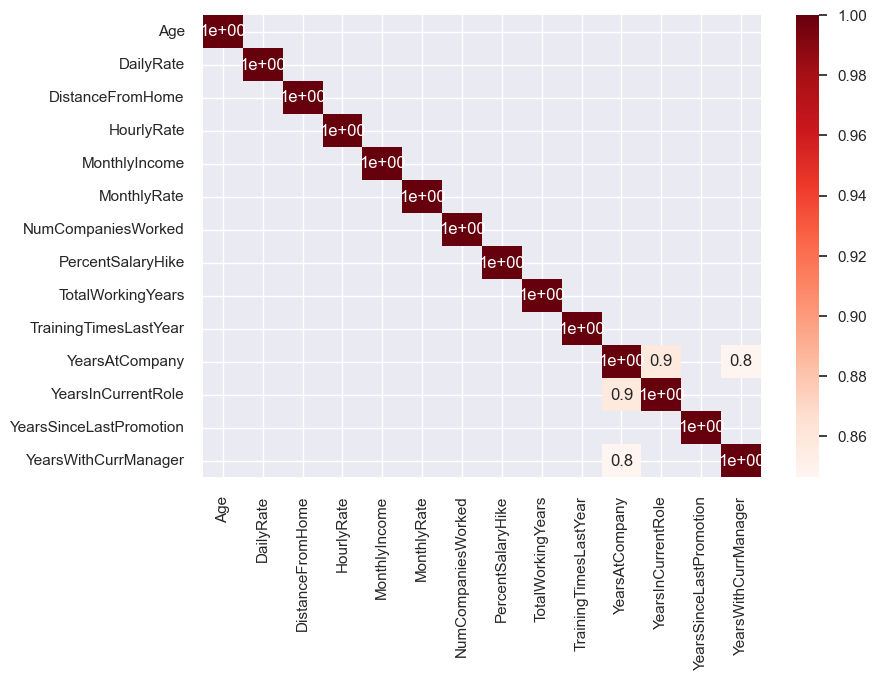

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


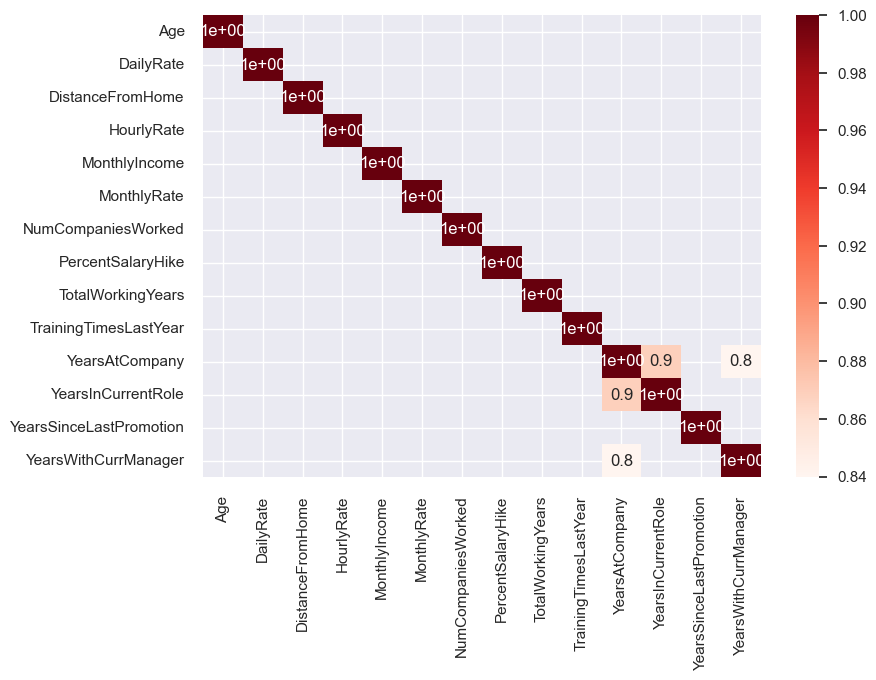

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


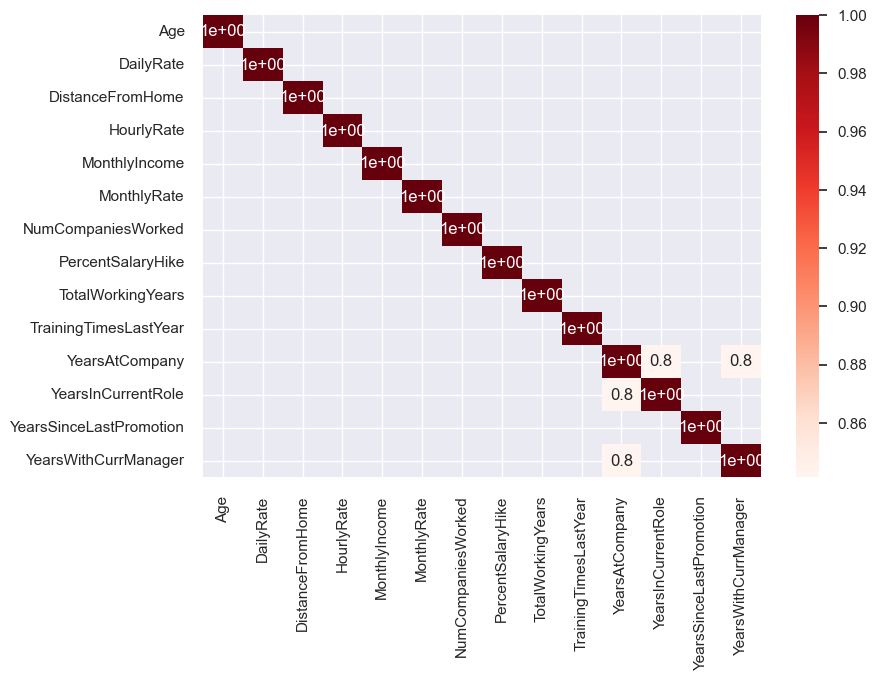

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


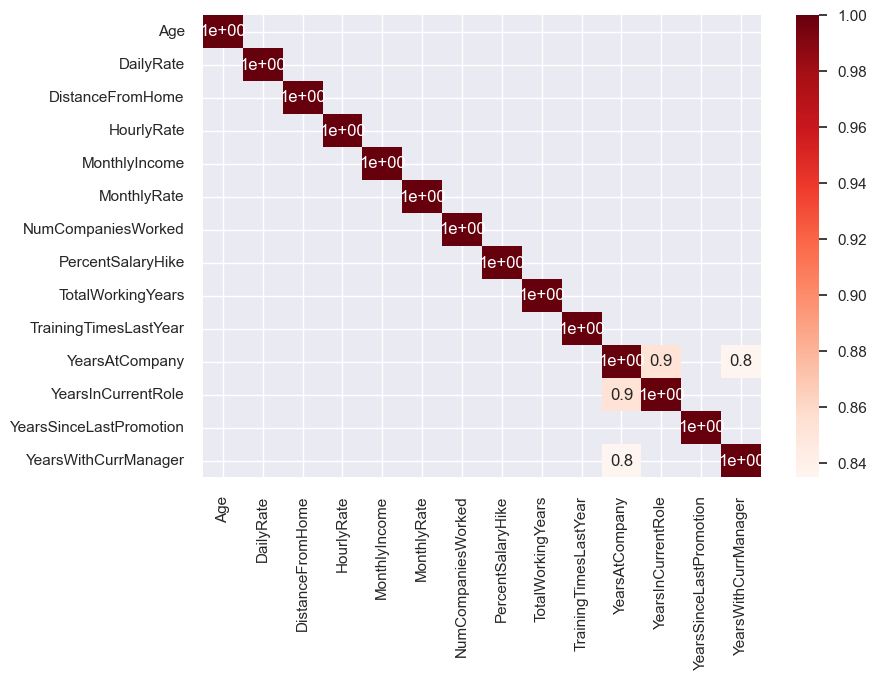

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


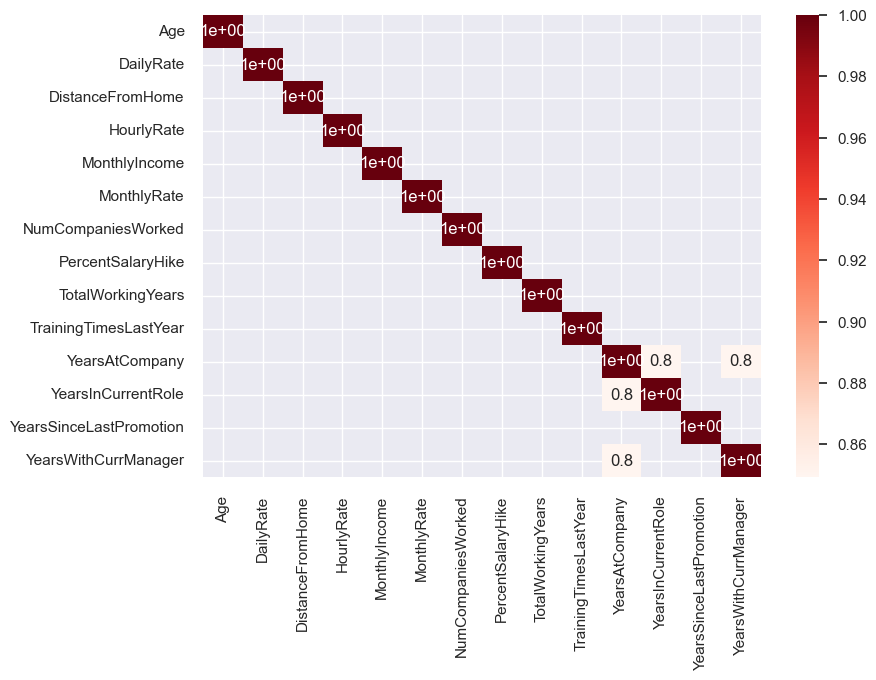

In [490]:
redundant_features(X)

Conclusion : Possible removal - Years at company


<a class="anchor" id="38th-bullet">

### 3.2.3. Decision Tree

</a>

In [491]:
# Data Prep
df_dt = df_categorical[
    [
        "Education",
        "EnvironmentSatisfaction",
        "BusinessTravel",
        "Gender",
        "JobInvolvement",
        "JobLevel",
        "OverTime",
        "PerformanceRating",
        "RelationshipSatisfaction",
        "WorkLifeBalance",
        "JobSatisfaction",
        "Attrition",
    ]
].copy()

df_dt = encode(df_dt)


df_dt = df_dt.join(scaling("StandardScaler", df_quantitative))

y = df_dt["Attrition"].copy()
X = df_dt.drop("Attrition", axis=1).copy()
skf = StratifiedKFold(n_splits=5, random_state=99, shuffle=True)

In [492]:
def plot_importance(variables, name):
    imp_features = variables.sort_values()
    plt.figure(figsize=(4, 5))
    imp_features.plot(kind="barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()


def apply_dt(X_train, y_train):
    dt = DecisionTreeClassifier(random_state=99).fit(X_train, y_train)
    feature_importances = pd.Series(dt.feature_importances_, index=X_train.columns)
    plot_importance(feature_importances, "DT")


def select_best_features_dt(X, y):
    count = 1
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print(
            "_________________________________________________________________________________________________\n"
        )
        print(
            "                                     SPLIT "
            + str(count)
            + "                                    "
        )
        print(
            "_________________________________________________________________________________________________"
        )
        apply_dt(X_train, y_train)

        count += 1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


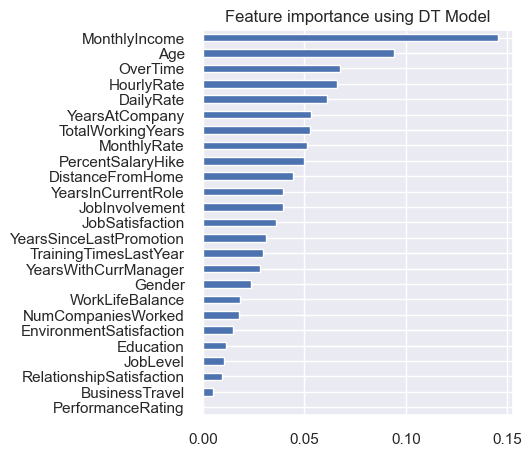

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


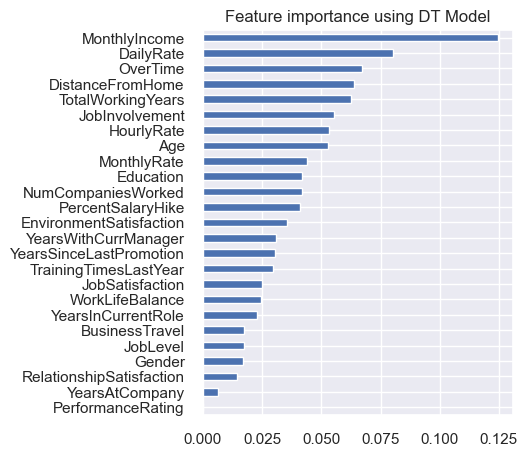

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


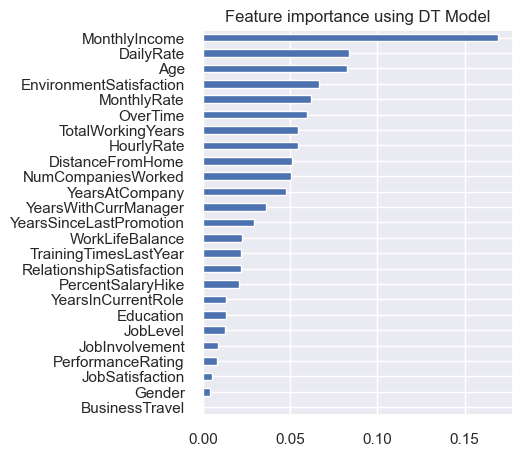

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


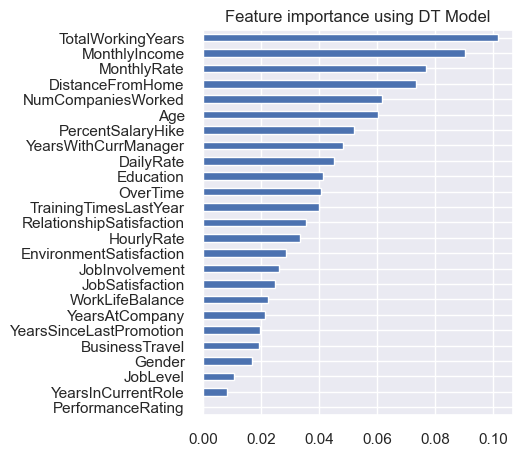

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


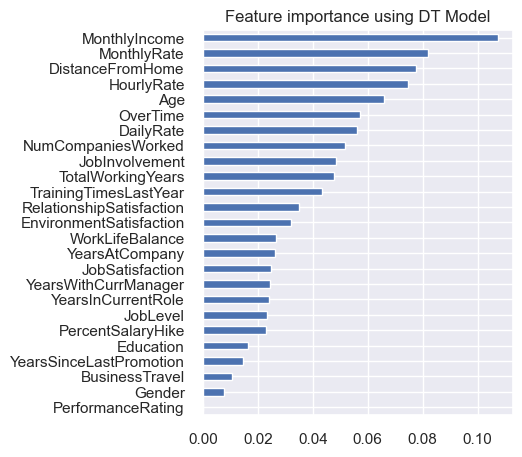

In [493]:
select_best_features_dt(X, y)

<a class="anchor" id="39th-bullet">

### 3.2.4. RFE

</a>

In [494]:
def apply_rfe(X_train, y_train, n_features_to_select=5):
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=n_features_to_select)
    rfe.fit_transform(X=X_train, y=y_train)
    selected_features = pd.Series(rfe.support_, index=X_train.columns)
    print(selected_features)


def select_best_features_rfe(X, y):
    count = 1
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print(
            "_________________________________________________________________________________________________\n"
        )
        print(
            "                                     SPLIT "
            + str(count)
            + "                                    "
        )
        print(
            "_________________________________________________________________________________________________"
        )
        apply_rfe(X_train, y_train)

        count += 1

In [495]:
select_best_features_rfe(X, y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Education                   False
EnvironmentSatisfaction     False
BusinessTravel              False
Gender                      False
JobInvolvement               True
JobLevel                    False
OverTime                     True
PerformanceRating           False
RelationshipSatisfaction    False
WorkLifeBalance             False
JobSatisfaction             False
Age                         False
DailyRate                   False
DistanceFromHome            False
HourlyRate                  False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
TotalWorkingYears            True
TrainingTimesLastYear       False
YearsAtC

<a class="anchor" id="40th-bullet">

### 3.2.5 Lasso

</a>

In [496]:
df_lasso = df_dt.copy()
df_lasso.drop(["Gender", "OverTime", "Attrition"], axis=1, inplace=True)
df_lasso = scaling("StandardScaler", df_lasso)

X = df_lasso
y = df_dt["Attrition"].copy()

In [497]:
def apply_lasso(X_train, y_train):
    lasso = LassoCV().fit(X_train, y_train)
    coef = pd.Series(lasso.coef_, index=X_train.columns)
    plot_importance(coef, "Lasso")


def select_best_features_lasso(X, y):
    count = 1
    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print(
            "_________________________________________________________________________________________________\n"
        )
        print(
            "                                     SPLIT "
            + str(count)
            + "                                    "
        )
        print(
            "_________________________________________________________________________________________________"
        )
        apply_lasso(X_train, y_train)

        count += 1

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________


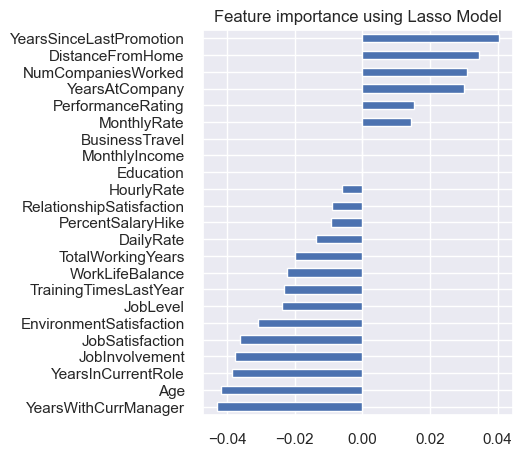

_________________________________________________________________________________________________

                                     SPLIT 2                                    
_________________________________________________________________________________________________


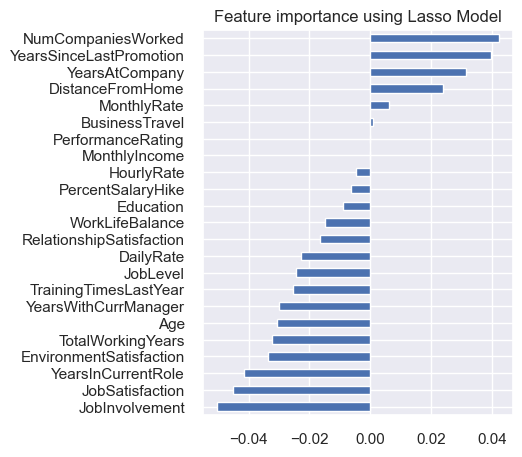

_________________________________________________________________________________________________

                                     SPLIT 3                                    
_________________________________________________________________________________________________


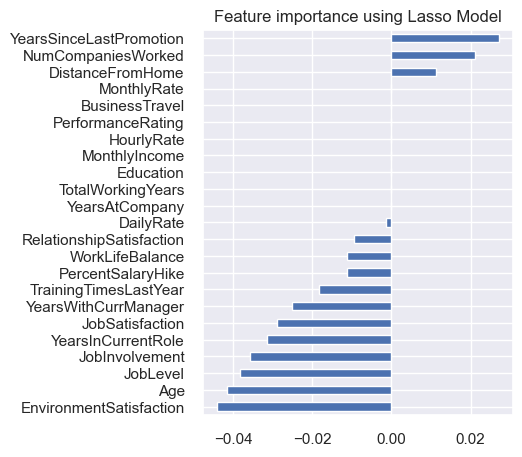

_________________________________________________________________________________________________

                                     SPLIT 4                                    
_________________________________________________________________________________________________


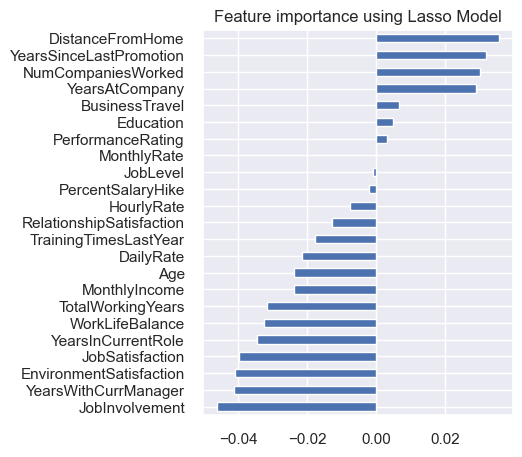

_________________________________________________________________________________________________

                                     SPLIT 5                                    
_________________________________________________________________________________________________


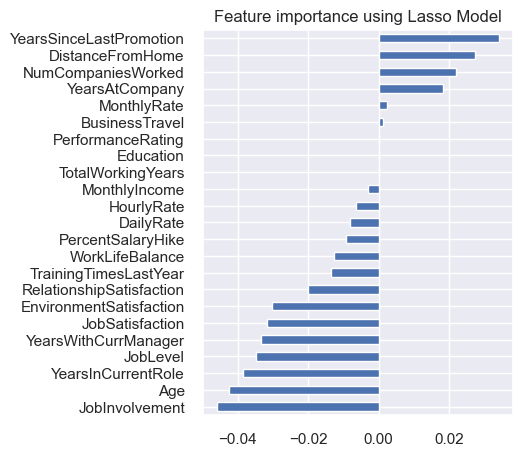

In [498]:
select_best_features_lasso(X, y)

<a class="anchor" id="after_1">

### 3.2.6 Ridge

</a>

In [499]:
def apply_ridge(X_train, y_train):
    ridge = RidgeCV().fit(X_train, y_train)
    coef = pd.Series(ridge.coef_, index=X_train.columns)
    sorted_coef = coef.sort_values(ascending=False)
    print("Ridge Coefficients:\n", sorted_coef)


def select_best_features_ridge(X, y):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    count = 1

    for train_index, val_index in skf.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        ######################################### SELECT FEATURES #################################################
        print(
            "_________________________________________________________________________________________________\n"
        )
        print(
            "                                     SPLIT "
            + str(count)
            + "                                    "
        )
        print(
            "_________________________________________________________________________________________________"
        )
        apply_ridge(X_train, y_train)

        count += 1

In [500]:
select_best_features_ridge(X, y)

_________________________________________________________________________________________________

                                     SPLIT 1                                    
_________________________________________________________________________________________________
Ridge Coefficients:
 YearsSinceLastPromotion     0.05
YearsAtCompany              0.04
NumCompaniesWorked          0.03
DistanceFromHome            0.03
PerformanceRating           0.01
MonthlyRate                 0.01
BusinessTravel             -0.00
HourlyRate                 -0.00
Education                  -0.00
PercentSalaryHike          -0.00
MonthlyIncome              -0.01
RelationshipSatisfaction   -0.02
JobLevel                   -0.02
DailyRate                  -0.02
TrainingTimesLastYear      -0.03
WorkLifeBalance            -0.03
TotalWorkingYears          -0.03
Age                        -0.03
EnvironmentSatisfaction    -0.04
YearsInCurrentRole         -0.04
JobSatisfaction            -0.04
JobInvol

<a class="anchor" id="41th-bullet">

## 3.3. Results Aggregation

</a>

| Variable                 | Type        | X-Square | Variance | Correlation                 | DT    | RFE    | Lasso  | Ridge |Desicion|
| ------------------------ | ----------- | -------- | -------- | --------------------------- | ----- | ------ | ------ | -------- | -------- |
| Age                      | numeric     | -        | ✓        | ✓                           | 5 YES | 0 YES  | Strong Negative | 5 YES         |✓       |
| DailyRate                | numeric     | -        | ✓        | ✓                           | 5 YES | 0 YES  | Medium Negative |  2 YES        |x   |
| DistanceFromHome         | numeric     | -        | ✓        | ✓                           | 2 YES | 0 YES  | Strong Positive |  5 YES        |✓   |
| HourlyRate               | numeric     | -        | ✓        | ✓                           | 4 YES | 0 YES  | Around 0 |   2 YES       |x   |
| PercentSalaryHike        | numeric     | -        | ✓        | ✓                           | 0 YES | 0 YES  | Weak Negative |  2 YES        |x   |
| TotalWorkingYears        | numeric     | -        | ✓        | ✓                           | 4 YES | 3 YES  | Medium Negative |   4 YES       |✓   |
| TrainingTimesLastYear    | numeric     | -        | ✓        | ✓                           | 0 YES | 0 YES  | Weak Negative |     5 YES     |x   |
| YearsAtCompany           | numeric     | -        | ✓        | ✓                           | 0 YES | 0 YES  | Strong Positive |5 YES         |Maybe   |
| YearsInCurrentRole       | numeric     | -        | ✓        | x (0.9 vs Years at Company) | 0 YES | 4 YES  | Strong Negative | 5 YES        |x   |
| YearsSinceLastPromotion  | numeric     | -        | ✓        | ✓                           | 0 YES | 0 YES  | Strong Positive | 5 YES         |x   |
| YearsWithCurrManager     | numeric     | -        | ✓        | x (0.8 vs Years at Company) | 1 YES | 0 YES  | Strong Negative |  5 YES        |x   |
| MonthlyIncome            | numeric     | -        | ✓        | ✓                           | 5 YES | 1 YES  | Around 0 | 1 YES         |✓   |
| MonthlyRate              | numeric     | -        | ✓        | ✓                           | 5 YES | 0 YES  | Around 0 |  0 YES        |x   |
| NumCompaniesWorked       | numeric     | -        | ✓        | ✓                           | 1 YES | 0 YES  | Strong Positive | 5 YES         |✓   |
| Department               | categorical | ✓        | -        | -                           | -     | -      | -      | -         |   |
| EducationField           | categorical | ✓        | -        | -                           | -     | -      | -      |   -       |   |
| JobRole                  | categorical | ✓        | -        | -                           | -     | -      | -      |  -        |   |   
| MaritalStatus            | categorical | ✓        | -        | -                           | -     | -      | -      |     -     |   |
| StockOptionLevel         | categorical | ✓        | -        | -                           | -     | -      | -      |   -       |   |
| OverTime                 | binary      | ✓        | -        | -                           | 4 YES | 5 YES  | -      |  -        |✓   |
| Gender                   | binary      | x        | -        | -                           | 0 YES | 0 YES  | -      |   -       |x   |
| Education                | ordinal     | x        | -        | -                           | 0 YES     | 0 YES      | Around 0      |  0 YES        |  x |
| EnvironmentSatisfaction  | ordinal     | ✓        | -        | -                           | 1 YES     | 0 YES     | Medium/Strong Negative       |  5 YES        |  Maybe |
| JobInvolvement           | ordinal     | ✓        | -        | -                           | 1 YES | 5 YES  | Strong Negative | 5 YES         |✓   |
| JobLevel                 | ordinal     | ✓        | -        | -                           | 0 YES | 1 YES  | Medium/Strong Negative |  5 YES        |Maybe   |
| JobSatisfaction          | ordinal     | ✓        | -        | -                           | 0 YES      | 0 YES      | Medium/Strong Negative       | 5 YES         |Maybe   |
| PerformanceRating        | ordinal     | ✓        | -        | -                           | 0 YES | 0 YES  | Weak Positive |     1 YES     |x   |
| RelationshipSatisfaction | ordinal     | x        | -        | -                           | 0 YES | 0 YES  | Weak Negative |2 YES          | x  |
| WorkLifeBalance          | ordinal     | ✓        | -        | -                           | 0 YES | 1 YES  | Weak Negative | 5  YES       | x  |
| BusinessTravel           | ordinal     | ✓        | -        | -                           | 0 YES | 5 YES  | Strong Positive |  5 YES        | ✓  |


<a class="anchor" id="42th-bullet">

# 4.0. Modeling

</a>

<a class="anchor" id="43th-bullet">

## 4.1. Data Preparation

</a>

In [501]:
model_quantitative = df_quantitative[
    [
        "Age",
        "DistanceFromHome",
        "NumCompaniesWorked",
        "TotalWorkingYears",
        "YearsInCurrentRole",
        "YearsSinceLastPromotion",
    ]
]


model_binary_ordinal = df_categorical[
    [
        "OverTime",
        "JobInvolvement",
        "BusinessTravel",
        "EnvironmentSatisfaction",
        "JobSatisfaction",
        "Attrition",
        "RelationshipSatisfaction",
        "WorkLifeBalance",
    ]
]

model_binary_ordinal["BusinessTravel"] = model_binary_ordinal["BusinessTravel"].map(
    {"Non-Travel": 1, "Travel_Rarely": 2, "Travel_Frequently": 3}
)


final_df = model_quantitative.join(model_binary_ordinal)

<a class="anchor" id="44th-bullet">

## 4.2. Data Split

</a>

In [502]:
X = final_df.drop("Attrition", axis=1).copy()
y = final_df["Attrition"].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)


# ENCODE Train set
X_train[
    [
        "OverTime",
        "JobInvolvement",
        "BusinessTravel",
        "EnvironmentSatisfaction",
        "JobSatisfaction",
    ]
] = encode(
    X_train[
        [
            "OverTime",
            "JobInvolvement",
            "BusinessTravel",
            "EnvironmentSatisfaction",
            "JobSatisfaction",
        ]
    ]
)


# Scaling Train set
X_train = scaling("StandardScaler", X_train)


# Encoding Target Var
y_train = encode(pd.DataFrame(y_train))

<a class="anchor" id="45th-bullet">

## 4.3. Model Selection

</a>

In [503]:
models = {
    "Logistic Regression": LogisticRegression(C=100, penalty="l2", solver="lbfgs"),
    "KNN": KNeighborsClassifier(),  # weights='uniform'
    "DT": DecisionTreeClassifier(max_depth=3, random_state=99),
    "NN": MLPClassifier(max_iter=2000, random_state=99),
    "SVC": SVC(kernel="rbf"),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBBoost": XGBClassifier(),
    "ADABOOST": AdaBoostClassifier(),
    "CATBOOST": CatBoostClassifier(),
    "LGBM": LGBMClassifier(),
}

In [504]:
def evaluate_model_metrics_cv(X, y, model, cv, threshold=0.5):
    metrics_list = []

    for train_index, val_index in cv.split(X, y):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        model.fit(X_train, y_train)

        # Use decision_function if predict_proba is not available
        try:
            predictions_train_prob = model.predict_proba(X_train)[:, 1]
            predictions_val_prob = model.predict_proba(X_val)[:, 1]
        except AttributeError:
            predictions_train_prob = model.decision_function(X_train)
            predictions_val_prob = model.decision_function(X_val)

        predictions_train = (predictions_train_prob > threshold).astype(int)
        predictions_val = (predictions_val_prob > threshold).astype(int)

        cm_train = confusion_matrix(y_train, predictions_train)
        acc_train = accuracy_score(y_train, predictions_train)
        precision_train = precision_score(y_train, predictions_train)
        recall_train = recall_score(y_train, predictions_train)
        f1_train = f1_score(y_train, predictions_train)

        cm_val = confusion_matrix(y_val, predictions_val)
        acc_val = accuracy_score(y_val, predictions_val)
        precision_val = precision_score(y_val, predictions_val)
        recall_val = recall_score(y_val, predictions_val)
        f1_val = f1_score(y_val, predictions_val)

        metrics_list.append(
            {
                "Train": {
                    "Confusion Matrix": cm_train,
                    "Accuracy": acc_train,
                    "Precision": precision_train,
                    "Recall": recall_train,
                    "F1 Score": f1_train,
                },
                "Validation": {
                    "Confusion Matrix": cm_val,
                    "Accuracy": acc_val,
                    "Precision": precision_val,
                    "Recall": recall_val,
                    "F1 Score": f1_val,
                },
            }
        )

    return metrics_list


def show_metrics_results(models, X_train, y_train, threshold=0.5, test_size=0.2):
    df = pd.DataFrame(
        columns=[
            "Train Accuracy",
            "Validation Accuracy",
            "Train Precision",
            "Validation Precision",
            "Train Recall",
            "Validation Recall",
            "Train F1 Score",
            "Validation F1 Score",
        ],
        index=list(models.keys()),
    )

    # Create subplots for confusion matrices
    fig, axes = plt.subplots(nrows=len(models), ncols=2, figsize=(15, 6 * len(models)))

    count = 0
    for label, model in models.items():
        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
            X_train, y_train, test_size=test_size, random_state=42, stratify=y_train
        )

        metrics = evaluate_model_metrics_cv(
            X_train_split,
            y_train_split,
            model,
            StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
            threshold=threshold,
        )

        # Training metrics
        train_acc = np.mean([m["Train"]["Accuracy"] for m in metrics])
        train_precision = np.mean([m["Train"]["Precision"] for m in metrics])
        train_recall = np.mean([m["Train"]["Recall"] for m in metrics])
        train_f1 = np.mean([m["Train"]["F1 Score"] for m in metrics])

        # Validation metrics
        val_acc = np.mean([m["Validation"]["Accuracy"] for m in metrics])
        val_precision = np.mean([m["Validation"]["Precision"] for m in metrics])
        val_recall = np.mean([m["Validation"]["Recall"] for m in metrics])
        val_f1 = np.mean([m["Validation"]["F1 Score"] for m in metrics])

        # Store the results in the right row
        df.iloc[count] = (
            train_acc,
            val_acc,
            train_precision,
            val_precision,
            train_recall,
            val_recall,
            train_f1,
            val_f1,
        )

        # Plot confusion matrices
        cm_train = np.mean(
            [m["Train"]["Confusion Matrix"] for m in metrics], axis=0
        ).astype(int)
        cm_val = np.mean(
            [m["Validation"]["Confusion Matrix"] for m in metrics], axis=0
        ).astype(int)

        # Plot confusion matrices with axis labels
        sns.heatmap(
            cm_train, annot=True, fmt="d", cmap="Blues", ax=axes[count, 0], cbar=False
        )
        axes[count, 0].set_title(f"{label} - Train Confusion Matrix")
        axes[count, 0].set_xlabel("Predicted")
        axes[count, 0].set_ylabel("Actual")

        sns.heatmap(
            cm_val, annot=True, fmt="d", cmap="Blues", ax=axes[count, 1], cbar=False
        )
        axes[count, 1].set_title(f"{label} - Validation Confusion Matrix")
        axes[count, 1].set_xlabel("Predicted")
        axes[count, 1].set_ylabel("Actual")

        count += 1

    plt.tight_layout()
    plt.show()

    return df

Learning rate set to 0.009361
0:	learn: 0.6858409	total: 1.29ms	remaining: 1.29s
1:	learn: 0.6786218	total: 2.33ms	remaining: 1.16s
2:	learn: 0.6704742	total: 3.3ms	remaining: 1.09s
3:	learn: 0.6627748	total: 4.29ms	remaining: 1.07s
4:	learn: 0.6560604	total: 5.3ms	remaining: 1.05s
5:	learn: 0.6491802	total: 6.4ms	remaining: 1.06s
6:	learn: 0.6419825	total: 7.4ms	remaining: 1.05s
7:	learn: 0.6352090	total: 8.8ms	remaining: 1.09s
8:	learn: 0.6300953	total: 9.8ms	remaining: 1.08s
9:	learn: 0.6244704	total: 11ms	remaining: 1.08s
10:	learn: 0.6186964	total: 12.6ms	remaining: 1.13s
11:	learn: 0.6125577	total: 14ms	remaining: 1.16s
12:	learn: 0.6067235	total: 15.2ms	remaining: 1.15s
13:	learn: 0.6015065	total: 16.2ms	remaining: 1.14s
14:	learn: 0.5967880	total: 17.2ms	remaining: 1.13s
15:	learn: 0.5917538	total: 18.3ms	remaining: 1.13s
16:	learn: 0.5857172	total: 19.3ms	remaining: 1.12s
17:	learn: 0.5810970	total: 20.2ms	remaining: 1.1s
18:	learn: 0.5755057	total: 21.2ms	remaining: 1.09s
19:

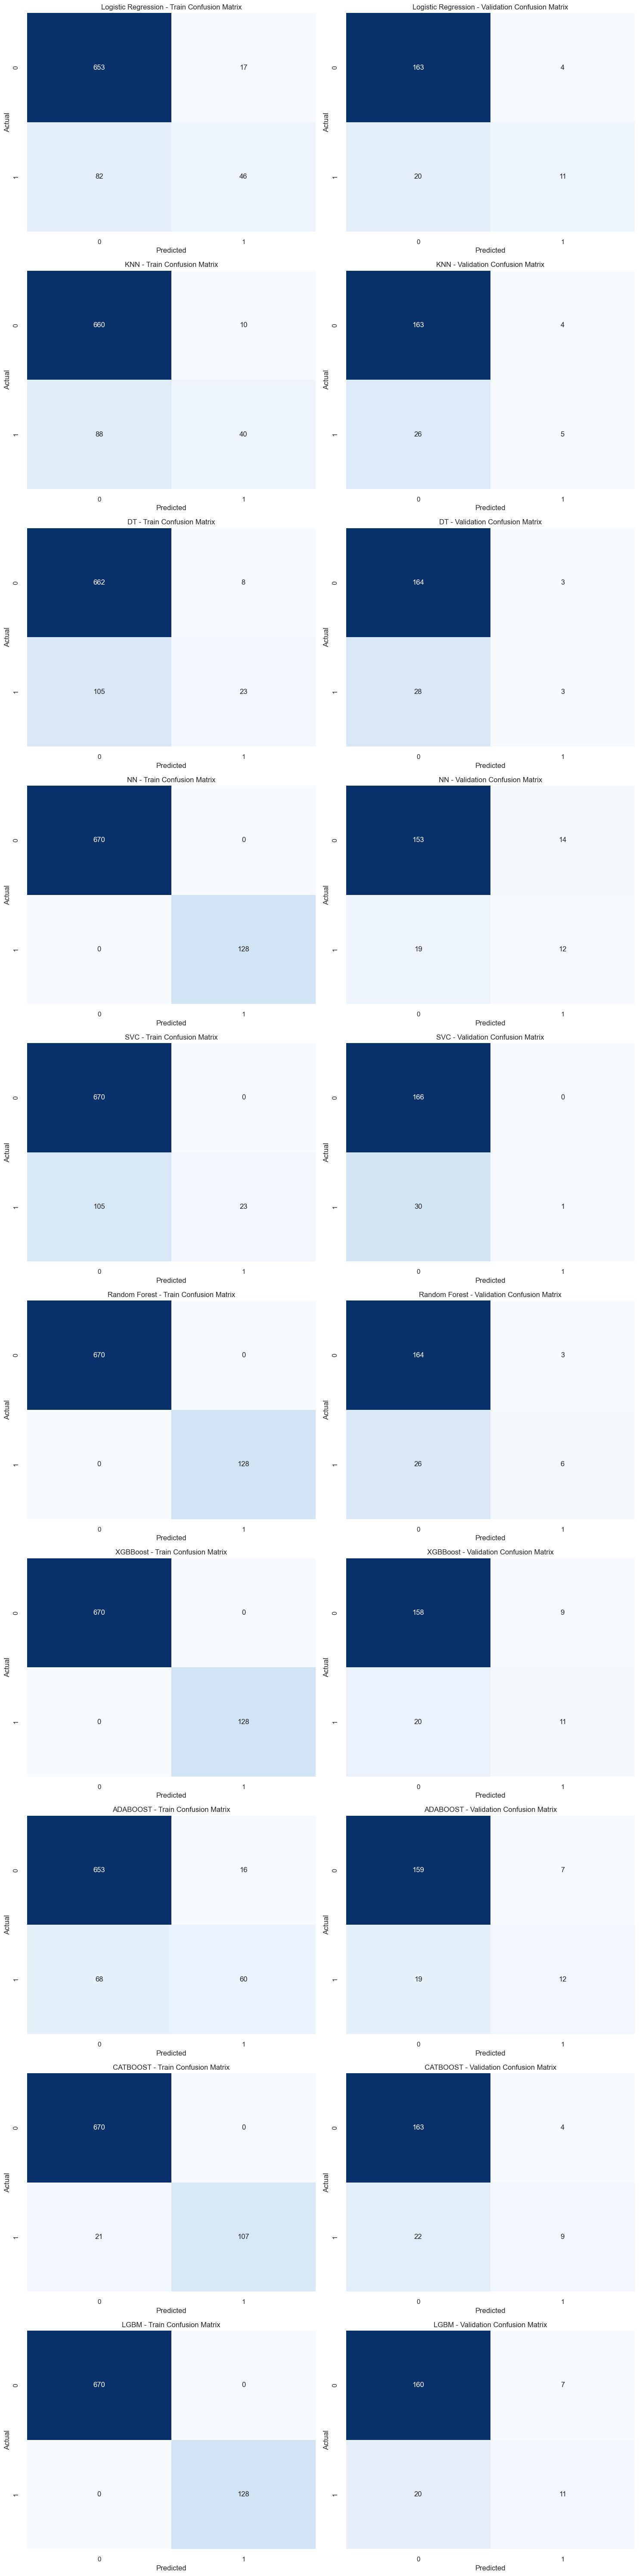

Train Accuracy Validation Accuracy Train Precision  \
Logistic Regression           0.88                0.87            0.73   
KNN                           0.88                0.85            0.80   
DT                            0.86                0.84            0.80   
NN                            1.00                0.83            1.00   
SVC                           0.87                0.84            0.98   
Random Forest                 1.00                0.85            1.00   
XGBBoost                      1.00                0.85            1.00   
ADABOOST                      0.89                0.86            0.78   
CATBOOST                      0.97                0.87            1.00   
LGBM                          1.00                0.86            1.00   

                    Validation Precision Train Recall Validation Recall  \
Logistic Regression                 0.72         0.36              0.35   
KNN                                 0.59         0.31              0.18   
DT                                  0.44         0.18              0.11   
NN                                  0.47         1.00              0.38   
SVC                                 0.80         0.18              0.06   
Random Forest                       0.66         1.00              0.19   
XGBBoost                            0.57         1.00              0.37   
ADABOOST                            0.62         0.47              0.40   
CATBOOST                            0.69         0.83              0.29   
LGBM                                0.61         1.00              0.36   

                    Train F1 Score Validation F1 Score  
Logistic Regression           0.48                0.47  
KNN                           0.45                0.28  
DT                            0.28                0.17  
NN                            1.00                0.42  
SVC                           0.30                0.10  
Random Forest                 1.00                0.30  
XGBBoost                      1.00                0.44  
ADABOOST                      0.58                0.48  
CATBOOST                      0.91                0.41  
LGBM                          1.00                0.45

In [505]:
show_metrics_results(models, X_train, y_train)

<a class="anchor" id="46th-bullet">

### 4.3.1. Hyperparameter tuning

</a>

In [506]:
lr = LogisticRegression()

parameters_lr = {
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "penalty": ["none", "l1", "l2", "elasticnet"],
    "C": [100, 10, 1.0, 0.1, 0.01],
}

grid_search_lr = GridSearchCV(
    lr, parameters_lr, scoring="f1", return_train_score=True, cv=5
)

grid_search_lr.fit(X_train, y_train)
print("Best Hyperparameters: ", grid_search_lr.best_params_)
print("Best Score: ", grid_search_lr.best_score_)

Best Hyperparameters:  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score:  0.4267216372948356


<a class="anchor" id="47th-bullet">

### 4.3.2. Threshold Estimation

</a>

In [507]:
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(
    X_train, y_train, train_size=0.7, random_state=99, stratify=y_train
)

Best Threshold=0.278522, F-Score=0.586


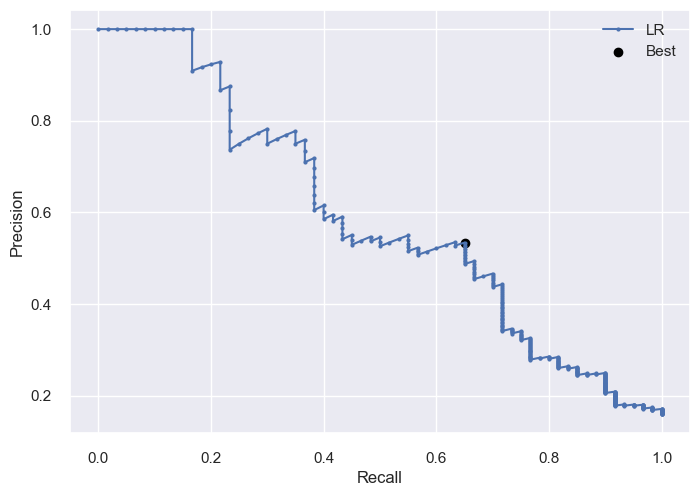

In [508]:
final_model = LogisticRegression(C=100, penalty="none", solver="newton-cg").fit(
    X_train, y_train
)
predict_proba = final_model.predict_proba(X_val_t)

precision, recall, thresholds = precision_recall_curve(y_val_t, predict_proba[:, 1])


# apply f1 score
fscore = (2 * precision * recall) / (precision + recall)


# locate the index of the largest f score


ix = np.argmax(fscore)

print("Best Threshold=%f, F-Score=%.3f" % (thresholds[ix], fscore[ix]))


plt.plot(recall, precision, marker=".", label="LR")
plt.scatter(recall[ix], precision[ix], marker="o", color="black", label="Best")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [509]:
models = {
    "Logistic Regression_base": LogisticRegression(C=100, penalty="l2", solver="lbfgs"),
    "Logistic Regression": LogisticRegression(
        C=100, penalty="none", solver="newton-cg"
    ),
}

<a class="anchor" id="48th-bullet">

### 4.3.3. Final Model

</a>

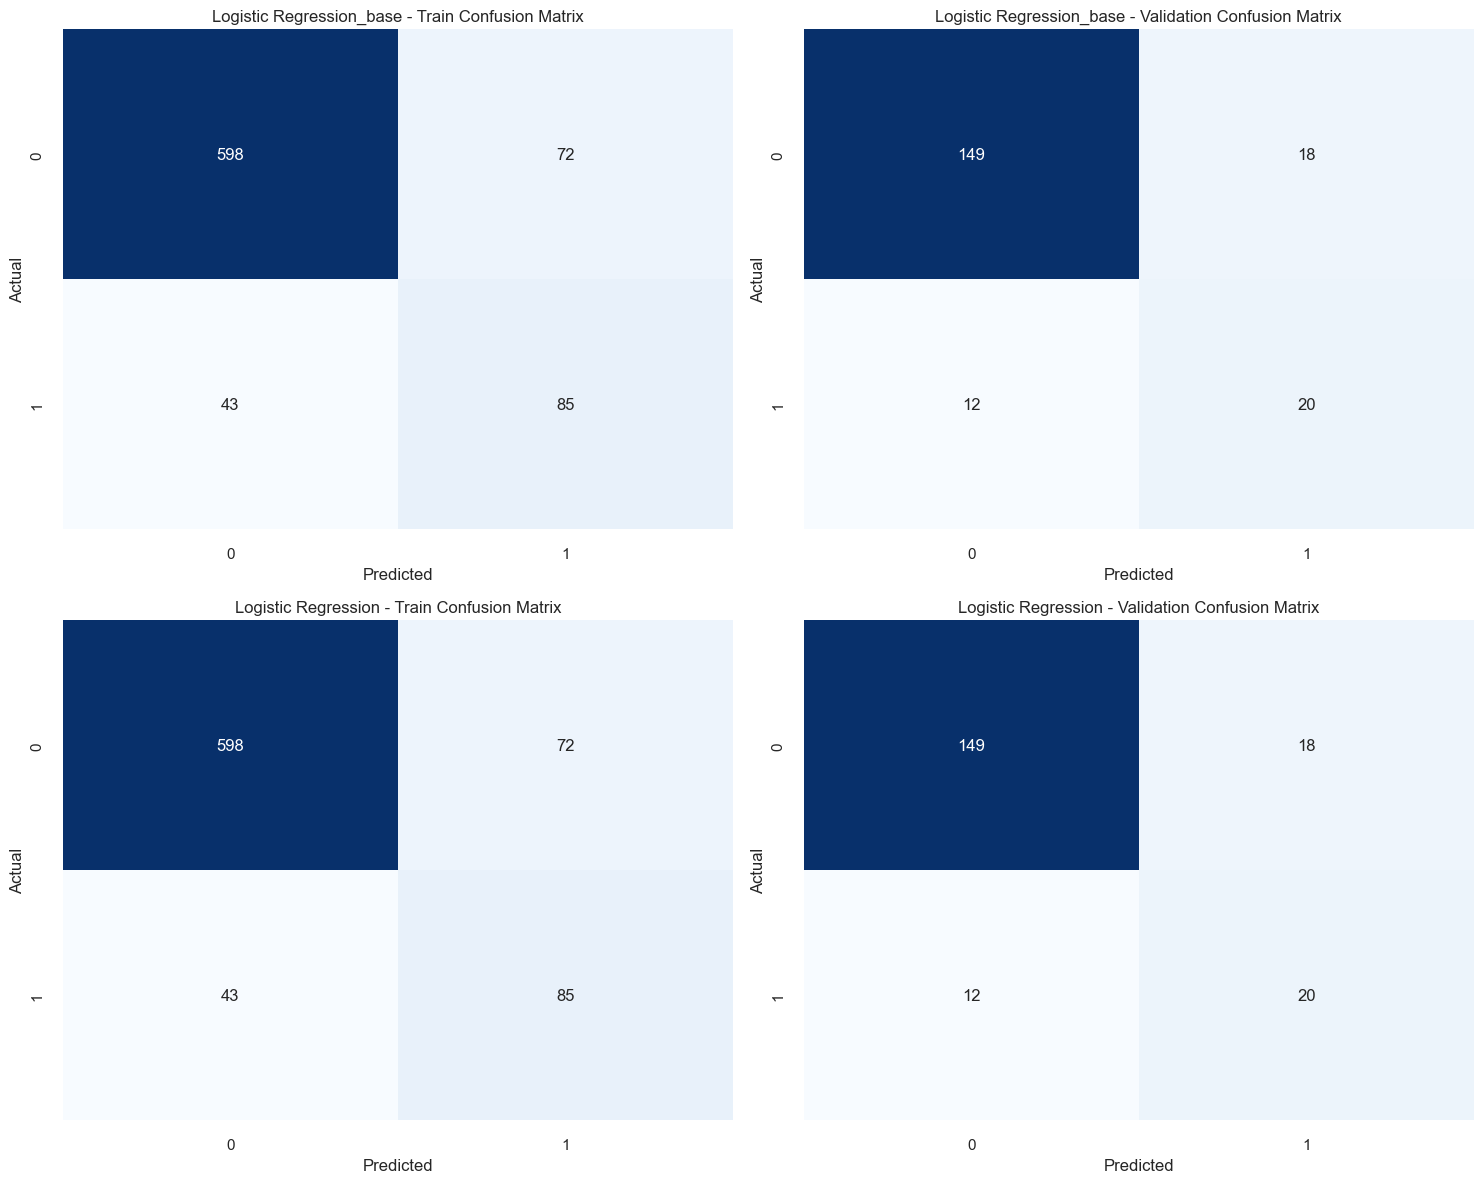

Train Accuracy Validation Accuracy Train Precision  \
Logistic Regression_base           0.86                0.85            0.54   
Logistic Regression                0.86                0.85            0.54   

                         Validation Precision Train Recall Validation Recall  \
Logistic Regression_base                 0.54         0.66              0.62   
Logistic Regression                      0.54         0.66              0.62   

                         Train F1 Score Validation F1 Score  
Logistic Regression_base           0.60                0.57  
Logistic Regression                0.60                0.57

In [510]:
show_metrics_results(models, X_train, y_train, thresholds[ix])

<a class="anchor" id="49th-bullet">

### 4.3.4. Odds Ratio

</a>

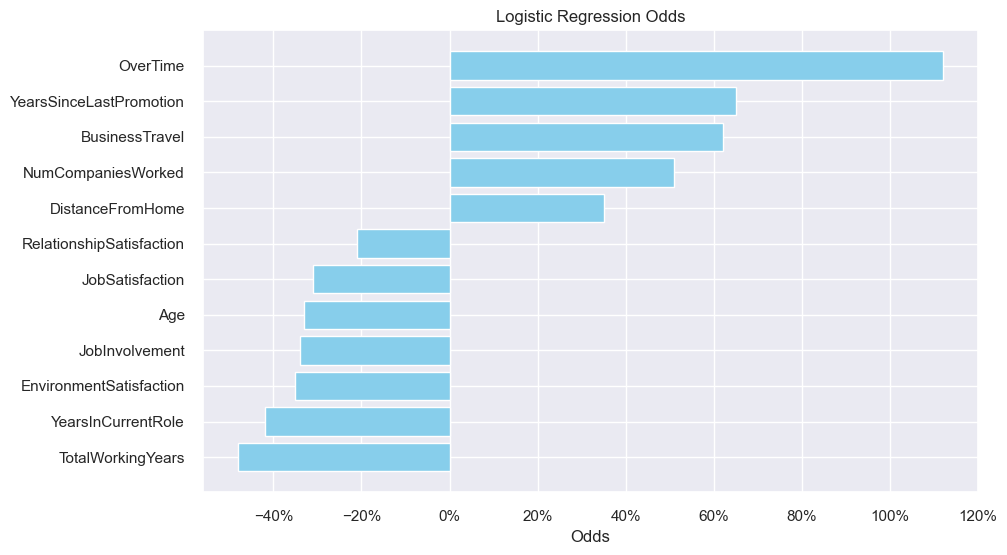

Variable  Coefficient  Odds Ratio   Odds
3          TotalWorkingYears        -0.66        0.52 -48.00
4         YearsInCurrentRole        -0.55        0.58 -42.00
9    EnvironmentSatisfaction        -0.43        0.65 -35.00
7             JobInvolvement        -0.42        0.66 -34.00
0                        Age        -0.40        0.67 -33.00
10           JobSatisfaction        -0.37        0.69 -31.00
11  RelationshipSatisfaction        -0.24        0.79 -21.00
1           DistanceFromHome         0.30        1.35  35.00
2         NumCompaniesWorked         0.41        1.51  51.00
8             BusinessTravel         0.48        1.62  62.00
5    YearsSinceLastPromotion         0.50        1.65  65.00
6                   OverTime         0.75        2.12 112.00

In [511]:
model = final_model

coef_df = pd.DataFrame(
    {
        "Variable": list(X_train.columns),
        "Coefficient": list(model.coef_[0]),
    }
)

coef_df["Odds Ratio"] = np.exp(coef_df["Coefficient"])
coef_df["Odds"] = round(((coef_df["Odds Ratio"]) - 1) * 100)
coef_df = coef_df[
    coef_df["Variable"] != "WorkLifeBalance"  # Non significant according to p-value
]
coef_df = coef_df.sort_values(by="Odds", ascending=True)


# Plot the odds ratios
plt.figure(figsize=(10, 6))
plt.barh(coef_df["Variable"], coef_df["Odds"], color="skyblue")
plt.xlabel("Odds")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter())
plt.title("Logistic Regression Odds")
plt.show()
coef_df

<a class="anchor" id="50th-bullet">

### 4.3.5. Marginal Effect

</a>

Optimization terminated successfully.
         Current function value: 0.331900
         Iterations 7
        Logit Marginal Effects       
Dep. Variable:              Attrition
Method:                          dydx
At:                           overall
                              dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Age                         -0.0405      0.013     -3.119      0.002      -0.066      -0.015
DistanceFromHome             0.0303      0.009      3.502      0.000       0.013       0.047
NumCompaniesWorked           0.0421      0.009      4.510      0.000       0.024       0.060
TotalWorkingYears           -0.0671      0.017     -3.839      0.000      -0.101      -0.033
YearsInCurrentRole          -0.0558      0.014     -4.056      0.000      -0.083      -0.029
YearsSinceLastPromotion      0.0512      0.012      4.140      0.000       0.027       0.075
Ov

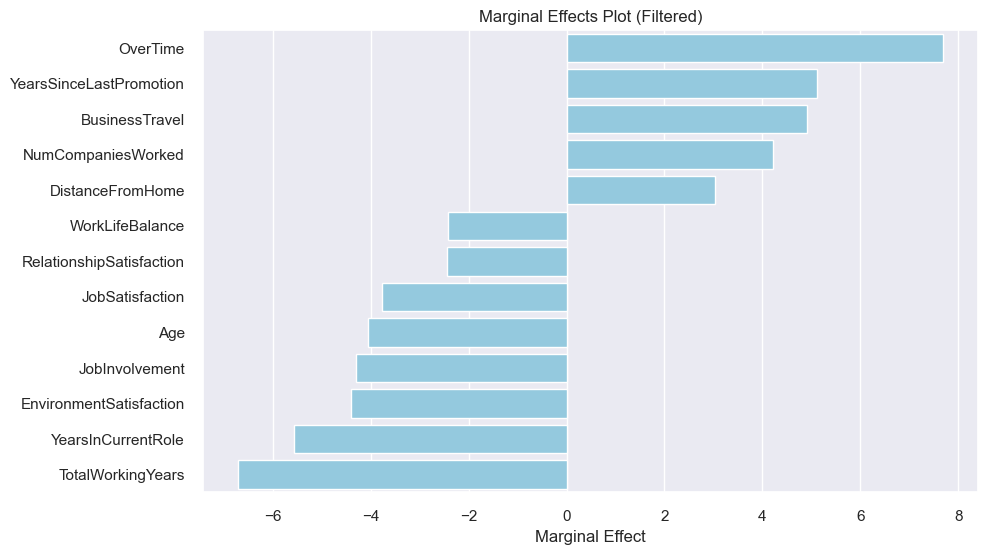

In [512]:
import statsmodels.api as sm

X = sm.add_constant(X_train)

# Fit logistic regression model
model_sm = sm.Logit(y_train, X)
result = model_sm.fit()

# Get marginal effects
marginal_effects = result.get_margeff()

# Print marginal effects
print(marginal_effects.summary())
marginal_effects_data = marginal_effects.summary_frame()

# Sort columns by "dy/dx"
marginal_effects_data_sorted = marginal_effects_data.sort_values(
    by="dy/dx", ascending=False
)

# Filter out rows where p-value is above 0.05
filtered_data = marginal_effects_data_sorted[
    (marginal_effects_data_sorted["Pr(>|z|)"] < 0.05)
]

# Extract the names of the independent variables from the filtered data
independent_variable_names_filtered = list(filtered_data.index)

# Plotting for the filtered data
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the marginal effects for the filtered data
sns.barplot(
    x=filtered_data["dy/dx"] * 100,
    y=independent_variable_names_filtered,
    ax=ax,
    color="skyblue",
)

# Add labels and title
ax.set_xlabel("Marginal Effect")
ax.set_title("Marginal Effects Plot (Filtered)")

# Show the plot for the filtered data
plt.show()

<a class="anchor" id="51th-bullet">

### 4.3.6. Roc Curve

</a>

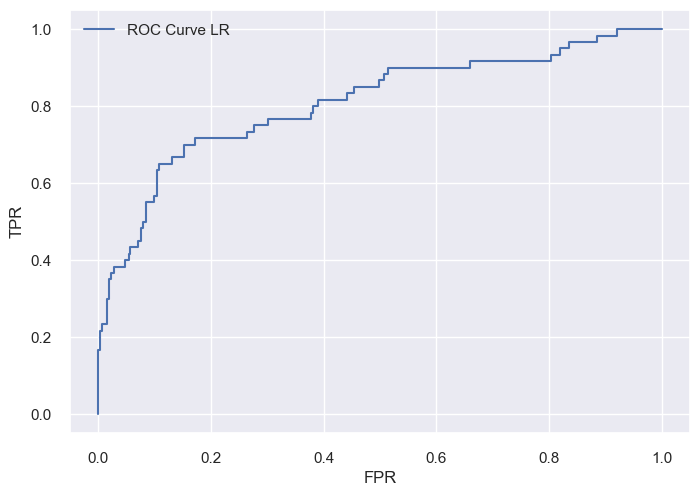

In [513]:
prob_modelLR = model.predict_proba(X_val_t)
fpr_modelLR, tpr_modelKLR, thresholds_modelKLR = roc_curve(
    y_true=y_val_t, y_score=prob_modelLR[:, 1]
)

plt.plot(fpr_modelLR, tpr_modelKLR, label="ROC Curve LR")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

<a class="anchor" id="52th-bullet">

# 5.0. Clustering

</a>

<a class="anchor" id="53th-bullet">

## 5.1.0. Kmeans

</a>

In [514]:
def kmeans(df, k):
    # Silhouette Viz
    X = df
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))

    for i in range(2, 6):
        km = KMeans(n_clusters=i, init="k-means++", random_state=100)
        q, mod = divmod(i, 2)
        visualizer = SilhouetteVisualizer(km, colors="yellowbrick", ax=ax[q - 1][mod])
        visualizer.fit(X)
        print(i, visualizer.silhouette_score_)

    # Elbow Method Plot
    plt.figure()
    ks = range(1, 11)
    inertias = []

    for i in ks:
        model = KMeans(n_clusters=i).fit(X)
        inertias.append(model.inertia_)

    plt.plot(ks, inertias)
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Method for Optimal k")
    plt.show()

    # Kmeans
    df_kmeans = df.copy()
    model = KMeans(n_clusters=k, init="k-means++", random_state=100).fit(df_kmeans)
    df_kmeans["kmeans_labels"] = model.labels_
    df_kmeans_NOT_scaled = df_1.copy().join(df_kmeans["kmeans_labels"])
    df_kmeans_scaled = round(
        df_kmeans.groupby(["kmeans_labels"]).mean().transpose(), 1
    ).reset_index()
    print(df_kmeans_scaled)
    return df_kmeans_scaled, df_kmeans_NOT_scaled

In [515]:
clustering_df = df_1[
    [
        "TotalWorkingYears",
        "YearsInCurrentRole",
        "JobInvolvement",
        "EnvironmentSatisfaction",
        "JobSatisfaction",
        "Age",
        "RelationshipSatisfaction",
        "DistanceFromHome",
        "YearsSinceLastPromotion",
        "NumCompaniesWorked",
        "BusinessTravel",
        "OverTime",
        "Attrition",
    ]
]

clustering_df["BusinessTravel"] = clustering_df["BusinessTravel"].map(
    {"Non-Travel": 1, "Travel_Rarely": 2, "Travel_Frequently": 3}
)
clustering_df["OverTime"] = clustering_df["OverTime"].map({"No": 0, "Yes": 1})

clustering_df_scaled = normalize(clustering_df)
clustering_df_scaled = scaling("StandardScaler", clustering_df)

2 0.13019265372096603
3 0.13492762051494092
4 0.10238461074229292
5 0.10558219902450972


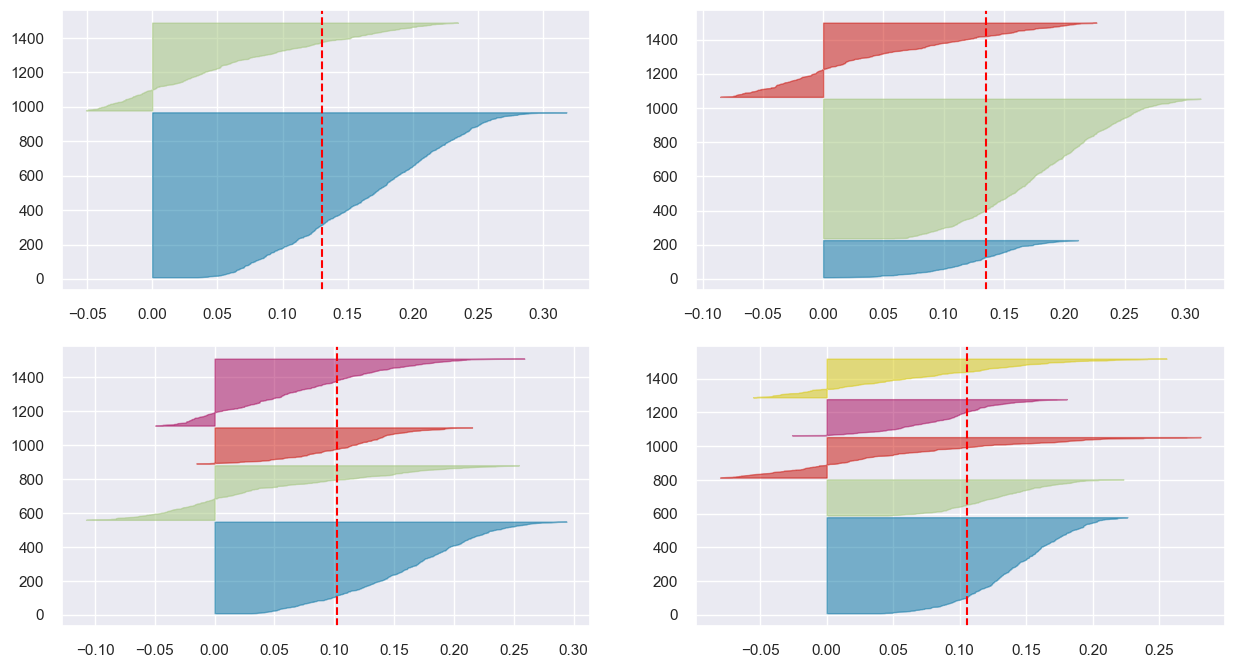

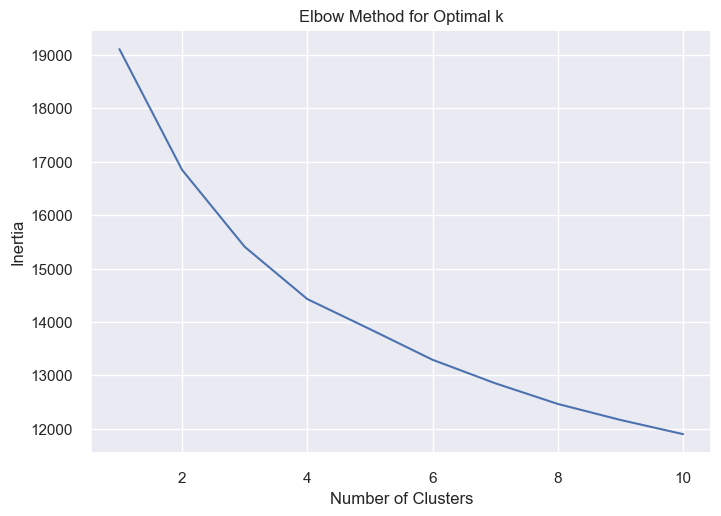

kmeans_labels                     index     0     1     2
0                     TotalWorkingYears -0.60 -0.40  1.10
1                    YearsInCurrentRole -0.50 -0.40  0.90
2                        JobInvolvement -0.30  0.10 -0.00
3               EnvironmentSatisfaction -0.30  0.10  0.00
4                       JobSatisfaction -0.30  0.10  0.00
5                                   Age -0.50 -0.30  0.80
6              RelationshipSatisfaction -0.10  0.00  0.00
7                      DistanceFromHome  0.20 -0.00 -0.00
8               YearsSinceLastPromotion -0.30 -0.40  0.90
9                    NumCompaniesWorked  0.10 -0.10  0.10
10                       BusinessTravel  0.30 -0.10 -0.00
11                             OverTime  0.60 -0.10 -0.00
12                            Attrition  2.30 -0.40 -0.30


In [516]:
kmeans_df_sclaed, kmeans_df = kmeans(clustering_df_scaled, 3)

<a class="anchor" id="54th-bullet">

### 5.1.1. Visualisations : Radar Charts

</a>

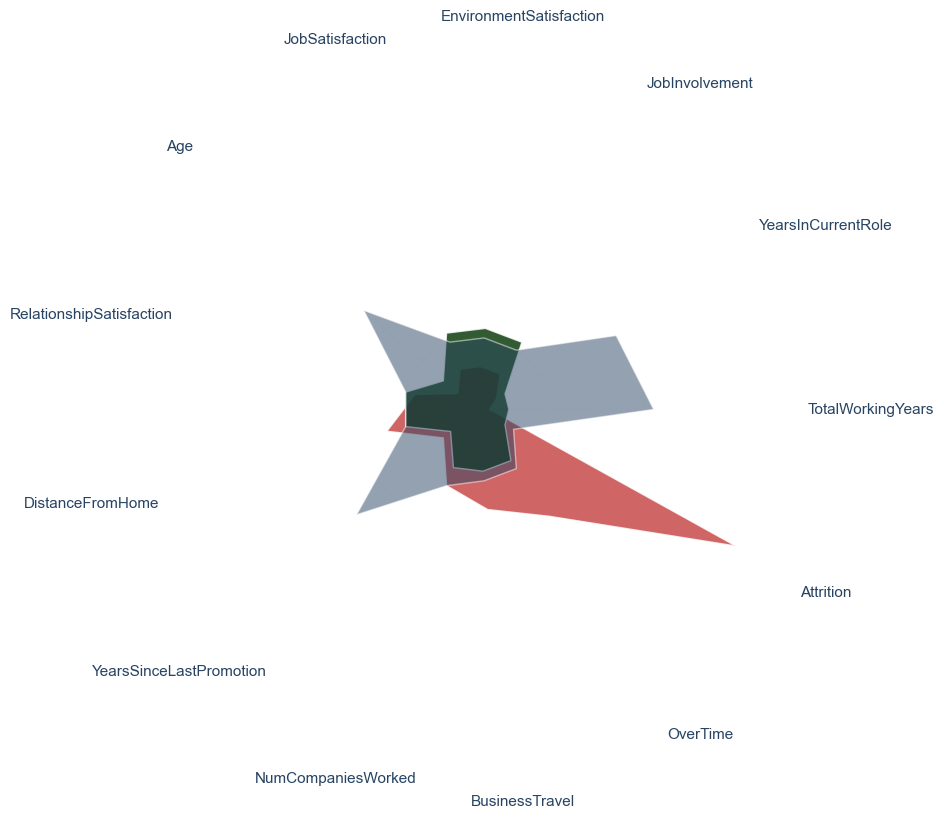

In [517]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
variables = kmeans_df_sclaed["index"].tolist()
cluster_0 = kmeans_df_sclaed[0].tolist()
cluster_1 = kmeans_df_sclaed[1].tolist()
cluster_2 = kmeans_df_sclaed[2].tolist()


all_clusters = np.array([cluster_0, cluster_1, cluster_2])
max_value = np.max(all_clusters)

# Number of variables
num_vars = len(variables)

# Calculate angle for each variable
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Set the color of the radial grid lines
ax.yaxis.grid(color="#284463")

ax.set_ylim(0, max_value)
# Set up the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, cluster_0 + cluster_0[:1], "#C53F3F", alpha=0.8)
ax.fill(angles, cluster_1 + cluster_1[:1], "#003300", alpha=0.8)
ax.fill(angles, cluster_2 + cluster_2[:1], "#284463", alpha=0.5)

# Set labels for each variable
ax.set_thetagrids(np.degrees(angles[:-1]), variables, color="#284463")

# Remove labels from the center
ax.set_yticklabels([])


# Adjust the distance of variable names from the circumference
ax.tick_params(axis="x", pad=50)  # You can adjust the value as needed

# Add legend and title
# #ax.legend(
#     ["Cluster 0", "Cluster 1", "Cluster 2"],
#     loc="upper right",
#     bbox_to_anchor=(0.1, -0.1),
# )

ax.set_facecolor("none")
fig.patch.set_facecolor("none")
# Show the plot

plt.savefig(
    "./Graphics/Radar_all_white.svg",
    bbox_inches="tight",
)
plt.show()

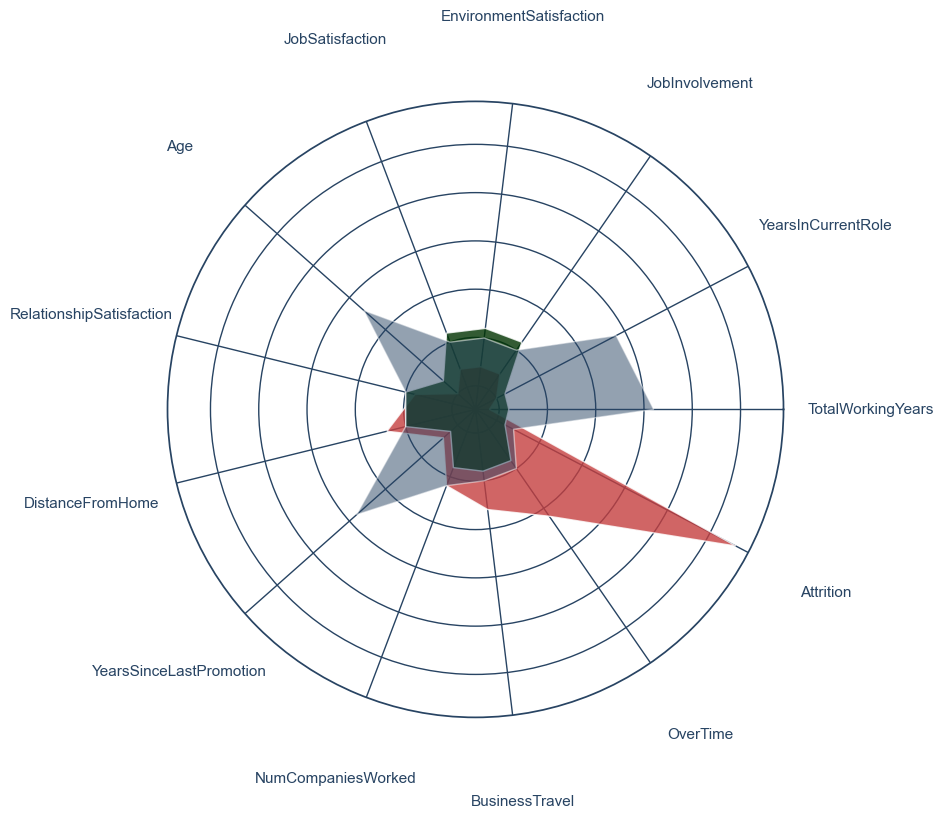

In [518]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
variables = kmeans_df_sclaed["index"].tolist()
cluster_0 = kmeans_df_sclaed[0].tolist()
cluster_1 = kmeans_df_sclaed[1].tolist()
cluster_2 = kmeans_df_sclaed[2].tolist()

all_clusters = np.array([cluster_0, cluster_1, cluster_2])
max_value = np.max(all_clusters)

# Number of variables
num_vars = len(variables)

# Calculate angle for each variable
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the color of the radial grid lines
radial_color = "#284463"
ax.yaxis.grid(
    color=radial_color, linestyle="-"
)  # Color of the radial grid lines inside filled areas

# Set color and linestyle for outer grid lines
ax.xaxis.grid(color=radial_color, linestyle="-")

# Set color of ticks
ax.tick_params(axis="y", colors=radial_color)

# Set the color of the outer edge of the polar plot
ax.spines["polar"].set_edgecolor(radial_color)

ax.fill(angles, cluster_0 + cluster_0[:1], "#C53F3F", alpha=0.8)
ax.fill(angles, cluster_1 + cluster_1[:1], "#003300", alpha=0.8)
ax.fill(angles, cluster_2 + cluster_2[:1], "#284463", alpha=0.5)

# Set labels for each variable
ax.set_thetagrids(np.degrees(angles[:-1]), variables, color=radial_color)

# Remove labels from the center
ax.set_yticklabels([])

# Adjust the distance of variable names from the circumference
ax.tick_params(axis="x", pad=50)  # You can adjust the value as needed

# Add legend and title
ax.set_facecolor("none")
fig.patch.set_facecolor("none")

# Show the plot
plt.savefig("./Graphics/Radar_all_blue.svg", bbox_inches="tight")
plt.show()

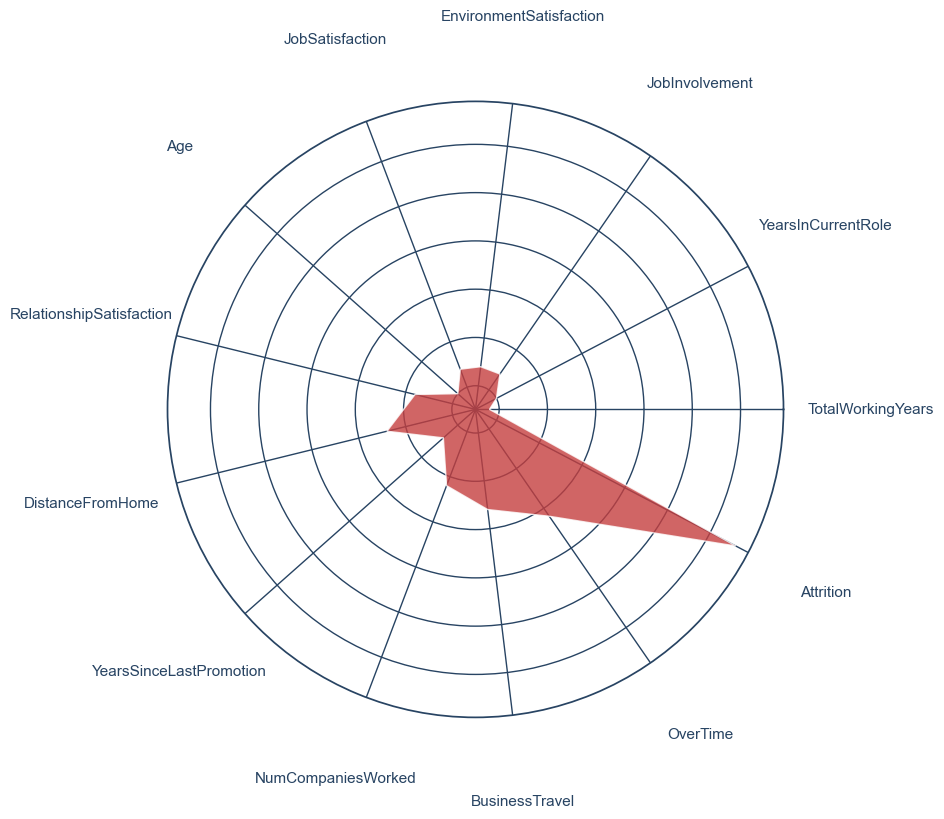

In [519]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
variables = kmeans_df_sclaed["index"].tolist()
cluster_0 = kmeans_df_sclaed[0].tolist()
cluster_1 = kmeans_df_sclaed[1].tolist()
cluster_2 = kmeans_df_sclaed[2].tolist()

all_clusters = np.array([cluster_0, cluster_1, cluster_2])
max_value = np.max(all_clusters)

# Number of variables
num_vars = len(variables)

# Calculate angle for each variable
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the color of the radial grid lines
radial_color = "#284463"
ax.yaxis.grid(
    color=radial_color, linestyle="-"
)  # Color of the radial grid lines inside filled areas

# Set color and linestyle for outer grid lines
ax.xaxis.grid(color=radial_color, linestyle="-")

# Set color of ticks
ax.tick_params(axis="y", colors=radial_color)

# Set the color of the outer edge of the polar plot
ax.spines["polar"].set_edgecolor(radial_color)

ax.fill(angles, cluster_0 + cluster_0[:1], "#C53F3F", alpha=0.8)
ax.fill(angles, cluster_1 + cluster_1[:1], "#003300", alpha=0)
ax.fill(angles, cluster_2 + cluster_2[:1], "#284463", alpha=0)

# Set labels for each variable
ax.set_thetagrids(np.degrees(angles[:-1]), variables, color=radial_color)

# Remove labels from the center
ax.set_yticklabels([])

# Adjust the distance of variable names from the circumference
ax.tick_params(axis="x", pad=50)  # You can adjust the value as needed

# Add legend and title
ax.set_facecolor("none")
fig.patch.set_facecolor("none")

# Show the plot
plt.savefig("./Graphics/Radar_CLuster0_blue.svg", bbox_inches="tight")
plt.show()

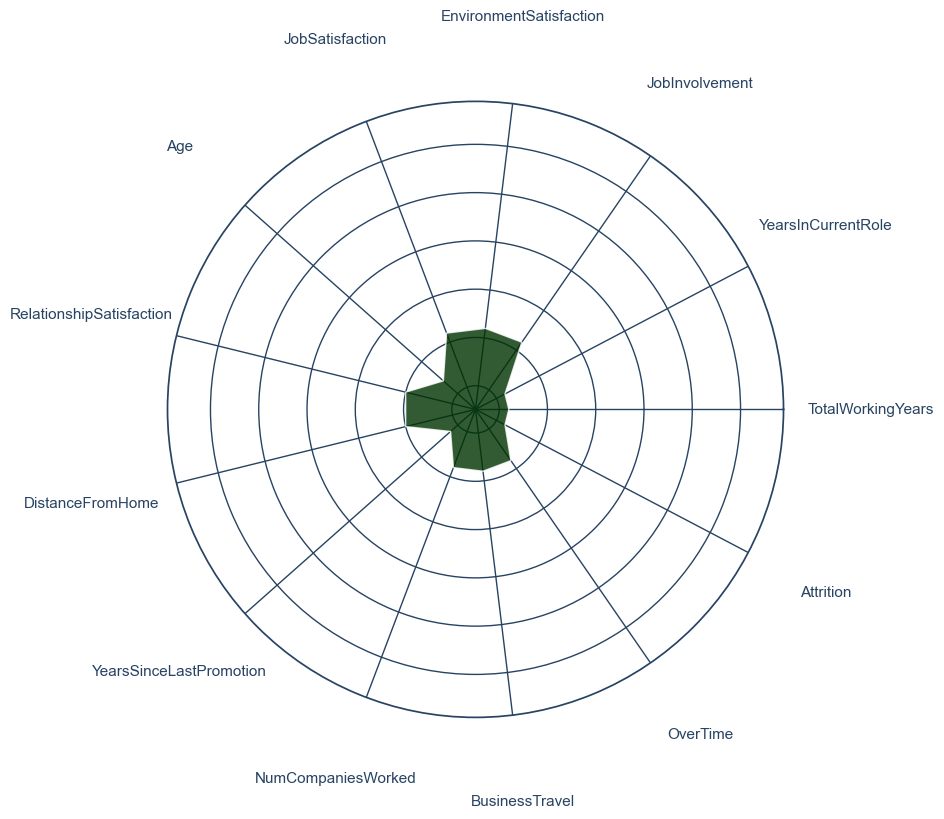

In [520]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
variables = kmeans_df_sclaed["index"].tolist()
cluster_0 = kmeans_df_sclaed[0].tolist()
cluster_1 = kmeans_df_sclaed[1].tolist()
cluster_2 = kmeans_df_sclaed[2].tolist()

all_clusters = np.array([cluster_0, cluster_1, cluster_2])
max_value = np.max(all_clusters)

# Number of variables
num_vars = len(variables)

# Calculate angle for each variable
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the color of the radial grid lines
radial_color = "#284463"
ax.yaxis.grid(
    color=radial_color, linestyle="-"
)  # Color of the radial grid lines inside filled areas

# Set color and linestyle for outer grid lines
ax.xaxis.grid(color=radial_color, linestyle="-")

# Set color of ticks
ax.tick_params(axis="y", colors=radial_color)

# Set the color of the outer edge of the polar plot
ax.spines["polar"].set_edgecolor(radial_color)

ax.fill(angles, cluster_0 + cluster_0[:1], "#C53F3F", alpha=0)
ax.fill(angles, cluster_1 + cluster_1[:1], "#003300", alpha=0.8)
ax.fill(angles, cluster_2 + cluster_2[:1], "#284463", alpha=0)

# Set labels for each variable
ax.set_thetagrids(np.degrees(angles[:-1]), variables, color=radial_color)

# Remove labels from the center
ax.set_yticklabels([])

# Adjust the distance of variable names from the circumference
ax.tick_params(axis="x", pad=50)  # You can adjust the value as needed

# Add legend and title
ax.set_facecolor("none")
fig.patch.set_facecolor("none")

# Show the plot
plt.savefig("./Graphics/Radar_CLuster1_blue.svg", bbox_inches="tight")
plt.show()

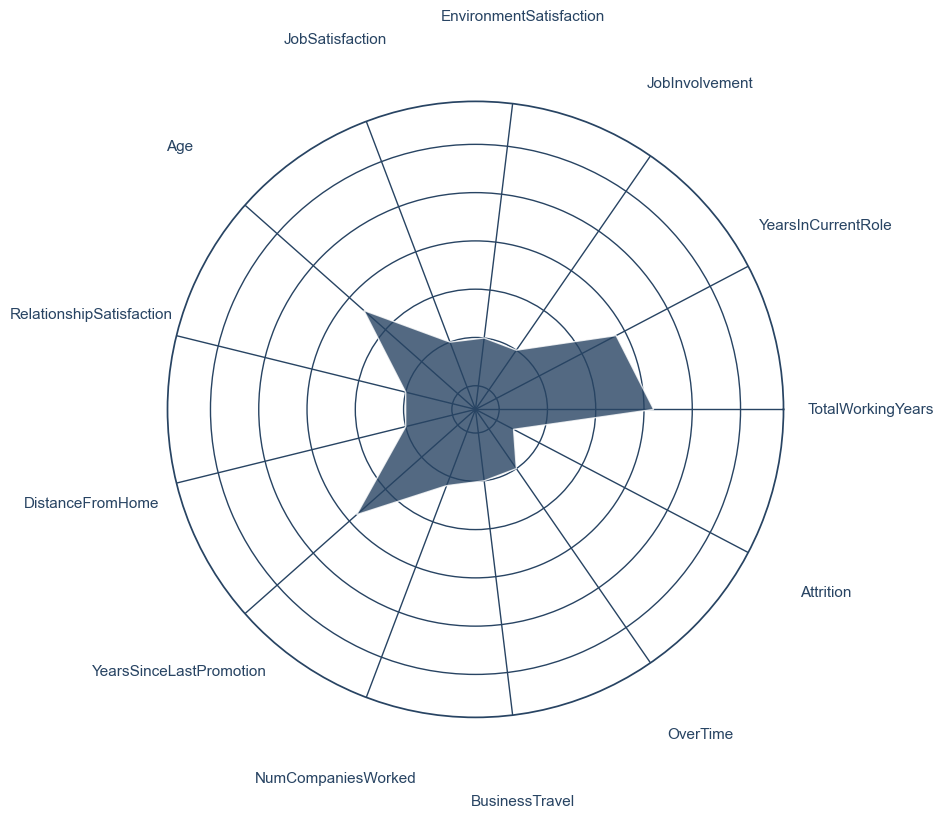

In [521]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
variables = kmeans_df_sclaed["index"].tolist()
cluster_0 = kmeans_df_sclaed[0].tolist()
cluster_1 = kmeans_df_sclaed[1].tolist()
cluster_2 = kmeans_df_sclaed[2].tolist()

all_clusters = np.array([cluster_0, cluster_1, cluster_2])
max_value = np.max(all_clusters)

# Number of variables
num_vars = len(variables)

# Calculate angle for each variable
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the plot circular
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Set the color of the radial grid lines
radial_color = "#284463"
ax.yaxis.grid(
    color=radial_color, linestyle="-"
)  # Color of the radial grid lines inside filled areas

# Set color and linestyle for outer grid lines
ax.xaxis.grid(color=radial_color, linestyle="-")

# Set color of ticks
ax.tick_params(axis="y", colors=radial_color)

# Set the color of the outer edge of the polar plot
ax.spines["polar"].set_edgecolor(radial_color)

ax.fill(angles, cluster_0 + cluster_0[:1], "#C53F3F", alpha=0)
ax.fill(angles, cluster_1 + cluster_1[:1], "#003300", alpha=0)
ax.fill(angles, cluster_2 + cluster_2[:1], "#284463", alpha=0.8)

# Set labels for each variable
ax.set_thetagrids(np.degrees(angles[:-1]), variables, color=radial_color)

# Remove labels from the center
ax.set_yticklabels([])

# Adjust the distance of variable names from the circumference
ax.tick_params(axis="x", pad=50)  # You can adjust the value as needed

# Add legend and title
ax.set_facecolor("none")
fig.patch.set_facecolor("none")

# Show the plot
plt.savefig("./Graphics/Radar_CLuster2_blue.svg", bbox_inches="tight")
plt.show()

In [522]:
kmeans_df.groupby("kmeans_labels").describe()

Age                                          DailyRate  \
               count  mean  std   min   25%   50%   75%   max     count   
kmeans_labels                                                             
0             218.00 32.39 8.82 18.00 26.00 31.00 36.75 58.00    218.00   
1             817.00 34.33 7.46 18.00 29.00 34.00 39.00 59.00    817.00   
2             435.00 44.07 8.04 28.00 38.00 44.00 50.00 60.00    435.00   

                                                                  \
                mean    std    min    25%    50%     75%     max   
kmeans_labels                                                      
0             759.02 401.80 103.00 411.00 711.00 1095.75 1496.00   
1             814.29 398.78 105.00 486.00 824.00 1167.00 1498.00   
2             802.10 412.53 102.00 464.50 792.00 1179.50 1499.00   

              DistanceFromHome                                        \
                         count  mean  std  min  25%  50%   75%   max   
kmeans_labels                                                          
0                       218.00 10.87 8.61 1.00 3.00 9.00 17.75 29.00   
1                       817.00  8.83 7.79 1.00 2.00 7.00 12.00 29.00   
2                       435.00  9.03 8.33 1.00 2.00 7.00 14.00 29.00   

              Education                                     \
                  count mean  std  min  25%  50%  75%  max   
kmeans_labels                                                
0                218.00 2.82 1.00 1.00 2.00 3.00 4.00 5.00   
1                817.00 2.85 1.04 1.00 2.00 3.00 4.00 5.00   
2                435.00 3.09 0.98 1.00 3.00 3.00 4.00 5.00   

              EnvironmentSatisfaction                                     ...  \
                                count mean  std  min  25%  50%  75%  max  ...   
kmeans_labels                                                             ...   
0                              218.00 2.44 1.17 1.00 1.00 2.50 3.00 4.00  ...   
1                              817.00 2.78 1.06 1.00 2.00 3.00 4.00 4.00  ...   
2                              435.00 2.76 1.09 1.00 2.00 3.00 4.00 4.00  ...   

              YearsAtCompany                                         \
                       count  mean  std  min  25%   50%   75%   max   
kmeans_labels                                                         
0                     218.00  3.94 3.62 0.00 1.00  3.00  6.00 24.00   
1                     817.00  4.75 3.12 0.00 2.00  5.00  7.00 26.00   
2                     435.00 12.78 7.38 1.00 8.00 11.00 18.00 40.00   

              YearsInCurrentRole                                      \
                           count mean  std  min  25%  50%  75%   max   
kmeans_labels                                                          
0                         218.00 2.35 2.53 0.00 0.00 2.00 3.00 10.00   
1                         817.00 2.92 2.43 0.00 2.00 2.00 4.00 10.00   
2                         435.00 7.63 3.68 0.00 6.00 7.00 9.00 18.00   

              YearsSinceLastPromotion                                      \
                                count mean  std  min  25%  50%  75%   max   
kmeans_labels                                                               
0                              218.00 1.37 2.21 0.00 0.00 0.00 2.00 11.00   
1                              817.00 0.87 1.30 0.00 0.00 0.00 1.00  7.00   
2                              435.00 5.07 4.20 0.00 1.00 4.00 7.00 15.00   

              YearsWithCurrManager                                      \
                             count mean  std  min  25%  50%  75%   max   
kmeans_labels                                                            
0                           218.00 2.45 2.79 0.00 0.00 2.00 4.00 11.00   
1                           817.00 3.06 2.62 0.00 2.00 2.00 4.00 13.00   
2                           435.00 6.97 3.83 0.00 4.00 7.00 9.00 17.00   

              Attrition                                     
                  count mean  std  

In [523]:
kmeans_df.groupby("kmeans_labels").describe(include="O")

BusinessTravel                            Department         \
                       count unique            top freq      count unique   
kmeans_labels                                                               
0                        218      3  Travel_Rarely  141        218      3   
1                        817      3  Travel_Rarely  592        817      3   
2                        435      3  Travel_Rarely  310        435      3   

                                           EducationField         \
                                  top freq          count unique   
kmeans_labels                                                      
0              Research & Development  125            218      6   
1              Research & Development  552            817      6   
2              Research & Development  284            435      6   

                                  Gender                   JobRole         \
                         top freq  count unique   top freq   count unique   
kmeans_labels                                                               
0              Life Sciences   84    218      2  Male  139     218      8   
1              Life Sciences  342    817      2  Male  492     817      9   
2              Life Sciences  180    435      2  Male  251     435      9   

                                          MaritalStatus                       \
                                 top freq         count unique      top freq   
kmeans_labels                                                                  
0              Laboratory Technician   60           218      3   Single  115   
1                 Research Scientist  206           817      3  Married  373   
2                    Sales Executive   94           435      3  Married  228   

              OverTime                   
                 count unique  top freq  
kmeans_labels                            
0                  218      2  Yes  122  
1                  817      2   No  639  
2                  435      2   No  319

In [524]:
def value_counts_by_cluster(var):
    return kmeans_df.groupby("kmeans_labels")[var].value_counts(normalize=True)

In [525]:
value_counts_by_cluster("OverTime")

kmeans_labels  OverTime
0              Yes        0.56
               No         0.44
1              No         0.78
               Yes        0.22
2              No         0.73
               Yes        0.27
Name: proportion, dtype: float64

In [526]:
value_counts_by_cluster("JobLevel")

kmeans_labels  JobLevel
0              1          0.64
               2          0.23
               3          0.11
               5          0.01
               4          0.00
1              1          0.45
               2          0.43
               3          0.10
               4          0.01
               5          0.01
2              2          0.30
               3          0.26
               4          0.23
               5          0.14
               1          0.08
Name: proportion, dtype: float64

In [527]:
value_counts_by_cluster("BusinessTravel")

kmeans_labels  BusinessTravel   
0              Travel_Rarely       0.65
               Travel_Frequently   0.30
               Non-Travel          0.06
1              Travel_Rarely       0.72
               Travel_Frequently   0.16
               Non-Travel          0.11
2              Travel_Rarely       0.71
               Travel_Frequently   0.18
               Non-Travel          0.10
Name: proportion, dtype: float64

<a class="anchor" id="55th-bullet">

# 6.0. Statistical Tests
</a>

In [528]:
def chi_square_test(X, y, alpha=0.05):
    important_variables = []

    for var in X.columns:
        dfObserved = pd.crosstab(X[var], y)

        chi2, p, dof, expected = chi2_contingency(dfObserved.values)

        if (expected < 5).any().any():
            # Skip variables with low expected cell counts
            continue
        elif p < alpha:
            result = f"\n{var} is IMPORTANT for predicting {y.name} (chi2: {chi2:.2f}, p-value: {p:.4f})."
            result += f"\nObserved Frequencies:\n{dfObserved}"
            result += f"\nExpected Frequencies:\n{pd.DataFrame(expected, index=dfObserved.index, columns=dfObserved.columns)}\n"

            important_variables.append(result)

    for result in important_variables:
        print(result)

    return None

In [529]:
def t_test(df, y, numerical_vars, alpha=0.05):
    important_variables = []

    for var in numerical_vars:
        t_statistic, p_value = stats.ttest_ind(
            df[df[y] == "Yes"][var],
            df[df[y] == "No"][var],
            equal_var=False,  # Set to True if you assume equal variances
        )

        if p_value < alpha:
            result = f"{var} is IMPORTANT for predicting {y} (t_statistic: {t_statistic:.2f}, p-value: {p_value:.4f})."
            important_variables.append(result)
        else:
            result = (
                f"{var} is NOT an important predictor for {y} (p-value: {p_value:.4f})."
            )

    for result in important_variables:
        print(result)

    return None

<a class="anchor" id="56th-bullet">

## 6.1.0. Chi-Square Overtime

</a>

In [530]:
Overtime = df_1["OverTime"]
categorical_vars = df_categorical.drop("OverTime", axis=1)

chi_square_test(categorical_vars, Overtime)


Attrition is IMPORTANT for predicting OverTime (chi2: 87.56, p-value: 0.0000).
Observed Frequencies:
OverTime    No  Yes
Attrition          
No         944  289
Yes        110  127
Expected Frequencies:
OverTime      No    Yes
Attrition              
No        884.07 348.93
Yes       169.93  67.07


EnvironmentSatisfaction is IMPORTANT for predicting OverTime (chi2: 8.21, p-value: 0.0419).
Observed Frequencies:
OverTime                  No  Yes
EnvironmentSatisfaction          
1                        222   62
2                        206   81
3                        320  133
4                        306  140
Expected Frequencies:
OverTime                    No    Yes
EnvironmentSatisfaction              
1                       203.63  80.37
2                       205.78  81.22
3                       324.80 128.20
4                       319.79 126.21



In [531]:
df_1.groupby("OverTime").EnvironmentSatisfaction.value_counts(normalize=True)

OverTime  EnvironmentSatisfaction
No        3                         0.30
          4                         0.29
          1                         0.21
          2                         0.20
Yes       4                         0.34
          3                         0.32
          2                         0.19
          1                         0.15
Name: proportion, dtype: float64

<a class="anchor" id="57th-bullet">

## 6.2.0. T-test Overtime

</a>

In [532]:
Overtime = "OverTime"
numerical_vars = normalize(df_quantitative)

t_test(df_1, Overtime, numerical_vars)
df_1.groupby("OverTime").TrainingTimesLastYear.mean()

TrainingTimesLastYear is IMPORTANT for predicting OverTime (t_statistic: -3.21, p-value: 0.0014).


OverTime
No    2.86
Yes   2.64
Name: TrainingTimesLastYear, dtype: float64

<a class="anchor" id="58th-bullet">

## 6.2.0. Chi-Square binned DistanceFromHome

</a>

In [533]:
bin_edges = [0, 10, 20, 30]

# Perform binning
distance_binned = pd.cut(
    df_1["DistanceFromHome"], bins=bin_edges, include_lowest=True, right=False
).reset_index()

distance_binned = distance_binned.set_index("EmployeeNumber")

Attrition = df_1["Attrition"]

chi_square_test(distance_binned, Attrition)


DistanceFromHome is IMPORTANT for predicting Attrition (chi2: 8.45, p-value: 0.0146).
Observed Frequencies:
Attrition           0    1
DistanceFromHome          
[0, 10)           807  133
[10, 20)          246   55
[20, 30)          180   49
Expected Frequencies:
Attrition             0      1
DistanceFromHome              
[0, 10)          788.45 151.55
[10, 20)         252.47  48.53
[20, 30)         192.08  36.92



<a class="anchor" id="59th-bullet">

## 6.3.0. Anova & Tukey NUmCompaniesWorked

</a>

In [534]:
data = {
    "values": clustering_df_scaled.NumCompaniesWorked,
    "group": kmeans_df.kmeans_labels,
}
df_anova = pd.DataFrame(data)

# Perform ANOVA
formula = "values ~ C(group)"
model = ols(formula, data=df_anova).fit()
anova_result = sm.stats.anova_lm(model)

# Perform Tukey-Kramer post-hoc test
posthoc = pairwise_tukeyhsd(df_anova["values"], df_anova["group"], alpha=0.05)


print(anova_result)
print(posthoc)

              df  sum_sq  mean_sq    F  PR(>F)
C(group)    2.00    9.57     4.79 4.81    0.01
Residual 1467.00 1460.43     1.00  NaN     NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     0      1  -0.1335 0.1854 -0.3119  0.045  False
     0      2   0.0404 0.8772 -0.1539 0.2346  False
     1      2   0.1738 0.0095  0.0349 0.3128   True
---------------------------------------------------
